In [691]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

In [2]:
import seaborn as sns

In [3]:
import os

In [4]:
uk_visits = pd.read_csv("datasets/London/UK_international-visits.csv")
uk_visits.loc[uk_visits['year']=='2019P','year'] = '2019'
uk_visits['year'] = uk_visits['year'].map(int)
uk_visits['quarter'] = uk_visits['quarter'].map({"January-March":0,"April-June":1,"July-September":2,"October-December":3})
uk_visits = uk_visits[uk_visits['year']<2019]
uk_visits.head()

/Users/myzone/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


year  quarter   market    dur_stay mode  purpose              area  \
0  2002        0  Belgium  1-3 nights  Air  Holiday     TOTAL ENGLAND   
1  2002        0  Belgium  1-3 nights  Air  Holiday            LONDON   
2  2002        0  Belgium  1-3 nights  Air  Holiday   REST OF ENGLAND   
3  2002        0  Belgium  1-3 nights  Air  Holiday  SOUTHERN ENGLAND   
4  2002        0  Belgium  1-3 nights  Air  Holiday        SOUTH EAST   

     visits     spend    nights  sample  
0  4.431616  1.013484  9.530416       6  
1  3.572186  0.969138  6.954456       5  
2  0.859430  0.044346  2.575960       1  
3  0.859430  0.044346  2.575960       1  
4  0.859430  0.044346  2.575960       1

In [811]:
import plots

In [6]:
uk_visits['market'].value_counts().head()

France         29767
Germany        28329
USA            25358
Netherlands    23054
Australia      19268
Name: market, dtype: int64

In [7]:
len(uk_visits['year'].unique())

17

In [8]:
uk_visits_adjusted = pd.DataFrame()

uk_visits_adjusted = uk_visits_adjusted.append(uk_visits[(uk_visits['area']=='LONDON')].reset_index(drop=True))

uk_visits_adjusted = uk_visits_adjusted.append(uk_visits[(uk_visits['area']=='REST OF ENGLAND')].reset_index(drop=True))

uk_visits_adjusted = uk_visits_adjusted.append(uk_visits[(uk_visits['area']=='TOTAL ENGLAND')].reset_index(drop=True))

temp = uk_visits[uk_visits["area"].isin([' NORTHERN IRELAND','SCOTLAND','WALES',' CHANNEL ISLANDS', ' ISLE OF MAN',' OIL RIGS/TRAVELLING'])]\
                 .groupby(['year','quarter','market','dur_stay','mode','purpose']).sum().reset_index()

temp['area'] = 'REST OF UK'
temp = temp.reindex(columns = uk_visits_adjusted.columns)

uk_visits_adjusted = uk_visits_adjusted.append(temp)

uk_visits_adjusted = uk_visits_adjusted.append(uk_visits[(uk_visits['area']=='ALL STAYING VISITS')].reset_index(drop=True))

uk_visits_adjusted.head()

year  quarter   market    dur_stay mode        purpose    area    visits  \
0  2002        0  Belgium  1-3 nights  Air        Holiday  LONDON  3.572186   
1  2002        0  Belgium  1-3 nights  Air       Business  LONDON  9.284226   
2  2002        0  Belgium  1-3 nights  Air            VFR  LONDON  0.877182   
3  2002        0  Belgium  1-3 nights  Air  Miscellaneous  LONDON  0.163874   
4  2002        0  Belgium  1-3 nights  Sea       Business  LONDON  1.648670   

      spend     nights  sample  
0  0.969138   6.954456       5  
1  2.399577  12.604959      19  
2  0.089833   2.153128       3  
3  0.010160   0.163874       1  
4  0.016789   1.650300       1

In [2448]:
uk_visits4 = uk_visits_adjusted.groupby(['year','mode','purpose','area'])['visits','spend','nights'].agg('sum').reset_index()
uk_visits4 = uk_visits4.groupby(['year','mode','area'])['visits','spend','nights'].agg('sum').reset_index()
index = (uk_visits4['area'] == "LONDON")
uk_visits4 = uk_visits4[index].reset_index(drop=True)
uk_visits_t = uk_visits4.groupby(['year']).sum().reset_index()
uk_visits_t.head()

year        visits        spend         nights
0  2002  11603.382079  5787.853522   75402.111587
1  2003  11695.750442  5869.946135   78946.702332
2  2004  13389.330411  6439.274949   90237.321382
3  2005  13892.568979  6858.580913   91843.262167
4  2006  15592.646141  7821.599766  101067.639106

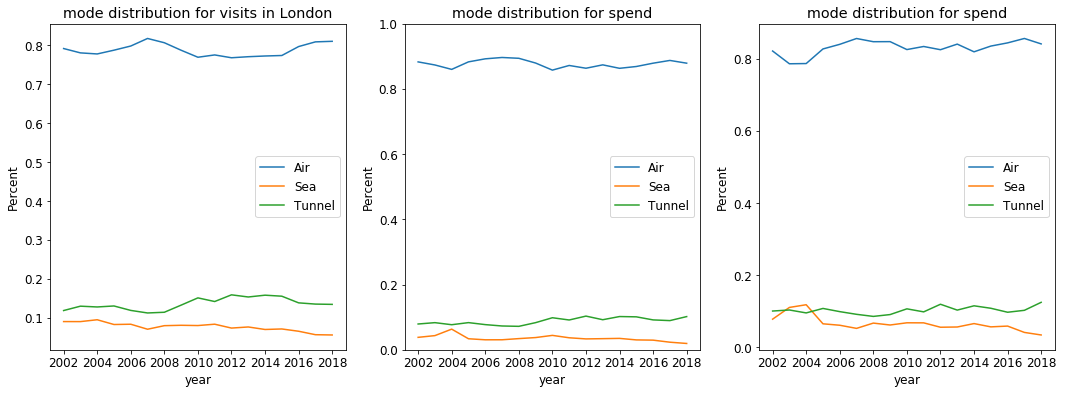

In [2563]:
fig, [ax0,ax,ax2] = plt.subplots(1,3,figsize=(18,6))

font = {'family' : 'sans-serif',
        'size'   : 12}
plt.rc('font', **font)

for mode in uk_visits4['mode'].unique():
    ax0.plot(uk_visits4[uk_visits4["mode"]==mode]['year'],uk_visits4[uk_visits4["mode"]==mode]["visits"].reset_index(drop=True)\
             /uk_visits_t['visits'],label=mode)
ax0.legend(loc=0)
ax0.set_xlabel("year")
ax0.legend(loc=0) 
ax0.set_ylabel("Percent")
ax0.set_title("mode distribution for visits in London")
ax0.set_xticks(list(range(2002,2019,2)))

for mode in uk_visits4['mode'].unique():
    ax.plot(uk_visits4[uk_visits4["mode"]==mode]['year'],uk_visits4[uk_visits4["mode"]==mode]["spend"].reset_index(drop=True)\
             /uk_visits_t['spend'],label=mode)
ax.legend(loc=0)
ax.set_ylim(0,1)

ax.set_xlabel("year")
ax.legend(loc=0) 
ax.set_ylabel("Percent")
ax.set_title("mode distribution for spend")
ax.set_xticks(list(range(2002,2019,2)))

for mode in uk_visits4['mode'].unique():
    ax2.plot(uk_visits4[uk_visits4["mode"]==mode]['year'],uk_visits4[uk_visits4["mode"]==mode]["nights"].reset_index(drop=True)\
             /uk_visits_t['nights'],label=mode)
    
ax2.legend(loc=0)
ax2.set_xlabel("year")
ax2.legend(loc=0) 
ax2.set_ylabel("Percent")
ax2.set_title("mode distribution for spend")
ax2.set_xticks(list(range(2002,2019,2)))

fig.savefig('England_visits_mode.png', dpi=300)

In [1315]:
areas_nounderground

['Lewisham', 'Bexley', 'Kingston upon Thames', 'Sutton', 'Croydon', 'Bromley']

In [1316]:
tt = ['00AG', '00AL', '00AM', '00AN', '00AP', '00AU', '00AW', '00BB',
       '00BD', '00BE', '00BG', '00BJ', '00BK']
[areas[i] for i in tt]

['Camden',
 'Greenwich',
 'Hackney',
 'Hammersmith and Fulham',
 'Haringey',
 'Islington',
 'Kensington and Chelsea',
 'Newham',
 'Richmond upon Thames',
 'Southwark',
 'Tower Hamlets',
 'Wandsworth',
 'Westminster']

In [9]:
# 省去了国家，交通方式
uk_visits2 = uk_visits_adjusted.groupby(['year','quarter','dur_stay','purpose','area'])['visits','spend','nights'].agg('sum').reset_index()
uk_visits2.head()

year  quarter    dur_stay   purpose                area      visits  \
0  2002        0  1-3 nights  Business  ALL STAYING VISITS  982.006073   
1  2002        0  1-3 nights  Business              LONDON  428.733916   
2  2002        0  1-3 nights  Business     REST OF ENGLAND  534.568070   
3  2002        0  1-3 nights  Business          REST OF UK   61.825858   
4  2002        0  1-3 nights  Business       TOTAL ENGLAND  934.361789   

        spend       nights  
0  297.266799  1709.295949  
1  186.331661   756.584380  
2   98.785969   868.673330  
3   12.149167    84.038054  
4  285.117634  1625.257709

In [1785]:
# 省去了呆的时间,quarter
uk_visits3 = uk_visits2.groupby(['year','area'])['visits','spend','nights'].agg('sum').reset_index()

uk_visits3.head()

year                area        visits         spend         nights
0  2002  ALL STAYING VISITS  22307.211330  11528.881795  199285.496073
1  2002              LONDON  11603.382079   5787.853522   75402.111587
2  2002     REST OF ENGLAND  10756.930610   4525.157054   99855.102074
3  2002          REST OF UK   2984.746915   1214.211442   23997.369434
4  2002       TOTAL ENGLAND  20541.501478  10313.010438  175257.210805

In [43]:
# uk_visits3[uk_visits3['area'] == 'TOTAL ENGLAND'].reset_index(drop=True).iloc[:,2:]/uk_visits3[uk_visits3['area'] == 'ALL STAYING VISITS'].reset_index(drop=True).iloc[:,2:]


In [2457]:
uk_visits3[uk_visits3['area'] == 'LONDON'].reset_index(drop=True).iloc[:,2:]

visits         spend         nights
0   11603.382079   5787.853522   75402.111587
1   11695.750442   5869.946135   78946.702332
2   13389.330411   6439.274949   90237.321382
3   13892.568979   6858.580913   91843.262167
4   15592.646141   7821.599766  101067.639106
5   15339.771490   8192.406637   95846.142288
6   14752.993692   8125.685818   90814.916342
7   14211.297986   8238.229751   85685.733114
8   14705.541338   8741.172303   90317.916506
9   15289.492905   9411.383696   91498.423912
10  15460.864247  10074.543381   94299.745436
11  16810.758222  11495.552884   98118.783856
12  17404.215650  11825.412580  108006.478784
13  18581.145357  11919.245403  108321.433209
14  19059.545898  11868.573935  111058.443611
15  19827.815821  13546.637408  114016.467736
16  19090.210802  12329.350140  110932.151147

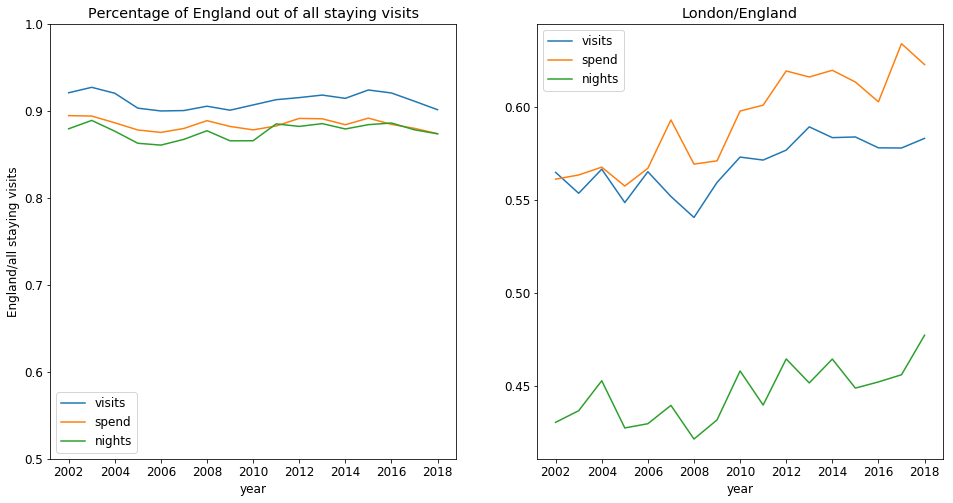

In [2469]:
fig, (ax0,ax) = plt.subplots(1,2,figsize=(16,8))

font = {'family' : 'sans-serif',
        'size'   : 12}
plt.rc('font', **font)

for t in ["visits","spend","nights"]:
    ax0.plot(list(range(2002,2019)),uk_visits3[uk_visits3['area'] == 'TOTAL ENGLAND'].reset_index(drop=True)[t]\
            /uk_visits3[uk_visits3['area'] == 'ALL STAYING VISITS'].reset_index(drop=True)[t],label=t)
ax0.set_xticks(list(range(2002,2019,2)))
ax0.legend(loc=0)
ax0.set_xlabel("year")
ax0.set_title("Percentage of England out of all staying visits")
ax0.set_ylim(0.5,1)
ax0.set_ylabel("England/all staying visits")


fig.savefig('England_visits_3.png', dpi=300)

for t in ["visits","spend","nights"]:
    ax.plot(list(range(2002,2019)),uk_visits3[uk_visits3['area'] == 'LONDON'].reset_index(drop=True)[t]\
            /uk_visits3[uk_visits3['area'] == 'TOTAL ENGLAND'].reset_index(drop=True)[t],label=t)
ax.set_xticks(list(range(2002,2019,2)))
ax.legend(loc=0)
ax.set_xlabel("year")
ax.set_title("Percentage of London out of total England")
ax.set_title("London/England")

fig.savefig('England_visits_2.png', dpi=300)
# uk_visits3[uk_visits3['area'] == 'TOTAL ENGLAND'].reset_index(drop=True).iloc[:,2:]/uk_visits3[uk_visits3['area'] == 'ALL STAYING VISITS'].reset_index(drop=True).iloc[:,2:]


In [2462]:
uk_visits3['area'].unique()

array(['ALL STAYING VISITS', 'LONDON', 'REST OF ENGLAND', 'REST OF UK',
       'TOTAL ENGLAND'], dtype=object)

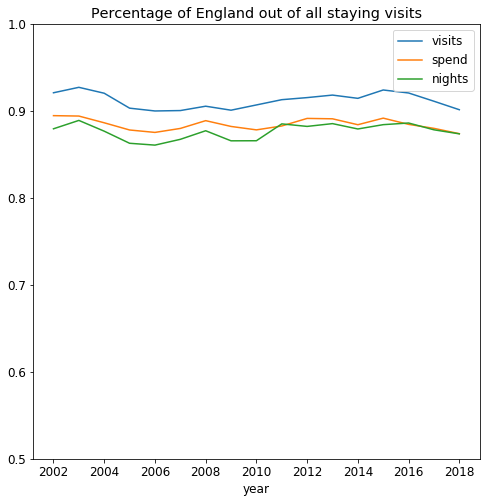

In [2467]:
fig, ax = plt.subplots(figsize=(8,8))

font = {'family' : 'sans-serif',
        'size'   : 12}
plt.rc('font', **font)



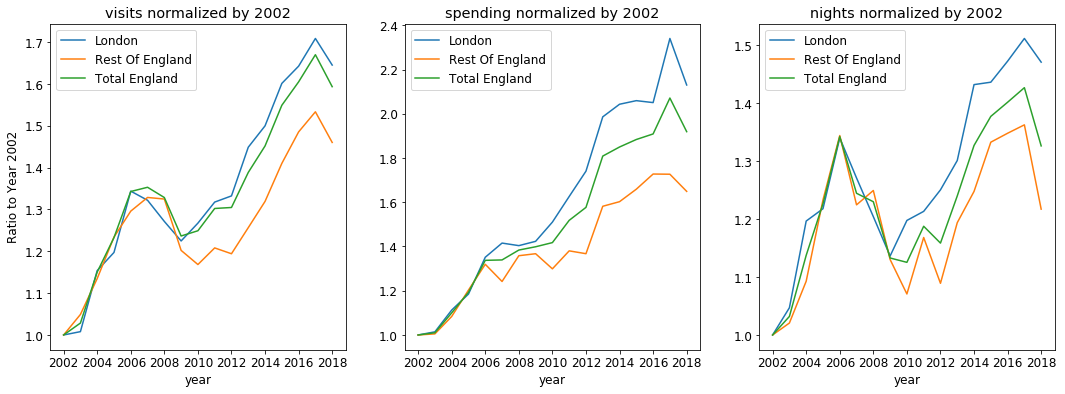

In [1790]:
fig, [ax0,ax,ax2] = plt.subplots(1,3,figsize=(18,6))

font = {'family' : 'sans-serif',
        'size'   : 12}
plt.rc('font', **font)

area = 'LONDON'
index = (uk_visits3['area'] == area)
ax0.plot(uk_visits3[index]['year'],uk_visits3[index]['visits']/uk_visits3[index]['visits'].iloc[0],label=area.title())

area = 'REST OF ENGLAND'
index = (uk_visits3['area'] == area)
ax0.plot(uk_visits3[index]['year'],uk_visits3[index]['visits']/uk_visits3[index]['visits'].iloc[0],label=area.title())

# area = 'REST OF UK'
# index = (uk_visits3['area'] == area)
# ax0.plot(uk_visits3[index]['year'],uk_visits3[index]['visits']/uk_visits3[index]['visits'].iloc[0],label=area)

area = 'TOTAL ENGLAND'
index = (uk_visits3['area'] == area)
ax0.plot(uk_visits3[index]['year'],uk_visits3[index]['visits']/uk_visits3[index]['visits'].iloc[0],label=area.title())

# area = 'ALL STAYING VISITS'
# index = (uk_visits3['area'] == area)
# ax0.plot(uk_visits3[index]['year'],uk_visits3[index]['visits']/uk_visits3[index]['visits'].iloc[0],label=area)
ax0.set_xlabel("year")
ax0.legend(loc=0) 
ax0.set_ylabel("Ratio to Year 2002")
ax0.set_title("visits normalized by 2002")
ax0.set_xticks(list(range(2002,2019,2)))


area = 'LONDON'
index = (uk_visits3['area'] == area)
ax.plot(uk_visits3[index]['year'],uk_visits3[index]['spend']/uk_visits3[index]['spend'].iloc[0],label=area.title())

area = 'REST OF ENGLAND'
index = (uk_visits3['area'] == area)
ax.plot(uk_visits3[index]['year'],uk_visits3[index]['spend']/uk_visits3[index]['spend'].iloc[0],label=area.title())

# area = 'REST OF UK'
# index = (uk_visits3['area'] == area)
# ax.plot(uk_visits3[index]['year'],uk_visits3[index]['spend']/uk_visits3[index]['spend'].iloc[0],label=area)

area = 'TOTAL ENGLAND'
index = (uk_visits3['area'] == area)
ax.plot(uk_visits3[index]['year'],uk_visits3[index]['spend']/uk_visits3[index]['spend'].iloc[0],label=area.title())

# area = 'ALL STAYING VISITS'
# index = (uk_visits3['area'] == area)
# ax.plot(uk_visits3[index]['year'],uk_visits3[index]['spend']/uk_visits3[index]['spend'].iloc[0],label=area)
ax.set_xticks(list(range(2002,2019,2)))
ax.legend(loc=0)
ax.set_xlabel("year")
ax.set_title("spending normalized by 2002")

area = 'LONDON'
index = (uk_visits3['area'] == area)
ax2.plot(uk_visits3[index]['year'],uk_visits3[index]['nights']/uk_visits3[index]['nights'].iloc[0],label=area.title())

area = 'REST OF ENGLAND'
index = (uk_visits3['area'] == area)
ax2.plot(uk_visits3[index]['year'],uk_visits3[index]['nights']/uk_visits3[index]['nights'].iloc[0],label=area.title())

# area = 'REST OF UK'
# index = (uk_visits3['area'] == area)
# ax2.plot(uk_visits3[index]['year'],uk_visits3[index]['nights']/uk_visits3[index]['nights'].iloc[0],label=area)

area = 'TOTAL ENGLAND'
index = (uk_visits3['area'] == area)
ax2.plot(uk_visits3[index]['year'],uk_visits3[index]['nights']/uk_visits3[index]['nights'].iloc[0],label=area.title())

# area = 'ALL STAYING VISITS'
# index = (uk_visits3['area'] == area)
# ax2.plot(uk_visits3[index]['year'],uk_visits3[index]['nights']/uk_visits3[index]['nights'].iloc[0],label=area)
ax2.set_xticks(list(range(2002,2019,2)))
ax2.legend(loc=0) 
ax2.set_xlabel("year")
ax2.set_title("nights normalized by 2002")

# plots.figsave("",'masks_flux_MPL8',imagesize=(18,6))
fig.savefig('England_visits.png', dpi=300)

In [8]:
# [' ISLE OF MAN','ALL STAYING VISITS', 'CENTRAL ENGLAND', "ENGLAND'S NORTH COUNTRY", 'SOUTHERN ENGLAND']

# temp = uk_visits3[uk_visits3["area"] == 'NORTH EAST'].reset_index(drop=True)
# for i in [' CHANNEL ISLANDS',
#        ' OIL RIGS/TRAVELLING',
#        'EAST MIDLANDS', 'EAST OF ENGLAND',
#        'LONDON', 'NORTH WEST', 'SOUTH EAST', 'SOUTH WEST','WEST MIDLANDS', 'YORKSHIRE']:
#     t= uk_visits3[uk_visits3["area"] == i].reset_index(drop=True)
#     if len(t):
#         print(t['area'].iloc[0])
#         temp += t
# #     print(temp.iloc[0])

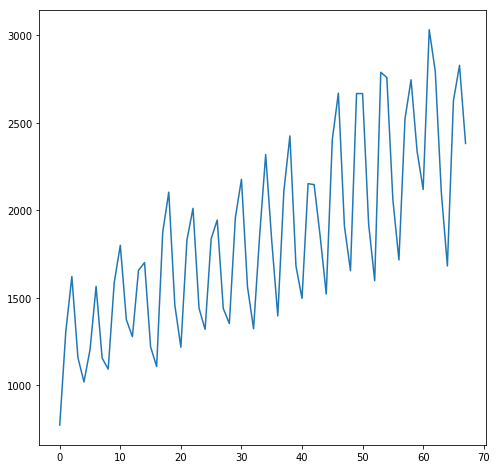

In [1657]:
# 省去了呆的时间,quarter
uk_visits3 = uk_visits2.groupby(['year','quarter','purpose','area'])['visits','spend','nights'].agg('sum').reset_index()


fig,ax = plt.subplots(figsize=(8,8))

ax.plot((uk_visits3[(uk_visits3['area']=='LONDON')&(uk_visits3['purpose']=='Holiday')]['year']-2002)*4+uk_visits3[(uk_visits3['area']=='LONDON')&(uk_visits3['purpose']=='Holiday')]['quarter'],\
        uk_visits3[(uk_visits3['area']=='LONDON')&(uk_visits3['purpose']=='Holiday')]['visits'])


In [12]:
UK_inflation = pd.read_csv("datasets/London/UK_inflation.csv")
# inflations = UK_inflation[['year','multiplier']].iloc[:30].set_index('year').T.to_dict('list')
# inflations = {i:inflations[i][0] for i in inflations}

inflations = {2018:1}
for i in range(2017,1990,-1):
    inflations[i] = inflations[i+1]*(1+UK_inflation[UK_inflation['year']==i]['inflation'].iloc[0])
inflations[2019] = 1/1.018

In [13]:
london_earnings_by_borough = pd.read_csv("datasets/London/london_earnings_by_borough.csv")
london_earnings_by_borough.loc[london_earnings_by_borough["identity"]=='Part-Time',"identity"] = 'Part-time'
london_earnings_by_borough.iloc[20:25]

year area_code                  area identity pay_type    pay  confidence
20  2004      00AB  Barking and Dagenham   Female   Hourly   8.74         6.5
21  2005      00AB  Barking and Dagenham   Female   Hourly   9.43         6.9
22  2006      00AB  Barking and Dagenham   Female   Hourly   9.55         6.6
23  2007      00AB  Barking and Dagenham   Female   Hourly   9.87         9.5
24  2008      00AB  Barking and Dagenham   Female   Hourly  10.62         7.8

In [110]:
# london_infrastructure_spending

In [58]:
london_earnings_by_borough[(london_earnings_by_borough['pay'].isnull())&(london_earnings_by_borough['area_code']!='00AA')]

Empty DataFrame
Columns: [year, area_code, area, identity, pay_type, pay, confidence]
Index: []

In [14]:
def isnan(val):
    return (~(val<0))&(~(val>=0))

for index in london_earnings_by_borough[london_earnings_by_borough['pay'].isnull()].index:
    year,area_code,_,identity,pay_type,_,_ = list(london_earnings_by_borough.iloc[index])
    
    if (area_code!="00AA"):
        if (year==2002):
            _,_,_,_,_,pay,confidence = list(london_earnings_by_borough[(london_earnings_by_borough['year']==year+1)\
                                   &(london_earnings_by_borough['area_code'] == area_code)\
                                  & (london_earnings_by_borough['identity']==identity)\
                              & (london_earnings_by_borough['pay_type']==pay_type)].iloc[0])      
            london_earnings_by_borough[(london_earnings_by_borough['year']==2002)\
                                   &(london_earnings_by_borough['area_code'] == area_code)\
                                  & (london_earnings_by_borough['identity']==identity)\
                              & (london_earnings_by_borough['pay_type']==pay_type)].fillna({"pay":pay,"confidence":confidence},inplace=True)
        elif year<2019:
            _,_,_,_,_,pay1,confidence1 = np.array(london_earnings_by_borough[(london_earnings_by_borough['year']==year+1)\
                                   &(london_earnings_by_borough['area_code'] == area_code)\
                                  & (london_earnings_by_borough['identity']==identity)\
                              & (london_earnings_by_borough['pay_type']==pay_type)].iloc[0])
            _,_,_,_,_,pay2,confidence2 = np.array(london_earnings_by_borough[(london_earnings_by_borough['year']==year-1)\
                                   &(london_earnings_by_borough['area_code'] == area_code)\
                                  & (london_earnings_by_borough['identity']==identity)\
                              & (london_earnings_by_borough['pay_type']==pay_type)].iloc[0])
            
            if isnan(pay1):
                pay = pay2
            elif isnan(pay2):
                pay = pay1
            else:
                pay = (pay1+pay2)//2
            if confidence1==np.nan:
                confidence = confidence2
            elif confidence2 == np.nan:
                confidence = confidence1
            else:
                confidence = (confidence1+confidence2)//2 
        else:
            _,_,_,_,_,pay,confidence = list(london_earnings_by_borough[(london_earnings_by_borough['year']==year-1)\
                                   &(london_earnings_by_borough['area_code'] == area_code)\
                                  & (london_earnings_by_borough['identity']==identity)\
                              & (london_earnings_by_borough['pay_type']==pay_type)].iloc[0])      
            london_earnings_by_borough[(london_earnings_by_borough['year']==2002)\
                                   &(london_earnings_by_borough['area_code'] == area_code)\
                                  & (london_earnings_by_borough['identity']==identity)\
                              & (london_earnings_by_borough['pay_type']==pay_type)].fillna({"pay":pay,"confidence":confidence},inplace=True)            
        london_earnings_by_borough.iloc[index,-2]=pay
        london_earnings_by_borough.iloc[index,-1]=confidence
        

/Users/myzone/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [16]:
london_infrastructure_spending = pd.read_csv("datasets/London/london_infrastructure_spending.csv",encoding='cp1252')
london_infrastructure_spending.head()

expense_category  \
0  Site Preparation and Infrastructure   
1  Site Preparation and Infrastructure   
2  Site Preparation and Infrastructure   
3  Site Preparation and Infrastructure   
4  Site Preparation and Infrastructure   

                                breakdown  baseline_budget  \
0                              Powerlines            282.0   
1                               Utilities            256.0   
2                          Enabling Works            364.0   
3                              F10 Bridge             89.0   
4  Other Structures, Bridges and Highways            740.0   

   31/12/2011_forecast  31/03/2012_forecast  variance  
0                  286                  287       1.0  
1                  238                  235      -3.0  
2                  386                  386       0.0  
3                   56                   55      -1.0  
4                  553                  565      12.0

In [17]:
areas = london_earnings_by_borough[['area_code','area']].drop_duplicates().reset_index(drop=True)
areas = areas.set_index('area_code').T.to_dict('list')
areas = {i:areas[i][0] for i in areas}

In [1235]:
london_taxpayer['year'].unique()

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

In [1236]:
london_earnings.head()

year area_code  Female_Hourly  Female_Weekly  Full-time_Hourly  \
0  2002      00AB      13.242693     458.534137         17.289508   
1  2002      00AC      14.959046     486.247739         20.627738   
2  2002      00AD      14.486655     484.515639         18.423247   
3  2002      00AE      14.644119     520.259886         17.163537   
4  2002      00AF      16.533683     544.036897         20.942665   

   Full-time_Weekly  Male_Hourly  Male_Weekly  Part-time_Hourly  \
0        692.052724    18.108319   738.347036         10.896484   
1        785.901057    21.257592   819.125886         11.967237   
2        731.576099    19.053101   776.453238         10.864992   
3        674.574259    15.746365   648.592758          9.605282   
4        796.923512    23.304620   904.156255         12.439628   

   Part-time_Weekly   mean_income  median_income  population  \
0        241.549233  30075.556377   26768.819812       67000   
1        216.040122  50860.757643   31020.338253      150000   
2        207.852013  33854.683880   28028.528980      114000   
3        185.964566  34169.611172   25824.037936      116000   
4        196.672094  43617.429929   31650.192837      160000   

   economically_active_F  economically_active_M  working_age_F  working_age_M  
0                    NaN                    NaN            NaN            NaN  
1                    NaN                    NaN            NaN            NaN  
2                    NaN                    NaN            NaN            NaN  
3                    NaN                    NaN            NaN            NaN  
4                    NaN                    NaN            NaN            NaN

In [853]:
london_taxpayer_normalized.head()

year area_code                  area  population  mean_income  \
0  1999      00AB  Barking and Dagenham       62000     0.902678   
1  2000      00AB  Barking and Dagenham       71000     0.993643   
2  2001      00AB  Barking and Dagenham       56000     0.991351   
3  2002      00AB  Barking and Dagenham       67000     1.000000   
4  2003      00AB  Barking and Dagenham       67000     0.967840   

   median_income  
0       0.945320  
1       0.962190  
2       0.970094  
3       1.000000  
4       1.006420

In [432]:
areas_regions

{'A': 'North East',
 'B': 'North West',
 'D': 'Yorkshire and The Humber',
 'E': 'East Midlands',
 'F': 'West Midlands',
 'G': 'East',
 'H': 'London',
 'J': 'South East',
 'K': 'South West'}

In [611]:
areas_boroughs = {i:j for i,j in areas.items() if "00" in i}

areas_regions = {i:j for i,j in areas.items() if len(i)==1}

areas_boroughs_reverse = {j:i for i,j in areas_boroughs.items()}

In [23]:
import colorsys
from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())[::2]
sorted_names = np.random.choice([name for hsv, name in by_hsv],50)
RGBs = {i:j for i,j in zip(sorted(areas.keys()),sorted_names[:len(areas)])}

RGBs['00AA'] = 'red'
RGBs['00AW'] = 'blue'

In [82]:
london_economic_activity = pd.read_csv("datasets/London/london_economic_activity.csv")
london_economic_activity['year'] = london_economic_activity['year'].apply(lambda x:int(re.sub("[^0-9]", "",x)[:4]))
areas_economic = london_economic_activity[['area_code','area']].drop_duplicates().reset_index(drop=True)
areas_economic = areas_economic.set_index('area_code').T.to_dict('list')
areas_economic = {i:areas_economic[i][0] for i in areas_economic}

london_economic_activity.head()

year area_code            area gender  economically_active  working_age  \
0  2005      00AA  City of London      F               2400.0       3600.0   
1  2006      00AA  City of London      F                  NaN          NaN   
2  2007      00AA  City of London      F                  NaN       1400.0   
3  2008      00AA  City of London      F               1200.0       1200.0   
4  2009      00AA  City of London      F                  NaN          NaN   

   percent  confidence  
0     64.4         NaN  
1      NaN         NaN  
2      NaN         NaN  
3    100.0         NaN  
4      NaN         NaN

In [25]:
london_sports_participation = pd.read_csv("datasets/London/london_sports_participation.csv")
areas_sports = london_sports_participation[['area_code','area']].drop_duplicates().reset_index(drop=True)
areas_sports = areas_sports.set_index('area_code').T.to_dict('list')
areas_sports = {i:areas_sports[i][0] for i in areas_sports}
london_sports_participation.head()

/Users/myzone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  This is separate from the ipykernel package so we can avoid doing imports until


year area_code        area sports_participation  percentage  \
0  2005-2006         A  North East                 one+       0.329   
1  2007-2008         A  North East                 one+       0.348   
2  2008-2009         A  North East                 one+       0.354   
3  2009-2010         A  North East                 one+       0.358   
4  2010-2011         A  North East                 one+       0.335   

   population  
0    687000.0  
1    730300.0  
2    748600.0  
3    760100.0  
4    719300.0

In [ ]:
# london_taxpayer.to_csv("datasets2/london_taxpayer.csv")
areas_taxpayer = london_taxpayer_income[['area_code','area']].drop_duplicates().reset_index(drop=True)
areas_taxpayer = areas_taxpayer.set_index('area_code').T.to_dict('list')
areas_taxpayer = {i:areas_taxpayer[i][0] for i in areas_taxpayer}

In [873]:
london_taxpayer = london_taxpayer.append(london_taxpayer[(london_taxpayer['year']>=2007)&(london_taxpayer['year']<=2009)].groupby(['area_code','area']).mean().reset_index().\
reindex(columns= ['year','area_code','area','population','mean','median'])).sort_values(['area_code','year'])
london_taxpayer.head(10)

area area_code  mean    mean_income  median  median_income  \
0  City of London      00AA   NaN  184006.721758     NaN   67703.748261   
1  City of London      00AA   NaN  226196.495920     NaN  107319.505364   
2  City of London      00AA   NaN  148916.834179     NaN   61394.130776   
3  City of London      00AA   NaN  123923.889366     NaN   58261.549003   
4  City of London      00AA   NaN  132845.435820     NaN   60693.952030   
5  City of London      00AA   NaN  143847.350658     NaN   66807.765368   
6  City of London      00AA   NaN  132353.353065     NaN   72020.091679   
7  City of London      00AA   NaN  140969.548278     NaN   69632.135742   
8  City of London      00AA   NaN  140453.999480     NaN   80554.499702   
0  City of London      00AA   NaN  157767.497019     NaN   79477.852055   

   population  year  
0       10000  1999  
1       10000  2000  
2       12000  2001  
3       11000  2002  
4       10000  2003  
5       10000  2004  
6       10000  2005  
7       10000  2006  
8       10000  2007  
0        9500  2008

In [889]:
london_taxpayer = london_taxpayer.append(london_taxpayer[(london_taxpayer['year']>=2007)&(london_taxpayer['year']<=2009)].groupby(['area_code','area']).mean().reset_index())
                                         
                                         

In [898]:
# 纳税人工资
london_taxpayer_income = pd.read_csv("datasets/London/london_taxpayer_income.csv")
london_taxpayer_income['year'] = london_taxpayer_income['year'].apply(lambda x:int(x.split("-")[0]))


london_taxpayer_income = london_taxpayer_income.append(london_taxpayer_income[(london_taxpayer_income['year']>=2007)&(london_taxpayer_income['year']<=2009)].groupby(['area_code','area']).mean().reset_index().\
reindex(columns= ['year','area_code','area','population','mean_income','median_income'])).sort_values(['area_code','year'])
for col in ['year','population','mean_income','median_income']:
    london_taxpayer_income[col] = london_taxpayer_income[col].map(int)

london_taxpayer = pd.concat([london_taxpayer_income.iloc[:,:-2],\
                             london_taxpayer_income.iloc[:,-2:].multiply(london_taxpayer_income['year'].map(inflations),axis=0)],\
                            axis=1)

# london_taxpayer = london_taxpayer.append(london_taxpayer[(london_taxpayer['year']>=2007)&(london_taxpayer['year']<=2009)].groupby(['area_code','area']).mean().reset_index())                                         
# london_taxpayer = london_taxpayer.reindex(columns= ['year','area_code','area','population','mean_income','median_income']).sort_values(['area_code','year'])
# for col in ['year','population','mean_income','median_income']:
#     london_taxpayer[col] = london_taxpayer[col].map(int)

london_taxpayer.head(10)


year area_code            area  population    mean_income  median_income
0  1999      00AA  City of London       10000  184006.721758   67703.748261
1  2000      00AA  City of London       10000  226196.495920  107319.505364
2  2001      00AA  City of London       12000  148916.834179   61394.130776
3  2002      00AA  City of London       11000  123923.889366   58261.549003
4  2003      00AA  City of London       10000  132845.435820   60693.952030
5  2004      00AA  City of London       10000  143847.350658   66807.765368
6  2005      00AA  City of London       10000  132353.353065   72020.091679
7  2006      00AA  City of London       10000  140969.548278   69632.135742
8  2007      00AA  City of London       10000  140453.999480   80554.499702
0  2008      00AA  City of London        9500  157767.497019   79477.852055

In [899]:
london_taxpayer.shape,london_taxpayer['area_code'].nunique(),london_taxpayer['year'].nunique()

((893, 6), 47, 19)

In [900]:
london_taxpayer.to_csv("london_taxpayer.csv")

In [897]:
london_taxpayer[(london_taxpayer['year']>=2007)&(london_taxpayer['year']<=2009)].groupby(['area_code','area']).mean().reset_index()

area_code                      area  year  population    mean_income  \
0       00AA            City of London  2008        9500  157378.807736   
1       00AB      Barking and Dagenham  2008       76000   29321.183260   
2       00AC                    Barnet  2008      174000   53035.447455   
3       00AD                    Bexley  2008      122500   35882.340947   
4       00AE                     Brent  2008      154000   33559.480715   
5       00AF                   Bromley  2008      174500   46835.318537   
6       00AG                    Camden  2008      105500   91712.600427   
7       00AH                   Croydon  2008      177500   38183.691584   
8       00AJ                    Ealing  2008      168000   41210.474809   
9       00AK                   Enfield  2008      141000   38762.561705   
10      00AL                 Greenwich  2008      118500   41399.846583   
11      00AM                   Hackney  2008       99500   38112.202816   
12      00AN    Hammersmith and Fulham  2008       97500   67025.963068   
13      00AP                  Haringey  2008      125000   44237.258034   
14      00AQ                    Harrow  2008      120000   43419.036966   
15      00AR                  Havering  2008      128500   37504.653235   
16      00AS                Hillingdon  2008      136000   37790.608305   
17      00AT                  Hounslow  2008      129000   40145.523046   
18      00AU                 Islington  2008      103500   60532.709216   
19      00AW    Kensington and Chelsea  2008       72500  206088.223368   
20      00AX      Kingston-upon-Thames  2008       80500   51152.274624   
21      00AY                   Lambeth  2008      154000   45380.868428   
22      00AZ                  Lewisham  2008      136000   36861.464212   
23      00BA                    Merton  2008      109500   55054.427955   
24      00BB                    Newham  2008      126000   28345.644928   
25      00BC                 Redbridge  2008      129500   39184.324444   
26      00BD      Richmond-upon-Thames  2008      104000   76521.115500   
27      00BE                 Southwark  2008      138000   48114.736602   
28      00BF                    Sutton  2008      101000   39666.821153   
29      00BG             Tower Hamlets  2008      112000   50030.173825   
30      00BH            Waltham Forest  2008      124500   31704.777462   
31      00BJ                Wandsworth  2008      167500   67572.778679   
32      00BK               Westminster  2008      106500  116226.741261   
33       922          Northern Ireland  2008      769500   30732.824062   
34       923                  Scotland  2008     2690000   33427.257978   
35       924                     Wales  2008     1425000   29528.479697   
36       926            United Kingdom  2008    31600000   36464.796000   
37       941                   England  2008    26400000   37322.451326   
38         A                North East  2008     1220000   30378.965158   
39         B                North West  2008     3360000   31837.000199   
40         D  Yorkshire and The Humber  2008     2485000   31508.235823   
41         E             East Midlands  2008     2250000   32373.061013   
42         F             West Midlands  2008     2650000   31840.585132   
43         G           East of England  2008     3025000   38251.595419   
44         H                    London  2008     4020000   50994.957360   
45         J                South East  2008     4590000   41950.247127   
46         K                South West  2008     2790000   33030.589766   

    median_income  
0    79537.143927  
1    25107.980333  
2    30568.336932  
3    27659.436714  
4    25032.906633  
5    31769.096364  
6    36532.699835  
7    29049.567921  
8    27738.095347  
9    27727.340549  
10   27684.531242  
11   28470.697800  
12   33198.451946  
13   27466.480007  
14   29671.457232  
15   28274.156161  
16   29596.383532  
17   28002.540821  
18   33998.958234  
19

In [895]:
london_taxpayer[london_taxpayer['year']==2008]

year area_code                      area  population  mean_income  \
0   2008      00AA            City of London        9500       157767   
0   2008      00AA            City of London        9500       157378   
1   2008      00AB      Barking and Dagenham       76000        29309   
1   2008      00AB      Barking and Dagenham       76000        29321   
2   2008      00AC                    Barnet      174000        53007   
2   2008      00AC                    Barnet      174000        53035   
3   2008      00AD                    Bexley      122500        35844   
3   2008      00AD                    Bexley      122500        35882   
4   2008      00AE                     Brent      154000        33533   
4   2008      00AE                     Brent      154000        33559   
5   2008      00AF                   Bromley      174500        46802   
5   2008      00AF                   Bromley      174500        46835   
6   2008      00AG                    Camden      105500        91557   
6   2008      00AG                    Camden      105500        91712   
7   2008      00AH                   Croydon      177500        38154   
7   2008      00AH                   Croydon      177500        38183   
8   2008      00AJ                    Ealing      168000        41191   
8   2008      00AJ                    Ealing      168000        41210   
9   2008      00AK                   Enfield      141000        38748   
9   2008      00AK                   Enfield      141000        38762   
10  2008      00AL                 Greenwich      118500        41389   
10  2008      00AL                 Greenwich      118500        41399   
11  2008      00AM                   Hackney       99500        38088   
11  2008      00AM                   Hackney       99500        38112   
12  2008      00AN    Hammersmith and Fulham       97500        67001   
12  2008      00AN    Hammersmith and Fulham       97500        67025   
13  2008      00AP                  Haringey      125000        44227   
13  2008      00AP                  Haringey      125000        44237   
14  2008      00AQ                    Harrow      120000        43369   
14  2008      00AQ                    Harrow      120000        43419   
..   ...       ...                       ...         ...          ...   
32  2008      00BK               Westminster      106500       116246   
32  2008      00BK               Westminster      106500       116226   
33  2008       922          Northern Ireland      769500        30695   
33  2008       922          Northern Ireland      769500        30732   
34  2008       923                  Scotland     2690000        33401   
34  2008       923                  Scotland     2690000        33427   
35  2008       924                     Wales     1425000        29507   
35  2008       924                     Wales     1425000        29528   
36  2008       926            United Kingdom    31600000        36438   
36  2008       926            United Kingdom    31600000        36464   
37  2008       941                   England    26400000        37296   
37  2008       941                   England    26400000        37322   
38  2008         A                North East     1220000        30365   
38  2008         A                North East     1220000        30378   
39  2008         B                North West     3360000        31817   
39  2008         B                North West     3360000        31837   
40  2008         D  Yorkshire and The Humber     2485000        31487   
40  2008         D  Yorkshire and The Humber     2485000        31508   
41  2008         E             East Midlands     2250000        32345   
41  2008         E             East Midlands     2250000        32373   
42  2008         F             West Midlands     2650000        31817   
42  2008         F             West Midlands     2650000        31840   
43  2008         G           East of England     3025000      

In [901]:
london_taxpayer_normalized = pd.DataFrame()

for area_code in london_taxpayer['area_code'].unique():
    temp = london_taxpayer[london_taxpayer['area_code'] == area_code].reset_index(drop=True)
    temp = pd.concat([temp.iloc[:,:-2],temp.iloc[:,-2:].divide(temp.iloc[3,-2:])],axis=1)
    london_taxpayer_normalized = london_taxpayer_normalized.append(temp)     
    
#     temp = london_taxpayer[london_taxpayer['area_code'] == area_code].reset_index(drop=True)
#     temp = pd.concat([temp.iloc[:,:-2],london_taxpayer[london_taxpayer['area_code'] == area_code].reset_index(drop=True).iloc[:,-2:].div\
# (london_taxpayer[london_taxpayer['area_code'] == area_code].reset_index(drop=True).iloc[:,-2:].shift(1))],axis=1)
#     london_taxpayer_normalized = london_taxpayer_normalized.append(temp.iloc[1:]) 
    
london_taxpayer_normalized = london_taxpayer_normalized[london_taxpayer_normalized['area']!='City of London'].reset_index(drop=True)


In [192]:
temp = pd.pivot_table(london_earnings_by_borough, values='pay', index=['year', 'area_code'],
                    columns=['identity','pay_type']).reset_index()
temp.columns = ['_'.join(col) for col in temp.columns]
temp.rename(columns={"year_": "year", "area_code_": "area_code"},inplace=True)
temp = temp[(temp.year<=2017)&(temp['year']>=2002)]

temp2 = london_taxpayer_income[(london_taxpayer_income['year']<=2017)&(london_taxpayer_income['year']>=2002)]

london_earnings = temp.merge(temp2[['year','area_code','population','mean_income','median_income']],on=['year','area_code'])

columns = list(london_earnings.columns)
columns.pop(columns.index("population"))
columns+=['population']

london_earnings = london_earnings.reindex(columns= columns)

london_earnings = pd.concat([london_earnings.iloc[:,:2],pd.concat([london_earnings.iloc[:,2:-1].multiply(london_earnings['year'].map(inflations),axis=0),london_earnings.iloc[:,-1]],axis=1)],axis=1)


london_earnings_normalized = pd.DataFrame()
for area_code in london_earnings['area_code'].unique():
    temp = london_earnings[london_earnings['area_code'] == area_code].reset_index(drop=True)
    temp = pd.concat([temp.iloc[:,:2],temp.iloc[:,2:].divide(temp.iloc[0,2:])],axis=1)
    london_earnings_normalized = london_earnings_normalized.append(temp)
    
    
temp = pd.pivot_table(london_economic_activity, values=['economically_active','working_age'], index=['year', 'area_code'],
                    columns=['gender']).reset_index()
temp.columns = ['_'.join(col) for col in temp.columns]
temp.rename(columns={"year_": "year", "area_code_": "area_code"},inplace=True)

london_earnings = london_earnings.merge(temp,on=['year','area_code'],how='left')

In [29]:
london_city = london_earnings[london_earnings['area_code']=='H'].reset_index(drop=True)

In [31]:
london_earnings_normalized.head()

year area_code  Female_Hourly  Female_Weekly  Full-time_Hourly  \
0  2002      00AB       1.000000       1.000000          1.000000   
1  2003      00AB       0.982115       0.969102          0.918807   
2  2004      00AB       0.993068       0.939493          0.911188   
3  2005      00AB       1.040261       1.017265          0.916756   
4  2006      00AB       1.024804       1.014970          0.960828   

   Full-time_Weekly  Male_Hourly  Male_Weekly  Part-time_Hourly  \
0          1.000000     1.000000     1.000000          1.000000   
1          0.904532     0.915737     0.920374          0.983284   
2          0.899260     0.884943     0.870796          0.916908   
3          0.906631     0.848681     0.838904          0.941147   
4          0.981938     0.940140     0.944621          0.971591   

   Part-time_Weekly  mean_income  median_income  population  
0          1.000000     1.000000       1.000000    1.000000  
1          0.824959     0.967840       1.006420    1.000000  
2          0.812299     0.970582       0.933089    1.149254  
3          0.806179     1.000600       0.976856    1.238806  
4          0.847170     0.973346       0.934323    1.149254

Ealing


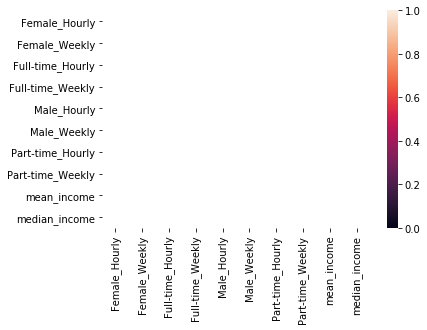

In [1486]:
code = "00AJ"
print(areas[code])
temp2 = temp[temp['area_code']==code].reset_index(drop=True)
columns = list(temp2.columns)
columns.pop(columns.index("population"))
columns+=['population']
temp2 = temp2.reindex(columns= columns)
# temp2.head()
temp2 = pd.concat([temp2.iloc[:,2:-1].multiply(temp2['year'].map(inflations),axis=0),temp2.iloc[:,-1]],axis=1)

sns.heatmap((temp2.iloc[:,:-1]).corr(),vmin=0,vmax=1)

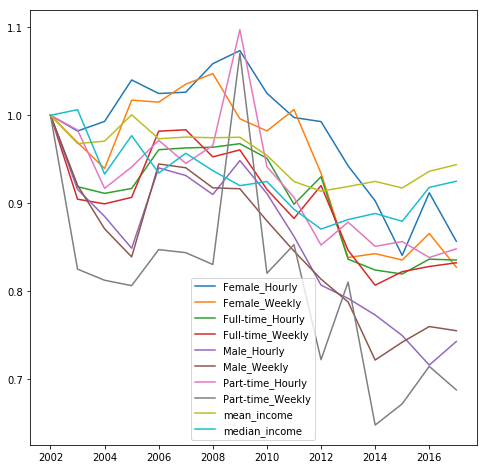

In [70]:
fig,ax = plt.subplots(figsize=(8,8))
for identity in london_earnings_normalized.columns[2:-1]:
    ax.plot(london_earnings_normalized[london_earnings_normalized['area_code']=='00AB']['year'],\
            london_earnings_normalized[london_earnings_normalized['area_code']=='00AB'][identity],label=identity)
ax.legend(loc=0)

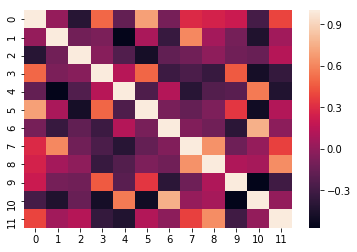

In [1093]:
sns.heatmap(pd.DataFrame(np.random.randn(10, 12)).corr())

In [454]:
counts.most_common(10)

[('Redbridge', 39),
 ('Sutton', 36),
 ('Harrow', 30),
 ('Croydon', 30),
 ('Hillingdon', 27),
 ('Southwark', 27),
 ('Havering', 24),
 ('Lewisham', 24),
 ('Hackney', 21),
 ('Ealing', 15)]

In [53]:
import collections
counts = collections.Counter()

for year in london_taxpayer_income['year'].drop_duplicates():
    index = (london_taxpayer_income['year']==year) & (london_taxpayer_income['area_code'].isin(areas_boroughs))
    for i in list(london_taxpayer_income[index].sort_values('median_income')['area'][13:19]):
        counts[i] = counts[i]+1

control_four = [areas_boroughs_reverse[i[0]] for i in counts.most_common(4)]

In [150]:
control_four

['00BC', '00BF', '00AQ', '00AH']

In [35]:
# find the lowest three and highest three boroughs
low = dict()
high = dict()
for year in london_taxpayer_income['year'].drop_duplicates():
    index = (london_taxpayer_income['year']==year) & (london_taxpayer_income['area_code'].isin(areas_boroughs))
    low[year] = list(london_taxpayer_income[index].sort_values('median_income')['area_code'].iloc[:6])
    high[year] = list(london_taxpayer_income[index].sort_values('median_income', ascending=False)['area_code'].iloc[:6])
    
low = pd.Series(low).reset_index()
low.columns = ['year','name']
low = pd.DataFrame(low['name'].tolist(), index= low['year']).reset_index()
low.columns = ['year','low1st','low2nd','low3rd','low4th','low5th',"low6th"]

high = pd.Series(high).reset_index()
high.columns = ['year','name']
high = pd.DataFrame(high['name'].tolist(), index= high['year']).reset_index()
high.columns = ['year','high1st','high2nd','high3rd','high4th','high5th',"high6th"]

df_income = pd.merge(low,high,on='year')

poor_four = df_income.iloc[:,1:7].apply(pd.value_counts).sum(axis=1).sort_values(ascending=False)[:4].index.tolist()

rich_four = df_income.iloc[:,7:13].apply(pd.value_counts).sum(axis=1).sort_values(ascending=False)[:5].index.tolist()

rich_four.remove("00AA")

df_income

year low1st low2nd low3rd low4th low5th low6th high1st high2nd high3rd  \
0   1999   00BB   00BG   00AM   00BE   00AR   00AZ    00AA    00BD    00AX   
1   2000   00BB   00BH   00AZ   00AY   00BE   00AB    00AA    00AW    00BK   
2   2001   00BB   00AB   00AE   00AT   00BH   00BE    00AA    00AW    00BD   
3   2002   00BB   00AE   00AB   00AL   00AP   00BH    00AA    00AW    00BD   
4   2003   00BB   00AE   00BH   00AZ   00AM   00AB    00AA    00BD    00AW   
5   2004   00BB   00AE   00AB   00BH   00AK   00AL    00AA    00BD    00AG   
6   2005   00BB   00AE   00BH   00AB   00AL   00AP    00AA    00AW    00BK   
7   2006   00BB   00AB   00BH   00AE   00AM   00AP    00AA    00AW    00BD   
8   2007   00BB   00BH   00AE   00AB   00AD   00AP    00AA    00AW    00BK   
9   2008   00BB   00AE   00AB   00BH   00AP   00AD    00AA    00AW    00BK   
10  2009   00BB   00AB   00AE   00BH   00AL   00AJ    00AA    00AW    00BK   
11  2010   00BB   00AB   00AE   00BH   00AJ   00AK    00AA    00AW    00BK   
12  2011   00BB   00AB   00AE   00BH   00AJ   00AL    00AA    00AW    00BK   
13  2012   00BB   00AB   00AE   00BH   00AT   00AL    00AA    00AW    00BK   
14  2013   00BB   00AB   00AE   00BH   00AJ   00AL    00AA    00AW    00BK   
15  2014   00BB   00AB   00AE   00BH   00AD   00AJ    00AA    00AW    00BD   
16  2015   00AB   00BB   00AE   00BH   00AD   00AJ    00AA    00BK    00AW   
17  2016   00BB   00AB   00AE   00BH   00AP   00AK    00AA    00AW    00BD   
18  2017   00AB   00BB   00AE   00BH   00AK   00AT    00AA    00AW    00BK   

   high4th high5th high6th  
0     00AG    00AN    00AU  
1     00BD    00BJ    00AG  
2     00BK    00BJ    00AN  
3     00BK    00BJ    00AG  
4     00BK    00BJ    00AU  
5     00BK    00AW    00BJ  
6     00BD    00BJ    00AG  
7     00BK    00AG    00BJ  
8     00BD    00AG    00BJ  
9     00BD    00AG    00BJ  
10    00BD    00BJ    00AG  
11    00BD    00AG    00BJ  
12    00BD    00AG    00BJ  
13    00BD    00AG    00BJ  
14    00BD    00AG    00BJ  
15    00BK    00AG    00BJ  
16    00BD    00AG    00BJ  
17    00BK    00AG    00BJ  
18    00AG    00BD    00BJ

In [36]:
df_income.iloc[:,7:13].apply(pd.value_counts).sum(axis=1).sort_values(ascending=False)

00BD    19.0
00AA    19.0
00BK    18.0
00BJ    18.0
00AW    18.0
00AG    17.0
00AU     2.0
00AN     2.0
00AX     1.0
dtype: float64

In [416]:
len(sorted_names)

50

Text(0.5,1,'median income for different area, inflation adjusted')

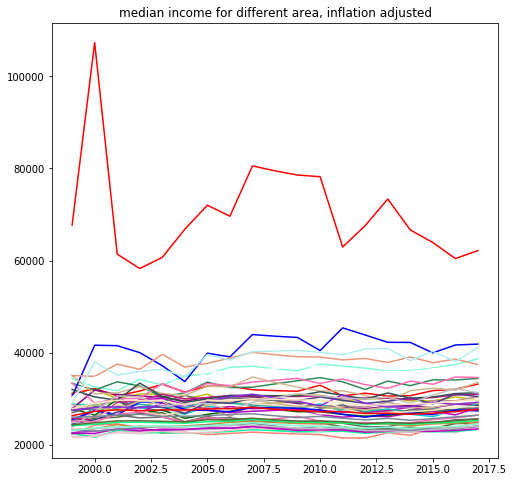

In [74]:
fig,ax = plt.subplots(figsize=(8,8))
for code in london_taxpayer_income['area_code'].unique():
    index = (london_taxpayer_income['area_code']==code)
    ax.plot(london_taxpayer_income[index]['year'],london_taxpayer_income[index]['median_income']*london_taxpayer_income[index]['year'].map(inflations),color=RGBs[code])
    
ax.set_title("median income for different area, inflation adjusted")    

Text(0.5,1,'median income for different area, inflation adjusted')

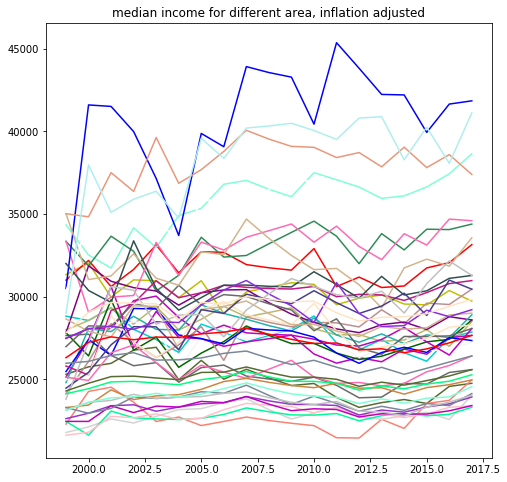

In [76]:
fig,ax = plt.subplots(figsize=(8,8))
for code in london_taxpayer['area_code'].unique():
    if code!='00AA':
        index = (london_taxpayer['area_code']==code)
        ax.plot(london_taxpayer[index]['year'],london_taxpayer[index]['median_income'],color=RGBs[code])
    
ax.set_title("median income for different area, inflation adjusted") 

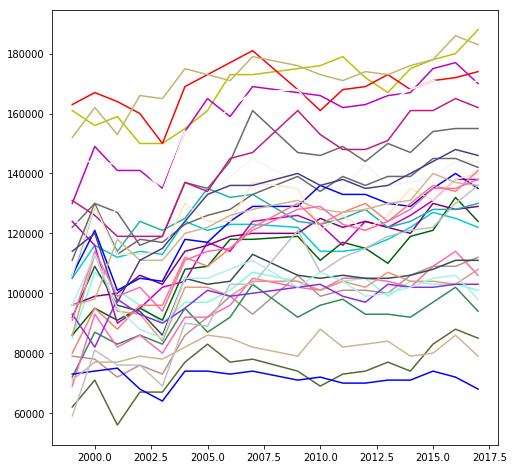

In [78]:
fig,ax = plt.subplots(figsize=(8,8))
for code in areas_boroughs:
    if code!='00AA':
        index = (london_taxpayer_income['area_code']==code)
        ax.plot(london_taxpayer_income[index]['year'],london_taxpayer_income[index]['population'],color=RGBs[code])

In [1078]:
jobs_normalized.head()

year area_code  number_of_jobs  job_density
0  2009      00AB        0.903846         0.84
1  2010      00AB        0.980769         0.88
2  2011      00AB        1.038462         0.90
3  2012      00AB        1.057692         0.92
4  2013      00AB        1.038462         0.88

In [1060]:
jobs['area'].unique()

array(['City of London', 'Barking and Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith and Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington and Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'North East',
       'North West', 'Yorkshire and The Humber', 'East Midlands',
       'West Midlands', 'East', 'London', 'South East', 'South West',
       'Wales', 'Scotland', 'Northern Ireland', 'England',
       'England and Wales', 'Great Britain', 'United Kingdom'],
      dtype=object)

In [1079]:
london_X.head()

year area_code  Female_Hourly  Female_Weekly  Full-time_Hourly  \
0  2009      00AB       0.032086      -0.020799          0.055590   
1  2010      00AB      -0.014591      -0.034478          0.037551   
2  2011      00AB      -0.041104      -0.010520         -0.019620   
3  2012      00AB      -0.045578      -0.081801          0.014579   
4  2013      00AB      -0.093930      -0.176026         -0.087762   

   Full-time_Weekly  Male_Hourly  Male_Weekly  Part-time_Hourly  \
0          0.059568     0.117613     0.092373          0.166067   
1          0.009991     0.073419     0.048839          0.000243   
2         -0.026455     0.015895     0.007834         -0.036609   
3          0.014861    -0.049409    -0.030190         -0.094404   
4         -0.066386    -0.067188    -0.061168         -0.066613   

   Part-time_Weekly  ...  economically_active_F  economically_active_M  \
0          0.327915  ...               0.096273               0.079602   
1          0.017484  ...               0.105590               0.189055   
2          0.057924  ...               0.186335               0.166667   
3         -0.104518  ...               0.192547               0.208955   
4          0.005026  ...               0.285714               0.223881   

   working_age_F  working_age_M  activity_F  activity_M  Olympic      coef  \
0       0.046211       0.060904    1.047851    1.017625        0 -0.042473   
1       0.092421       0.102161    1.012055    1.078839        0 -0.072394   
2       0.133087       0.135560    1.046994    1.027393        0 -0.038439   
3       0.144177       0.145383    1.042274    1.055503        0 -0.062552   
4       0.144177       0.165029    1.123702    1.050515        0 -0.053060   

   number_of_jobs  job_density  
0           47000         0.42  
1           51000         0.44  
2           54000         0.45  
3           55000         0.46  
4           54000         0.44  

[5 rows x 23 columns]

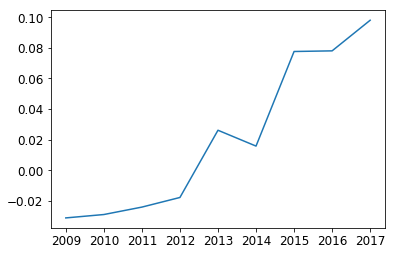

In [1013]:
plt.plot(list(range(2009,2018)),res_coef['00BB'])
plt.plot(list(range(2009,2018)),res_coef['00BB'])

In [805]:
london_underground.head()

year                  area  weekday_entry  weekday_exit  saturday_entry  \
0  2007  Barking and Dagenham          37215       35548.0           24874   
1  2007                Barnet          73550       69337.0           49400   
2  2007                 Brent         126101      120759.0           94344   
3  2007                Camden         373473      377669.0          255139   
5  2007        City of London         327596      342181.0          102707   

   saturday_exit  sunday_entry  sunday_exit  annual_entry_and_exit   weekend  \
0          23552         16058        15346                  22.77   39915.0   
1          43152         31000        30597                  44.58   77074.5   
2          91462         64896        64783                  79.77  157742.5   
3         251977        180678       172411                 237.24  430102.5   
5         107995         70070        78745                 189.19  179758.5   

    weekday area_code  
0   72763.0      00AB  
1  142887.0      00AC  
2  246860.0      00AE  
3  751142.0      00AG  
5  669777.0      00AA

In [852]:
areas_nounderground = [areas_boroughs[i] for i in set(areas_boroughs)-set(london_underground['area_code'].unique())]

In [987]:
lr.coef_

array([-0.0184714 ,  0.01464848,  0.15867852, -0.18413033, -0.01191171,
       -0.01825085,  0.03264194, -0.04943596,  0.04771258,  0.76999947,
       -0.09123462,  0.42447386, -0.19983514, -0.52314253,  0.28771617,
       -0.46815038,  0.35846371, -0.03391154])

In [1008]:
train_X.columns

Index(['Female_Hourly', 'Female_Weekly', 'Full-time_Hourly',
       'Full-time_Weekly', 'Male_Hourly', 'Male_Weekly', 'Part-time_Hourly',
       'Part-time_Weekly', 'population', 'economically_active_F',
       'economically_active_M', 'working_age_F', 'working_age_M', 'activity_F',
       'activity_M', 'Olympic', 'mean_median'],
      dtype='object')

In [1007]:
regr.feature_importances_

array([0.02377596, 0.02824285, 0.02190855, 0.04407664, 0.0336326 ,
       0.02481162, 0.03894877, 0.06427163, 0.06154614, 0.16779627,
       0.03671922, 0.20320822, 0.0451065 , 0.06524016, 0.0646367 ,
       0.00026889, 0.0758093 ])

In [1003]:
train_X.shape,train_Y.shape

((234, 17), (234,))

LinearRegression()

0.4014848945772994

0.9214244502741009

In [997]:
lr.coef_

array([-0.08272614,  0.05970401,  0.44422037, -0.45892968, -0.08232296,
        0.02739238,  0.07533495, -0.0368895 ,  0.33165698,  0.03724598,
        0.77271531,  0.14574903, -0.83175214, -0.2042576 , -0.85124281,
       -0.1171099 , -0.00558709])

In [796]:
est2.pvalues

Female_Hourly            5.418916e-01
Female_Weekly            8.322820e-01
Full-time_Hourly         4.684236e-03
Full-time_Weekly         1.034408e-02
Male_Hourly              5.559479e-01
Male_Weekly              6.335640e-01
Part-time_Hourly         6.883508e-02
Part-time_Weekly         1.392089e-01
mean_income              1.042466e-02
median_income            1.977488e-47
population               7.070452e-04
economically_active_F    3.968558e-04
economically_active_M    2.319523e-03
working_age_F            3.115044e-04
working_age_M            9.037247e-04
activity_F               1.020575e-03
activity_M               5.957495e-04
Olympic                  1.480876e-02
dtype: float64

In [1021]:
london_infrastructure_spending.head()

expense_category  \
0  Site Preparation and Infrastructure   
1  Site Preparation and Infrastructure   
2  Site Preparation and Infrastructure   
3  Site Preparation and Infrastructure   
4  Site Preparation and Infrastructure   

                                breakdown  baseline_budget  \
0                              Powerlines            282.0   
1                               Utilities            256.0   
2                          Enabling Works            364.0   
3                              F10 Bridge             89.0   
4  Other Structures, Bridges and Highways            740.0   

   31/12/2011_forecast  31/03/2012_forecast  variance  
0                  286                  287       1.0  
1                  238                  235      -3.0  
2                  386                  386       0.0  
3                   56                   55      -1.0  
4                  553                  565      12.0

# london_tickets_for_sale, london_ticket_sales

In [1115]:
london_tickets_for_sale = pd.read_csv("datasets/London/london_tickets_for_sale.csv",encoding='cp1252')
london_tickets_for_sale.head()

date         time gender                      session medal_ceremony  \
0  03-Aug  10:00–13:45      M        400m Hurdles: round 1            NaN   
1  03-Aug  10:00–13:45      M  3000m Steeplechase: round 1            NaN   
2  03-Aug  10:00–13:45      M           Hammer: qualifying            NaN   
3  03-Aug  10:00–13:45      M         Shot Put: qualifying            NaN   
4  03-Aug  10:00–13:45      W   100m: classification heats            NaN   

    code AA    A   B   C   D   E  limit                           venue  \
0  AT001  –  150  95  65  40  20   20.0  Olympic Park - Olympic Stadium   
1  AT001  –  150  95  65  40  20   20.0  Olympic Park - Olympic Stadium   
2  AT001  –  150  95  65  40  20   20.0  Olympic Park - Olympic Stadium   
3  AT001  –  150  95  65  40  20   20.0  Olympic Park - Olympic Stadium   
4  AT001  –  150  95  65  40  20   20.0  Olympic Park - Olympic Stadium   

       event  
0  Athletics  
1  Athletics  
2  Athletics  
3  Athletics  
4  Athletics

In [1116]:
london_ticket_sales = pd.read_csv("datasets/London/london_ticket_sales.csv")
london_ticket_sales.head()

session price  number_sold  total_public_sold  percent_sold_to_public
0   AT001   150        16704              46425               73.155166
1   AT001    95         7193              46425               73.155166
2   AT001    65         6721              46425               73.155166
3   AT001    40         4434              46425               73.155166
4   AT001    20         5336              46425               73.155166

In [1117]:
london_tickets_for_sale = pd.read_csv("datasets/London/london_tickets_for_sale.csv",encoding='cp1252')
london_ticket_sales = pd.read_csv("datasets/London/london_ticket_sales.csv")


london_tickets_for_sale = london_tickets_for_sale[~(london_tickets_for_sale['code']=='–')]

temp = london_tickets_for_sale[['code','venue']].drop_duplicates().reset_index(drop=True)
temp = temp.set_index('code').T.to_dict('list')

venues = dict()
for i,j in temp.items():
    if "Olympic" in j[0]:
        venues[i] = "Olympic Park"
    elif "Wimbledon" in j[0]:
        venues[i] = "Wimbledon"
    elif "Royal" in j[0]:
        venues[i] = "Royal Artillery Barracks"
    else:
        venues[i] = j[0]
        
for i in set(london_ticket_sales['session'].unique()) - set(london_tickets_for_sale['code'].unique()):
    if 'CR' in i:
        venues[i] = 'The Mall'
    elif 'PAT' in i:
        venues[i] = 'Olympic Park'
        
        
london_ticket_sales['venue'] = london_ticket_sales['session'].map(venues) 

venues_location = {"Olympic Park":"Newham",\
                   "ExCeL":"Newham",\
                   "North Greenwich Arena":'Greenwich',\
                   "The Mall":"Westminster"\
                  ,"Wembley Arena":"Brent",\
                   "Hyde Park":"Westminster"}

london_ticket_sales['area'] = london_ticket_sales['venue'].map(venues_location)



london_ticket_sales.loc[london_ticket_sales['price']=='Special','price'] = 10
london_ticket_sales['price'] = london_ticket_sales['price'].map(int)
london_ticket_sales['number_sold'] = london_ticket_sales['number_sold'].map(int)


london_ticket_sales['revenue'] = london_ticket_sales['price']*london_ticket_sales['number_sold']/london_ticket_sales['percent_sold_to_public']

london_ticket = london_ticket_sales.groupby('area')['revenue'].agg('sum').reset_index()

In [99]:
london_ticket_sales[london_ticket_sales['session']=="FB002"]

Empty DataFrame
Columns: [session, price, number_sold, total_public_sold, percent_sold_to_public, venue, area, revenue]
Index: []

In [92]:
london_tickets_for_sale[london_tickets_for_sale['venue']=="City of Coventry Stadium; Coventry"]

date         time gender                    session medal_ceremony  \
960  25-Jul  17:00–21:45      W  Preliminaries (2 matches)            NaN   
965  26-Jul  19:45–21:45      M    Preliminaries (1 match)            NaN   
967  28-Jul  12:00–16:45      W  Preliminaries (2 matches)            NaN   
971  29-Jul  14:30–19:15      M  Preliminaries (2 matches)            NaN   
977  31-Jul  19:45–21:45      W    Preliminaries (1 match)            NaN   
981  01-Aug  17:00–21:45      M  Preliminaries (2 matches)            NaN   
988  03-Aug  19:30–21:30      W              Quarter-final            NaN   
997  09-Aug  13:00–15:00      W         Bronze medal match              Y   

      code AA   A   B   C  D  E  limit                               venue  \
960  FB002  –  40  30  20  –  –   30.0  City of Coventry Stadium; Coventry   
965  FB004  –  40  30  20  –  –   30.0  City of Coventry Stadium; Coventry   
967  FB009  –  40  30  20  –  –   30.0  City of Coventry Stadium; Coventry   
971  FB013  –  40  30  20  –  –   30.0  City of Coventry Stadium; Coventry   
977  FB018  –  40  30  20  –  –   30.0  City of Coventry Stadium; Coventry   
981  FB023  –  40  30  20  –  –   30.0  City of Coventry Stadium; Coventry   
988  FB027  –  50  40  20  –  –   30.0  City of Coventry Stadium; Coventry   
997  FB039  –  60  45  30  –  –   20.0  City of Coventry Stadium; Coventry   

        event  
960  Football  
965  Football  
967  Football  
971  Football  
977  Football  
981  Football  
988  Football  
997  Football

In [89]:
london_ticket

area       revenue
0        Brent  2.860687e+02
1    Greenwich  1.966194e+03
2       Newham  2.560119e+06
3  Westminster  8.332081e+03

In [1121]:
set(venues.values())

{'City of Coventry Stadium; Coventry',
 'Earls Court',
 'Eton Dorney; Buckinghamshire',
 'ExCeL',
 'Greenwich Park',
 'Hadleigh Farm; Essex',
 'Hampden Park; Glasgow',
 'Horse Guards Parade',
 'Hyde Park',
 'Lee Valley White Water Centre; Hertfordshire',
 "Lord's Cricket Ground",
 'Millennium Stadium; Cardiff',
 'North Greenwich Arena',
 'Old Trafford; Manchester',
 'Olympic Park',
 'Royal Artillery Barracks',
 'St James’ Park; Newcastle',
 'The Mall',
 'Wembley Arena',
 'Wembley Stadium',
 'Weymouth and Portland; Dorset',
 'Wimbledon'}

In [79]:
# london_infrastructure_spending

# taxpayer, df_income

Text(0.5,1,'london_taxpayer_income')

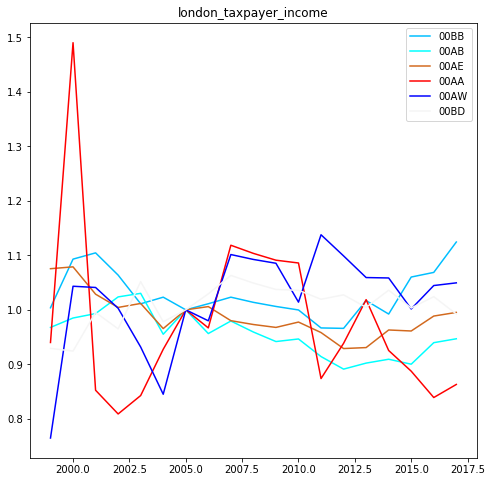

In [1305]:

fig,ax = plt.subplots(figsize=(8,8))
# index = (london_taxpayer_income['area_code']=='H')
# base = london_taxpayer_income[(london_taxpayer_income['year']==2005)&index]['median_income']
# ax.plot(london_taxpayer_income[index]['year'],london_taxpayer_income[index]['median_income']/list(base)[0],color=RGBs['H'],lw=5)


for code in list(df_income.loc[17][1:]):
    index = (london_taxpayer_income['area_code']==code)
#     base = london_taxpayer_income[(london_taxpayer_income['year']==2005)&index]['median_income']
    base = london_taxpayer_income[index]['median_income']*london_taxpayer_income[index]['year'].map(inflations)
    ax.plot(london_taxpayer_income[index]['year'],base/base.iloc[6],color=RGBs[code],label=code)
ax.legend(loc=0)
# ax.set_xlim(2005,2018)
ax.set_title('london_taxpayer_income')

In [529]:
uk_visits.head()

year        quarter   market    dur_stay mode  purpose              area  \
0  2002  January-March  Belgium  1-3 nights  Air  Holiday     TOTAL ENGLAND   
1  2002  January-March  Belgium  1-3 nights  Air  Holiday            LONDON   
2  2002  January-March  Belgium  1-3 nights  Air  Holiday   REST OF ENGLAND   
3  2002  January-March  Belgium  1-3 nights  Air  Holiday  SOUTHERN ENGLAND   
4  2002  January-March  Belgium  1-3 nights  Air  Holiday        SOUTH EAST   

     visits     spend    nights  sample  
0  4.431616  1.013484  9.530416       6  
1  3.572186  0.969138  6.954456       5  
2  0.859430  0.044346  2.575960       1  
3  0.859430  0.044346  2.575960       1  
4  0.859430  0.044346  2.575960       1

# london_underground_activity

In [191]:
london_underground_activity= pd.read_csv("datasets/London/london_underground_activity.csv")

london_underground_activity.loc[london_underground_activity['area']=='Richmond','area']='Richmond upon Thames'
london_underground_activity.loc[london_underground_activity['area']=='City of Westminster','area']='Westminster'

london_underground_activity = london_underground_activity[~london_underground_activity['area'].isnull()].reset_index(drop=True)

london_underground_station_info = pd.read_csv("datasets/London/london_underground_station_info.csv")
london_underground_station_info.loc[london_underground_station_info['local_authority']=='Richmond','local_authority']='Richmond upon Thames'
london_underground_station_info.loc[london_underground_station_info['local_authority']=='City of Westminster','local_authority']='Westminster'

london_underground = london_underground_activity.groupby(['year','area'])['weekday_entry', 'weekday_exit',
       'saturday_entry', 'saturday_exit', 'sunday_entry', 'sunday_exit',
       'annual_entry_and_exit'].agg('sum').reset_index()

london_underground['weekend'] = (london_underground['saturday_entry']+london_underground['saturday_exit']+london_underground['sunday_entry']+london_underground['sunday_exit'])/2
london_underground['weekday'] = london_underground['weekday_entry']+london_underground['weekday_exit']

london_underground = london_underground[london_underground['area'].isin(areas_boroughs_reverse)]

london_underground['area_code'] = london_underground['area'].map(areas_boroughs_reverse)

In [86]:
london_underground.head()

year                  area  weekday_entry  weekday_exit  saturday_entry  \
0  2007  Barking and Dagenham          37215       35548.0           24874   
1  2007                Barnet          73550       69337.0           49400   
2  2007                 Brent         126101      120759.0           94344   
3  2007                Camden         373473      377669.0          255139   
5  2007        City of London         327596      342181.0          102707   

   saturday_exit  sunday_entry  sunday_exit  annual_entry_and_exit   weekend  \
0          23552         16058        15346                  22.77   39915.0   
1          43152         31000        30597                  44.58   77074.5   
2          91462         64896        64783                  79.77  157742.5   
3         251977        180678       172411                 237.24  430102.5   
5         107995         70070        78745                 189.19  179758.5   

    weekday area_code  
0   72763.0      00AB  
1  142887.0      00AC  
2  246860.0      00AE  
3  751142.0      00AG  
5  669777.0      00AA

In [1016]:
london_underground[london_underground['annual_entry_and_exit']==london_underground['annual_entry_and_exit'].max()]

year         area  weekday_entry  weekday_exit  saturday_entry  \
247  2014  Westminster         997958     1025550.0          849193   

     saturday_exit  sunday_entry  sunday_exit  annual_entry_and_exit  \
247         869563        571172       555761                 667.81   

       weekend    weekday area_code  
247  1422844.5  2023508.0      00BK

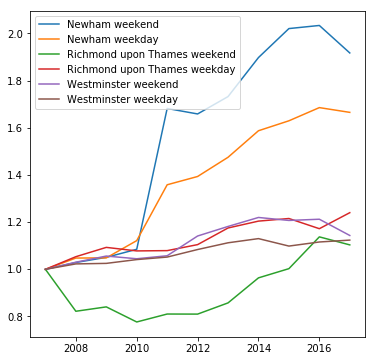

In [87]:
index = (london_underground['area']=='Newham')
plt.figure(figsize=(6,6))
plt.plot(london_underground[index]['year'],london_underground[index]['weekend']/london_underground[index]['weekend'].iloc[0],label='Newham weekend')
plt.plot(london_underground[index]['year'],london_underground[index]['weekday']/london_underground[index]['weekday'].iloc[0],label='Newham weekday')

t = "Richmond upon Thames"
index = (london_underground['area']==t)
plt.plot(london_underground[index]['year'],london_underground[index]['weekend']/london_underground[index]['weekend'].iloc[0],label=t+' weekend')
plt.plot(london_underground[index]['year'],london_underground[index]['weekday']/london_underground[index]['weekday'].iloc[0],label=t+' weekday')

t = "Westminster"
index = (london_underground['area']==t)
plt.plot(london_underground[index]['year'],london_underground[index]['weekend']/london_underground[index]['weekend'].iloc[0],label=t+' weekend')
plt.plot(london_underground[index]['year'],london_underground[index]['weekday']/london_underground[index]['weekday'].iloc[0],label=t+' weekday')


plt.legend(loc=0)

# london_earnings_by_borough

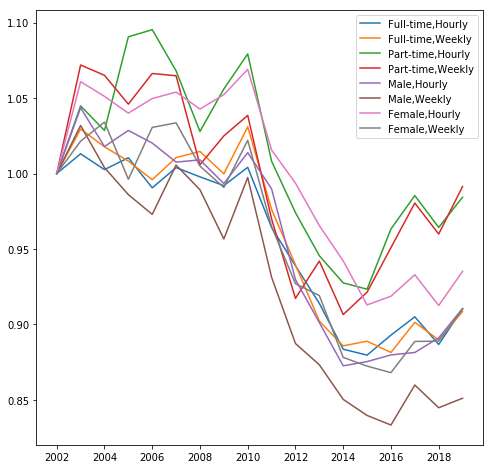

In [1488]:
# 针对不同类型的人的工资，将不同地区的求平均
df = london_earnings_by_borough.groupby(['year','identity','pay_type']).agg('median').reset_index()

fig,ax = plt.subplots(figsize=(8,8))
ax.set_xticks(range(2002,2020,2))

for identity in ['Full-time','Part-time','Male','Female']:
    for pay_type in ['Hourly','Weekly']:
        index = (df['pay_type']==pay_type) & (df['identity']==identity)
        ax.plot(df[index]['year'],\
                df[index]['pay']*df[index]['year'].map(inflations)/(df[index]['pay']*df[index]['year'].map(inflations)).iloc[0]\
                ,label="%s,%s"%(identity,pay_type))
ax.legend(loc=0)


In [1551]:
london_tickets_for_sale.head()

date         time gender                      session medal_ceremony  \
0  03-Aug  10:00–13:45      M        400m Hurdles: round 1            NaN   
1  03-Aug  10:00–13:45      M  3000m Steeplechase: round 1            NaN   
2  03-Aug  10:00–13:45      M           Hammer: qualifying            NaN   
3  03-Aug  10:00–13:45      M         Shot Put: qualifying            NaN   
4  03-Aug  10:00–13:45      W   100m: classification heats            NaN   

    code AA    A   B   C   D   E  limit                           venue  \
0  AT001  –  150  95  65  40  20   20.0  Olympic Park - Olympic Stadium   
1  AT001  –  150  95  65  40  20   20.0  Olympic Park - Olympic Stadium   
2  AT001  –  150  95  65  40  20   20.0  Olympic Park - Olympic Stadium   
3  AT001  –  150  95  65  40  20   20.0  Olympic Park - Olympic Stadium   
4  AT001  –  150  95  65  40  20   20.0  Olympic Park - Olympic Stadium   

       event  
0  Athletics  
1  Athletics  
2  Athletics  
3  Athletics  
4  Athletics

<BarContainer object of 30 artists>

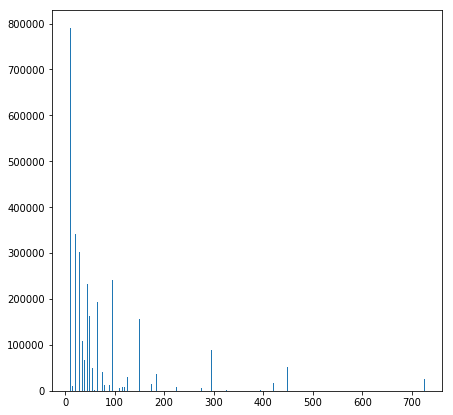

In [1565]:
t = london_ticket_sales[["price","number_sold"]].groupby("price")['number_sold'].sum().reset_index()
plt.figure(figsize=(7,7))
plt.bar(t['price'],t['number_sold'],width=2)

In [1230]:
london_earnings_normalized.columns

Index(['year', 'area_code', 'Female_Hourly', 'Female_Weekly',
       'Full-time_Hourly', 'Full-time_Weekly', 'Male_Hourly', 'Male_Weekly',
       'Part-time_Hourly', 'Part-time_Weekly', 'mean_income', 'median_income',
       'population'],
      dtype='object')

In [1234]:
df.head()

year  Female_Hourly  Female_Weekly  Full-time_Hourly  Full-time_Weekly  \
0  2002       1.000000       1.000000          1.000000          1.000000   
1  2003       1.040369       1.025407          1.018040          1.018685   
2  2004       1.039277       1.040534          1.017557          1.018883   
3  2005       1.059179       1.028160          1.029956          1.023031   
4  2006       1.048975       1.037618          1.018652          1.022605   

   Male_Hourly  Male_Weekly  Part-time_Hourly  Part-time_Weekly  mean_income  \
0     1.000000     1.000000          1.000000          1.000000     1.000000   
1     1.025145     1.017085          1.054519          1.039133     0.998297   
2     1.013039     1.011762          1.059817          1.069155     1.004820   
3     1.015174     1.003434          1.081210          1.059012     1.036099   
4     1.003554     0.997997          1.099374          1.075265     1.060736   

   median_income  population  
0       1.000000    1.000000  
1       0.998616    0.983947  
2       0.985634    1.079002  
3       1.005580    1.088421  
4       1.007523    1.106332

Text(0.5,1,'earnings,median of all boroughs')

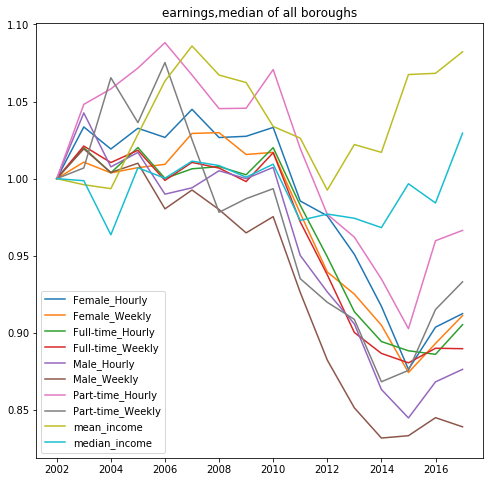

In [469]:
df = london_earnings_normalized[london_earnings_normalized['area_code'].isin(areas_boroughs)].groupby(['year'])['Female_Hourly', 'Female_Weekly',
       'Full-time_Hourly', 'Full-time_Weekly', 'Male_Hourly', 'Male_Weekly',
       'Part-time_Hourly', 'Part-time_Weekly', 'mean_income', 'median_income',
       'population'].agg('median').reset_index()

fig,ax = plt.subplots(figsize=(8,8))
ax.set_xticks(range(2002,2020,2))

for identity in london_earnings_normalized.columns[2:-1]:
    ax.plot(df['year'],df[identity],label=identity)
ax.legend(loc=0)

ax.set_title("earnings,median of all boroughs")

In [1411]:
# df = london_taxpayer_income.groupby(['year']).median().reset_index()
# df = df[df['year']>=2002]

# fig,ax = plt.subplots(figsize=(8,8))
# ax.set_xticks(range(2002,2020,2))

# for identity in df.columns[-2:]:
#     ax.plot(df['year'],df[identity]*df['year'].map(inflations)/(df[identity]*df['year'].map(inflations)).iloc[0],label=identity)
# ax.legend(loc=0)

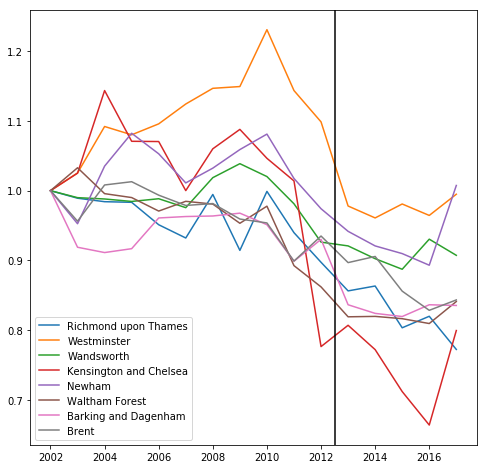

In [1641]:
fig,ax = plt.subplots(figsize=(8,8))
pay_type = "Hourly"
identity = "Full-time"
for area_code in rich_four:
    ax.plot(london_earnings_normalized[london_earnings_normalized["area_code"]==area_code]['year'],london_earnings_normalized[london_earnings_normalized["area_code"]==area_code][identity+"_"+pay_type],label=areas[area_code])

for area_code in poor_four:
    ax.plot(london_earnings_normalized[london_earnings_normalized["area_code"]==area_code]['year'],london_earnings_normalized[london_earnings_normalized["area_code"]==area_code][identity+"_"+pay_type],label=areas[area_code])

ax.legend(loc=0)
ax.axvline(2012.5,color='k')

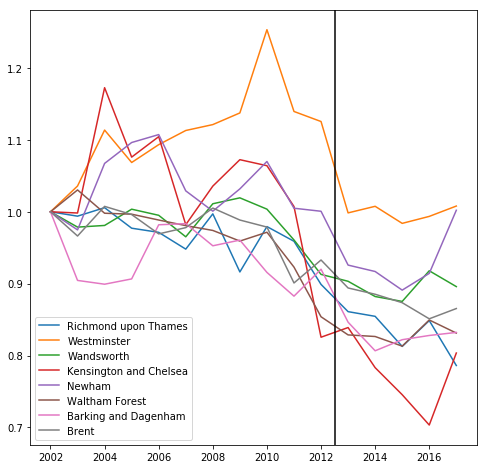

In [1640]:
fig,ax = plt.subplots(figsize=(8,8))
pay_type = "Weekly"
identity = "Full-time"
for area_code in rich_four:
    ax.plot(london_earnings_normalized[london_earnings_normalized["area_code"]==area_code]['year'],london_earnings_normalized[london_earnings_normalized["area_code"]==area_code][identity+"_"+pay_type],label=areas[area_code])

for area_code in poor_four:
    ax.plot(london_earnings_normalized[london_earnings_normalized["area_code"]==area_code]['year'],london_earnings_normalized[london_earnings_normalized["area_code"]==area_code][identity+"_"+pay_type],label=areas[area_code])

ax.legend(loc=0)
ax.axvline(2012.5,color='k')

In [1438]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [1441]:
london_earnings_normalized[london_earnings_normalized["area_code"]==code][identity+"_"+pay_type]

0     1.098145
1     1.137569
2     1.222990
3     1.173449
4     1.200725
5     1.222351
6     1.231358
7     1.249179
8     1.376342
9     1.251412
10    1.236045
11    1.096471
12    1.106539
13    1.080463
14    1.091119
15    1.106923
Name: Full-time_Weekly, dtype: float64

In [1480]:
pay_type = "Weekly"
identity = "Full-time"

date = np.array('2002', dtype=np.datetime64) + np.arange(len(london_earnings_normalized[london_earnings_normalized["area_code"]==code][identity+"_"+pay_type]))
t = pd.DataFrame({identity+"_"+pay_type:list(london_earnings_normalized[london_earnings_normalized["area_code"]==code][identity+"_"+pay_type])},index=date)
t2 = seasonal_decompose(t)

In [1482]:
uk_visits.head()

year  quarter   market    dur_stay mode  purpose              area  \
0  2002        0  Belgium  1-3 nights  Air  Holiday     TOTAL ENGLAND   
1  2002        0  Belgium  1-3 nights  Air  Holiday            LONDON   
2  2002        0  Belgium  1-3 nights  Air  Holiday   REST OF ENGLAND   
3  2002        0  Belgium  1-3 nights  Air  Holiday  SOUTHERN ENGLAND   
4  2002        0  Belgium  1-3 nights  Air  Holiday        SOUTH EAST   

     visits     spend    nights  sample  
0  4.431616  1.013484  9.530416       6  
1  3.572186  0.969138  6.954456       5  
2  0.859430  0.044346  2.575960       1  
3  0.859430  0.044346  2.575960       1  
4  0.859430  0.044346  2.575960       1

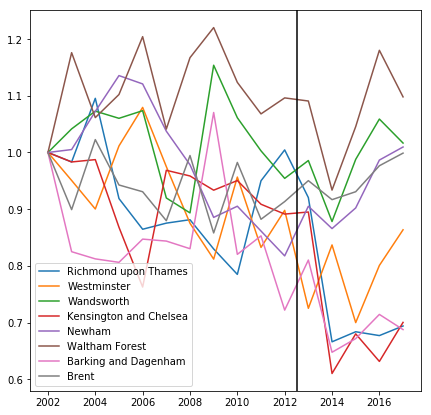

In [1638]:
fig,ax = plt.subplots(figsize=(7,7))
pay_type = "Weekly"
identity = "Part-time"
for area_code in rich_four:
    ax.plot(london_earnings_normalized[london_earnings_normalized["area_code"]==area_code]['year'],london_earnings_normalized[london_earnings_normalized["area_code"]==area_code][identity+"_"+pay_type],label=areas[area_code])

for area_code in poor_four:
    ax.plot(london_earnings_normalized[london_earnings_normalized["area_code"]==area_code]['year'],london_earnings_normalized[london_earnings_normalized["area_code"]==area_code][identity+"_"+pay_type],label=areas[area_code])

ax.legend(loc=0)
ax.axvline(2012.5,color='k')


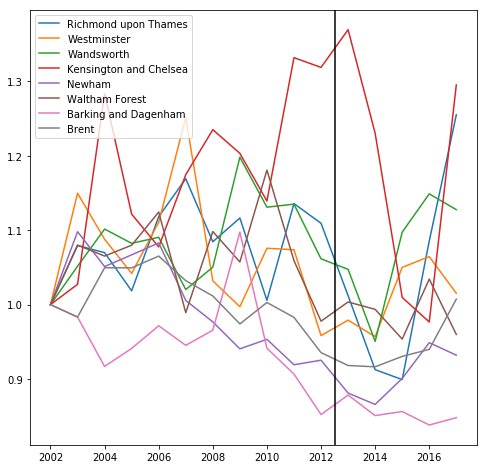

In [1637]:
fig,ax = plt.subplots(figsize=(8,8))
pay_type = "Hourly"
identity = "Part-time"
for area_code in rich_four:
    ax.plot(london_earnings_normalized[london_earnings_normalized["area_code"]==area_code]['year'],london_earnings_normalized[london_earnings_normalized["area_code"]==area_code][identity+"_"+pay_type],label=areas[area_code])

for area_code in poor_four:
    ax.plot(london_earnings_normalized[london_earnings_normalized["area_code"]==area_code]['year'],london_earnings_normalized[london_earnings_normalized["area_code"]==area_code][identity+"_"+pay_type],label=areas[area_code])

ax.legend(loc=0)
ax.axvline(2012.5,color='k')

Text(0.5,1,'median income')

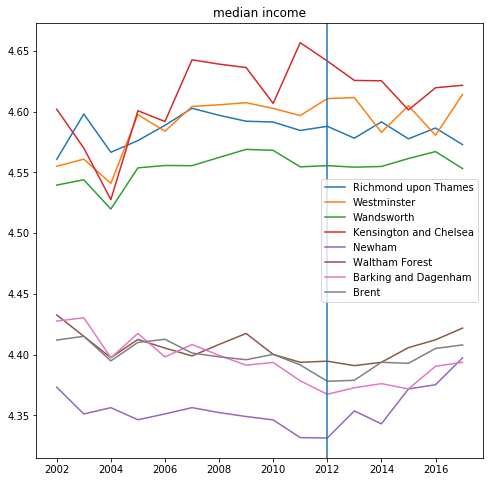

In [48]:
# 不同地区的median_income
# temp = london_taxpayer_income.groupby(["area_code","area"])['median_income'].median().reset_index().sort_values("median_income",ascending=False).reset_index(drop=True)

fig,ax = plt.subplots(figsize=(8,8))
for area_code in rich_four:
    ax.plot(london_taxpayer[london_taxpayer['area_code']==area_code]['year'].iloc[3:],\
            np.log10(london_taxpayer[london_taxpayer['area_code']==area_code]['median_income'].iloc[3:]),label=areas[area_code])

    
# for area_code in temp[temp["area_code"].apply(lambda x:len(x)==4)].iloc[-5:,0]:
for area_code in poor_four:
    ax.plot(london_taxpayer[london_taxpayer['area_code']==area_code]['year'].iloc[3:],\
            np.log10(london_taxpayer[london_taxpayer['area_code']==area_code]['median_income'].iloc[3:]),label=areas[area_code])

    
# for area_code in areas_regions:
#     plt.plot(london_taxpayer[london_taxpayer['area_code']==area_code]['year'].iloc[3:],london_taxpayer[london_taxpayer['area_code']==area_code]['median_income'].iloc[3:]/(london_taxpayer[london_taxpayer['area_code']==area_code]['median_income'].iloc[3]),label=areas[area_code])
    
ax.legend(loc=0)
ax.axvline(2012)
ax.set_title("median income")

# fig.savefig('medium_income_log.png', dpi=fig.dpi)

In [471]:
# set(areas_boroughs) - set(rich_four)-set(poor_four)

Text(0.5,1,'not rich, not poor')

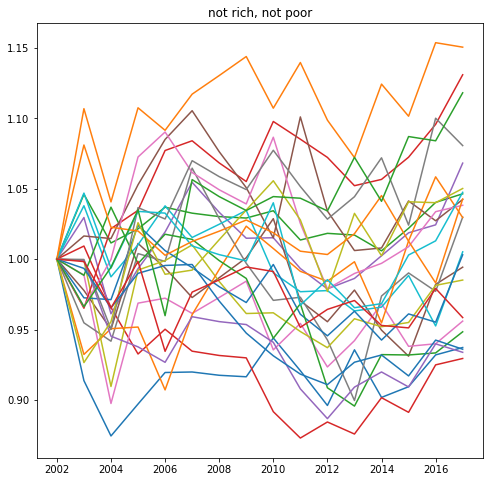

In [270]:
plt.figure(figsize=(8,8))
for area_code in set(areas_boroughs) - set(rich_four)-set(poor_four)-{"00AA"}:
    plt.plot(london_taxpayer_normalized[london_taxpayer_normalized['area_code']==area_code]['year'].iloc[3:],london_taxpayer_normalized[london_taxpayer_normalized['area_code']==area_code]['median_income'].iloc[3:],label=areas[area_code])

plt.title("not rich, not poor")

Text(0.5,1,'9 regions in England')

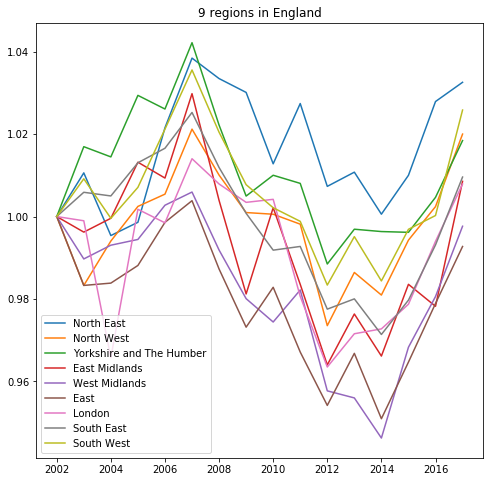

In [271]:
plt.figure(figsize=(8,8))
for area_code in areas_regions:
    plt.plot(london_taxpayer_normalized[london_taxpayer_normalized['area_code']==area_code]['year'].iloc[3:],london_taxpayer_normalized[london_taxpayer_normalized['area_code']==area_code]['median_income'].iloc[3:],label=areas[area_code])

plt.legend(loc=0)
plt.title("9 regions in England")

Text(0.5,1,'9 regions in England')

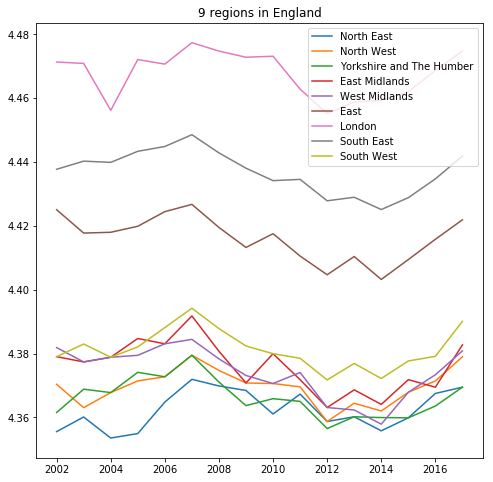

In [354]:
plt.figure(figsize=(8,8))
for area_code in areas_regions:
    plt.plot(london_taxpayer[london_taxpayer['area_code']==area_code]['year'].iloc[3:],np.log10(london_taxpayer[london_taxpayer['area_code']==area_code]['median_income'].iloc[3:]),label=areas[area_code])

plt.legend(loc=0)
plt.title("9 regions in England")

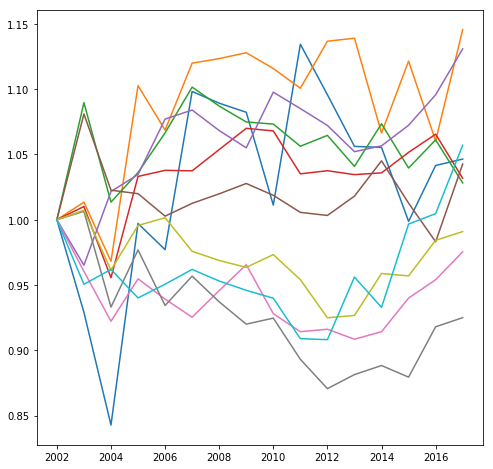

In [1571]:
fig,ax = plt.subplots(figsize=(8,8))

temp = london_taxpayer_income.groupby(["area_code","area"])['median_income'].median().reset_index().sort_values("median_income",ascending=False).reset_index(drop=True)


for code in temp.iloc[1:6,0]:
    if code!='00AA':
        ax.plot(london_earnings_normalized[london_earnings_normalized["area_code"]==code]['year'],london_earnings_normalized[london_earnings_normalized["area_code"]==code]["median_income"])   
    
for code in temp[temp["area_code"].apply(lambda x:len(x)==4)].iloc[-5:,0]:
    if code!='00AA':
        ax.plot(london_earnings_normalized[london_earnings_normalized["area_code"]==code]['year'],london_earnings_normalized[london_earnings_normalized["area_code"]==code]["median_income"])   
        
    

In [1406]:
london_earnings_normalized['population'].max()

1.7894736842105263

Text(0.5,1,'population')

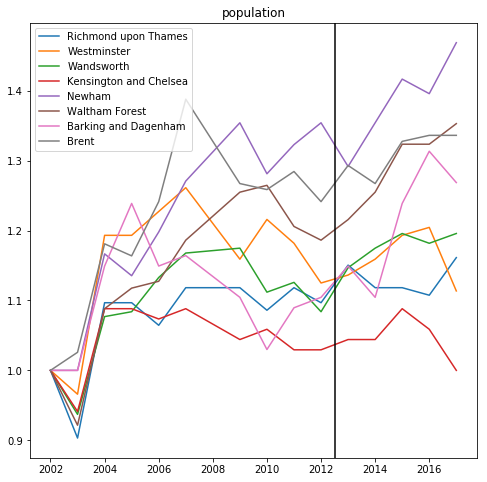

In [1639]:
fig,ax = plt.subplots(figsize=(8,8))
pay_type = "Weekly"
identity = "Full-time"
# for code in areas_boroughs:
#     if code!='00AA':
#         ax.plot(london_earnings_normalized[london_earnings_normalized["area_code"]==code]['year'],london_earnings_normalized[london_earnings_normalized["area_code"]==code]['population'])   

for area_code in rich_four:
    ax.plot(london_earnings_normalized[london_earnings_normalized["area_code"]==area_code]['year'],london_earnings_normalized[london_earnings_normalized["area_code"]==area_code]['population'],label=areas[area_code])

for area_code in poor_four:
    ax.plot(london_earnings_normalized[london_earnings_normalized["area_code"]==area_code]['year'],london_earnings_normalized[london_earnings_normalized["area_code"]==area_code]['population'],label=areas[area_code])

ax.legend(loc=0)
ax.axvline(2012.5,color='k')
        
ax.set_title('population')    

In [123]:
london_taxpayer.iloc[-1]

year                   2017
area_code                 K
area             South West
population          2740000
mean_income         32426.8
median_income       24553.2
Name: 755, dtype: object

Text(0.5,1,'median income')

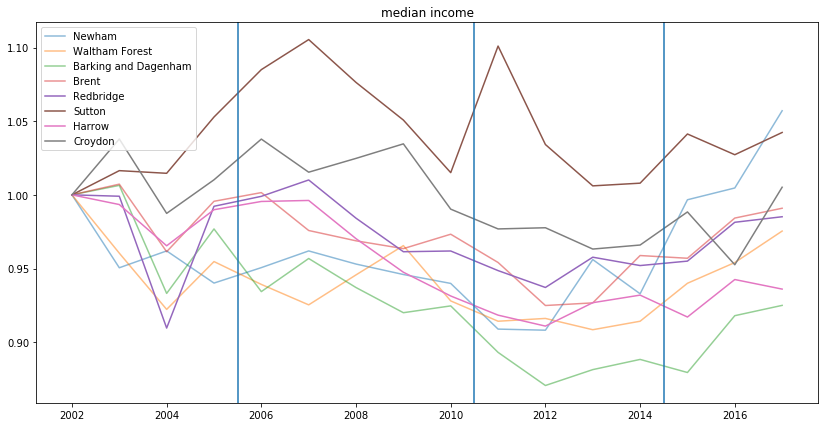

In [162]:
# 不同地区的median_income
temp = london_taxpayer_income.groupby(["area_code","area"])['median_income'].median().reset_index().sort_values("median_income",ascending=False).reset_index(drop=True)

plt.figure(figsize=(14,7))
# for area_code in rich_four:
#     plt.plot(london_taxpayer_normalized[london_taxpayer_normalized['area_code']==area_code]['year'].iloc[3:],london_taxpayer_normalized[london_taxpayer_normalized['area_code']==area_code]['median_income'].iloc[3:],label=areas[area_code])

    
# for area_code in temp[temp["area_code"].apply(lambda x:len(x)==4)].iloc[-5:,0]:
for area_code in poor_four:
    plt.plot(london_taxpayer_normalized[london_taxpayer_normalized['area_code']==area_code]['year'].iloc[3:],london_taxpayer_normalized[london_taxpayer_normalized['area_code']==area_code]['median_income'].iloc[3:],label=areas[area_code],alpha=0.5)

    
for area_code in control_four:
    plt.plot(london_taxpayer_normalized[london_taxpayer_normalized['area_code']==area_code]['year'].iloc[3:],london_taxpayer_normalized[london_taxpayer_normalized['area_code']==area_code]['median_income'].iloc[3:],label=areas[area_code])
    
plt.legend(loc=0)
plt.axvline(2005.5)

plt.axvline(2010.5)

plt.axvline(2014.5)

plt.title("median income")

In [245]:
london_taxpayer_normalized.head()

year area_code            area  population  mean_income  median_income
0  1999      00AA  City of London       10000     1.484837       1.162066
1  2000      00AA  City of London       10000     1.825286       1.842030
2  2001      00AA  City of London       12000     1.201680       1.053768
3  2002      00AA  City of London       11000     1.000000       1.000000
4  2003      00AA  City of London       10000     1.071992       1.041750

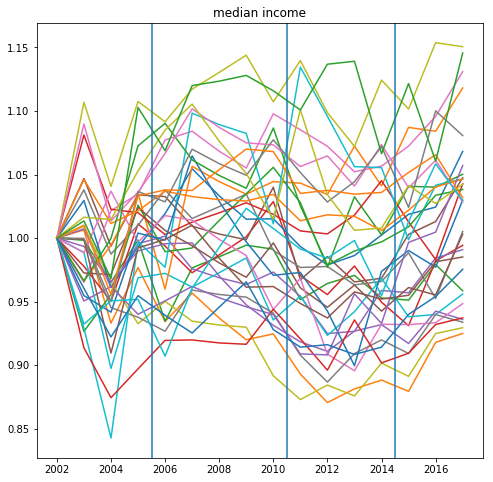

In [613]:
fig,ax = plt.subplots(figsize=(8,8))
for area_code in areas_boroughs:
    ax.plot(london_taxpayer_normalized[london_taxpayer_normalized['area_code']==area_code]['year'].iloc[3:],london_taxpayer_normalized[london_taxpayer_normalized['area_code']==area_code]['median_income'].iloc[3:],label=areas[area_code])

    
# for area_code in poor_four:
#     ax.plot(london_taxpayer_normalized[london_taxpayer_normalized['area_code']==area_code]['year'].iloc[3:],london_taxpayer_normalized[london_taxpayer_normalized['area_code']==area_code]['median_income'].iloc[3:],label=areas[area_code])

# ax.legend(loc=0)
ax.set_title("median income")


ax.axvline(2005.5)

ax.axvline(2010.5)

ax.axvline(2014.5)

# fig.savefig('medium_income_normalized.png', dpi=fig.dpi)

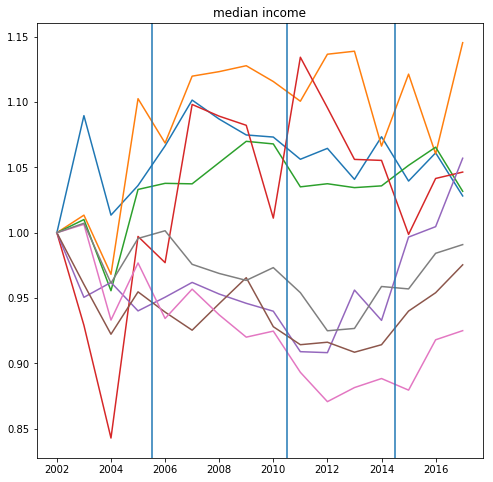

In [72]:
fig,ax = plt.subplots(figsize=(8,8))
for area_code in rich_four:
    ax.plot(london_taxpayer_normalized[london_taxpayer_normalized['area_code']==area_code]['year'].iloc[3:],london_taxpayer_normalized[london_taxpayer_normalized['area_code']==area_code]['median_income'].iloc[3:],label=areas[area_code])

    
for area_code in poor_four:
    ax.plot(london_taxpayer_normalized[london_taxpayer_normalized['area_code']==area_code]['year'].iloc[3:],london_taxpayer_normalized[london_taxpayer_normalized['area_code']==area_code]['median_income'].iloc[3:],label=areas[area_code])

# ax.legend(loc=0)
ax.set_title("median income")


ax.axvline(2005.5)

ax.axvline(2010.5)

ax.axvline(2014.5)

# fig.savefig('medium_income_normalized.png', dpi=fig.dpi)

In [172]:
london_taxpayer_before = london_taxpayer_normalized[london_taxpayer_normalized['year']<=2008]

Text(0.5,1,'median income')

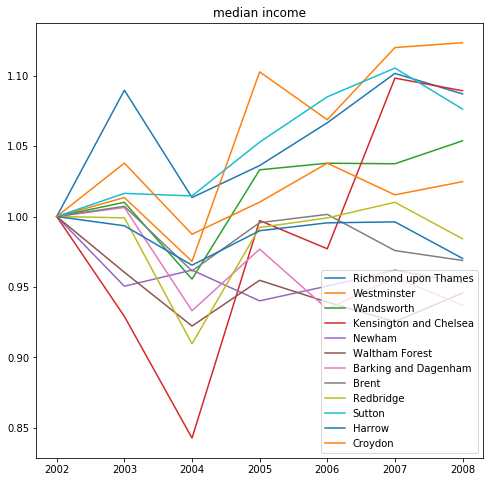

In [173]:
fig,ax = plt.subplots(figsize=(8,8))
for area_code in rich_four:
    ax.plot(london_taxpayer_before[london_taxpayer_before['area_code']==area_code]['year'].iloc[3:],london_taxpayer_before[london_taxpayer_before['area_code']==area_code]['median_income'].iloc[3:],label=areas[area_code])

    
for area_code in poor_four:
    ax.plot(london_taxpayer_before[london_taxpayer_before['area_code']==area_code]['year'].iloc[3:],london_taxpayer_before[london_taxpayer_before['area_code']==area_code]['median_income'].iloc[3:],label=areas[area_code])

# ax.legend(loc=0)

for area_code in control_four:
    ax.plot(london_taxpayer_before[london_taxpayer_before['area_code']==area_code]['year'].iloc[3:],london_taxpayer_before[london_taxpayer_before['area_code']==area_code]['median_income'].iloc[3:],label=areas[area_code])


ax.legend(loc=0)

ax.set_title("median income")


In [174]:
london_economic_before = london_economic_activity[(london_economic_activity['year']<=2008)&\
                                                  (london_economic_activity['year']>=2002)&\
                                                  (london_economic_activity['area_code'].isin(areas_boroughs))&\
                                                 (london_economic_activity['area_code']!="00AA")].reset_index(drop=True)

In [176]:
london_economic_before.head()

year area_code                  area gender  economically_active  \
0  2005      00AB  Barking and Dagenham      F              32200.0   
1  2006      00AB  Barking and Dagenham      F              32700.0   
2  2007      00AB  Barking and Dagenham      F              33600.0   
3  2008      00AB  Barking and Dagenham      F              34400.0   
4  2005      00AC                Barnet      F              74500.0   

   working_age  percent  confidence  
0      54100.0     59.5         5.5  
1      53800.0     60.8         5.4  
2      54200.0     62.0         5.4  
3      55900.0     61.6         5.1  
4     110200.0     67.7         5.9

In [193]:
london_earnings.head()

year area_code  Female_Hourly  Female_Weekly  Full-time_Hourly  \
0  2002      00AB      13.242693     458.534137         17.289508   
1  2002      00AC      14.959046     486.247739         20.627738   
2  2002      00AD      14.486655     484.515639         18.423247   
3  2002      00AE      14.644119     520.259886         17.163537   
4  2002      00AF      16.533683     544.036897         20.942665   

   Full-time_Weekly  Male_Hourly  Male_Weekly  Part-time_Hourly  \
0        692.052724    18.108319   738.347036         10.896484   
1        785.901057    21.257592   819.125886         11.967237   
2        731.576099    19.053101   776.453238         10.864992   
3        674.574259    15.746365   648.592758          9.605282   
4        796.923512    23.304620   904.156255         12.439628   

   Part-time_Weekly   mean_income  median_income  population  \
0        241.549233  30075.556377   26768.819812       67000   
1        216.040122  50860.757643   31020.338253      150000   
2        207.852013  33854.683880   28028.528980      114000   
3        185.964566  34169.611172   25824.037936      116000   
4        196.672094  43617.429929   31650.192837      160000   

   economically_active_F  economically_active_M  working_age_F  working_age_M  
0                    NaN                    NaN            NaN            NaN  
1                    NaN                    NaN            NaN            NaN  
2                    NaN                    NaN            NaN            NaN  
3                    NaN                    NaN            NaN            NaN  
4                    NaN                    NaN            NaN            NaN

In [195]:
london_combine['year'].unique()

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017])

In [261]:
london_combine.to_csv("london_combine.csv")

In [262]:
london_combine['area_code'].unique()

array(['00AB', '00AC', '00AD', '00AE', '00AF', '00AG', '00AH', '00AJ',
       '00AK', '00AL', '00AM', '00AN', '00AP', '00AQ', '00AR', '00AS',
       '00AT', '00AU', '00AW', '00AX', '00AY', '00AZ', '00BA', '00BB',
       '00BC', '00BD', '00BE', '00BF', '00BG', '00BH', '00BJ', '00BK',
       '922', '923', '924', '926', '941', 'A', 'B', 'D', 'E', 'F', 'G',
       'H', 'J', 'K', '00AA'], dtype=object)

In [614]:
from sklearn.feature_selection import SelectKBest, chi2

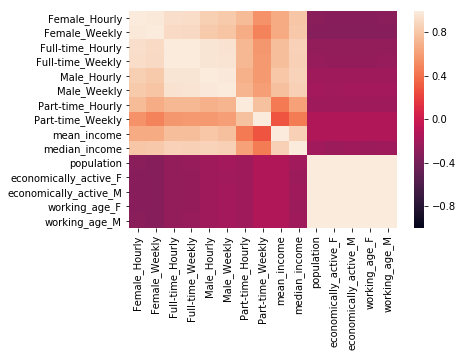

In [198]:
sns.heatmap((london_combine.iloc[:,2:]).corr(),vmin=-1,vmax=1)

In [832]:
london_taxpayer_normalized.head()

year area_code                  area  population  mean_income  \
0  1999      00AB  Barking and Dagenham       62000     0.902678   
1  2000      00AB  Barking and Dagenham       71000     0.993643   
2  2001      00AB  Barking and Dagenham       56000     0.991351   
3  2002      00AB  Barking and Dagenham       67000     1.000000   
4  2003      00AB  Barking and Dagenham       67000     0.967840   

   median_income  
0       0.945320  
1       0.962190  
2       0.970094  
3       1.000000  
4       1.006420

In [1234]:
london_earnings.head()

year area_code  Female_Hourly  Female_Weekly  Full-time_Hourly  \
0  2002      00AB      13.242693     458.534137         17.289508   
1  2002      00AC      14.959046     486.247739         20.627738   
2  2002      00AD      14.486655     484.515639         18.423247   
3  2002      00AE      14.644119     520.259886         17.163537   
4  2002      00AF      16.533683     544.036897         20.942665   

   Full-time_Weekly  Male_Hourly  Male_Weekly  Part-time_Hourly  \
0        692.052724    18.108319   738.347036         10.896484   
1        785.901057    21.257592   819.125886         11.967237   
2        731.576099    19.053101   776.453238         10.864992   
3        674.574259    15.746365   648.592758          9.605282   
4        796.923512    23.304620   904.156255         12.439628   

   Part-time_Weekly   mean_income  median_income  population  \
0        241.549233  30075.556377   26768.819812       67000   
1        216.040122  50860.757643   31020.338253      150000   
2        207.852013  33854.683880   28028.528980      114000   
3        185.964566  34169.611172   25824.037936      116000   
4        196.672094  43617.429929   31650.192837      160000   

   economically_active_F  economically_active_M  working_age_F  working_age_M  
0                    NaN                    NaN            NaN            NaN  
1                    NaN                    NaN            NaN            NaN  
2                    NaN                    NaN            NaN            NaN  
3                    NaN                    NaN            NaN            NaN  
4                    NaN                    NaN            NaN            NaN

In [516]:
london_combine = london_earnings[london_earnings['year']>=2005]

london_combine_normalized = pd.DataFrame()

for area_code in london_combine['area_code'].unique():
    temp = london_combine[london_combine['area_code'] == area_code].reset_index(drop=True)
    temp = pd.concat([temp.iloc[:,:2],temp.iloc[:,2:].divide(temp.iloc[0,2:])-1],axis=1)
    london_combine_normalized = london_combine_normalized.append(temp) 

london_combine_normalized = london_combine_normalized[london_combine_normalized['area_code']!='00AA'].reset_index(drop=True)


In [392]:
london_combine_normalized['area_code'].unique()

array(['00AB', '00AC', '00AD', '00AE', '00AF', '00AG', '00AH', '00AJ',
       '00AK', '00AL', '00AM', '00AN', '00AP', '00AQ', '00AR', '00AS',
       '00AT', '00AU', '00AW', '00AX', '00AY', '00AZ', '00BA', '00BB',
       '00BC', '00BD', '00BE', '00BF', '00BG', '00BH', '00BJ', '00BK',
       '922', '923', '924', '926', '941', 'A', 'B', 'D', 'E', 'F', 'G',
       'H', 'J', 'K'], dtype=object)

In [265]:
london_combine_normalized.to_csv("london_combine_normalized.csv")

In [670]:
# london_combine_rich = london_combine_normalized[london_combine_normalized['area_code'].isin(rich_four)].reset_index(drop=True)
# london_combine_control = london_combine_normalized[london_combine_normalized['area_code'].isin(control_four)].reset_index(drop=True)


london_combine_rich = london_combine_normalized[london_combine_normalized['area_code'].isin(areas_boroughs)].reset_index(drop=True)

# london_combine_control = london_combine_normalized[london_combine_normalized['area_code'].isin(["922","923","924"])].reset_index(drop=True)

london_combine_control = london_combine_normalized[london_combine_normalized['area_code'].isin(control_four)].reset_index(drop=True)



In [381]:
london_combine_rich.head()

year area_code  Female_Hourly  Female_Weekly  Full-time_Hourly  \
0  2005      00AB       1.000000       1.000000          1.000000   
1  2006      00AB       0.985141       0.997744          1.048073   
2  2007      00AB       0.986581       1.017878          1.050325   
3  2008      00AB       1.017784       1.029690          1.051169   
4  2009      00AB       1.032086       0.979201          1.055590   

   Full-time_Weekly  Male_Hourly  Male_Weekly  Part-time_Hourly  \
0          1.000000     1.000000     1.000000          1.000000   
1          1.083062     1.107766     1.126019          1.032348   
2          1.084812     1.097609     1.120893          1.004365   
3          1.050820     1.072116     1.093652          1.026040   
4          1.059568     1.117613     1.092373          1.166067   

   Part-time_Weekly  mean_income  median_income  population  \
0          1.000000     1.000000       1.000000    1.000000   
1          1.050846     0.972763       0.956459    0.927711   
2          1.046547     0.974630       0.979461    0.939759   
3          1.029842     0.973932       0.959276    0.915663   
4          1.327915     0.974438       0.941799    0.891566   

   economically_active_F  economically_active_M  working_age_F  working_age_M  
0               1.000000               1.000000       1.000000       1.000000  
1               1.015528               0.982587       0.994455       1.005894  
2               1.043478               1.069652       1.001848       1.015717  
3               1.068323               1.049751       1.033272       1.031434  
4               1.096273               1.079602       1.046211       1.060904

In [674]:
london_construct = pd.DataFrame()
# for i in range(len(rich_four)):
#     for j in range(len(poor_four)):
for code1 in london_combine_rich['area_code'].unique():
    for code2 in london_combine_control['area_code'].unique():
#         code1,code2 = rich_four[i],control_four[j]
        temp = london_combine_rich[london_combine_rich['area_code']==code1].iloc[:4,2:].reset_index(drop=True) -\
        london_combine_control[london_combine_control['area_code']==code2].iloc[:4,2:].reset_index(drop=True)
        london_construct = london_construct.append(temp)

# london_construct = london_construct.reset_index(drop=True)
london_construct= london_construct.drop_duplicates().reset_index(drop=True)

In [675]:
# london_construct

In [676]:
lr = LR()
london_construct_y = pd.DataFrame(np.random.normal(0,0.1,len(london_construct)))
lr.fit(london_construct,london_construct_y)

lr.score(london_construct,london_construct_y)

0.023160506841602646

In [619]:
# london_construct_2 = SelectKBest(chi2, k=10).fit_transform(london_construct, london_construct_y)

In [615]:
london_construct.head()

Female_Hourly  Female_Weekly  Full-time_Hourly  Full-time_Weekly  \
0       0.000000       0.000000          0.000000          0.000000   
1      -0.044873      -0.033079         -0.009353         -0.021127   
2       0.054310       0.019013          0.043051          0.030364   
3       0.010989      -0.093627          0.101453          0.077240   
4      -0.044587      -0.047090         -0.006599         -0.020403   

   Male_Hourly  Male_Weekly  Part-time_Hourly  Part-time_Weekly  mean_income  \
0     0.000000     0.000000          0.000000          0.000000     0.000000   
1     0.090764     0.069632          0.021379         -0.033610     0.018038   
2     0.119316     0.063700          0.263479         -0.156142     0.133391   
3     0.132695     0.065313         -0.029640         -0.265469     0.109845   
4     0.073044     0.045037         -0.022177         -0.091654     0.012272   

   median_income  population  economically_active_F  economically_active_M  \
0       0.000000    0.000000               0.000000               0.000000   
1       0.025509    0.025713              -0.021718               0.041521   
2       0.022170    0.066870              -0.012202              -0.007313   
3       0.035055    0.092157              -0.042500               0.009563   
4       0.021735    0.022369              -0.009802               0.031416   

   working_age_F  working_age_M  
0       0.000000       0.000000  
1      -0.017733      -0.012633  
2      -0.017366      -0.022768  
3      -0.033310      -0.039540  
4      -0.010810      -0.006875

In [677]:
regr = RandomForestRegressor(n_estimators=100,max_depth=15)
regr.fit(london_construct,london_construct_y)
regr.score(london_construct,london_construct_y)

/Users/myzone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8298086059254306

In [533]:
# regr.predict(london_construct)

In [528]:
# london_combine_normalized

In [527]:
# regr.predict(london_combine_normalized.iloc[:,2:])

In [678]:
X_construct = pd.concat([london_combine_normalized.iloc[:,:2],pd.DataFrame(regr.predict(london_combine_normalized.iloc[:,2:]))],axis=1)
X_construct.columns = ['year','area_code','Y_fun']
    

In [679]:
X_construct.head()

year area_code     Y_fun
0  2005      00AB -0.017554
1  2006      00AB -0.022942
2  2007      00AB  0.006133
3  2008      00AB  0.002968
4  2009      00AB -0.012592

In [830]:
# fig,ax = plt.subplots(figsize=(8,8))
# for area_code in ["922","923","924"]:
# #     ax.plot(london_combine_normalized[london_combine_normalized['area_code']==area_code]['year'],london_combine_normalized[london_combine_normalized['area_code']==area_code]['median_income'],label=areas[area_code])
#     ax.plot(X_construct[X_construct['area_code']==area_code]['year'],X_construct[X_construct['area_code']==area_code]['Y_fun'],label=areas[area_code])

    
# for area_code in set(areas_boroughs)-{"00AA"}:
#     ax.plot(X_construct[X_construct['area_code']==area_code]['year'],X_construct[X_construct['area_code']==area_code]['Y_fun'],label=areas[area_code])

# ax.legend(loc=0)
# ax.set_title("median income")

# ax.axvline(2008.5)

# ax.axvline(2011.5)

# ax.axvline(2014.5)

# ax.set_xlim(2004,2009)

In [694]:
london_combine_normalized.columns

Index(['year', 'area_code', 'Female_Hourly', 'Female_Weekly',
       'Full-time_Hourly', 'Full-time_Weekly', 'Male_Hourly', 'Male_Weekly',
       'Part-time_Hourly', 'Part-time_Weekly', 'mean_income', 'median_income',
       'population', 'economically_active_F', 'economically_active_M',
       'working_age_F', 'working_age_M'],
      dtype='object')

In [702]:
london_combine_normalized['activity_F'] = (1+london_combine_normalized['economically_active_F'])/(1+london_combine_normalized['working_age_F'])
london_combine_normalized['activity_M'] = (1+london_combine_normalized['economically_active_M'])/(1+london_combine_normalized['working_age_M'])



In [ ]:
'economically_active_F', 'economically_active_M',
       'working_age_F', 'working_age_M'

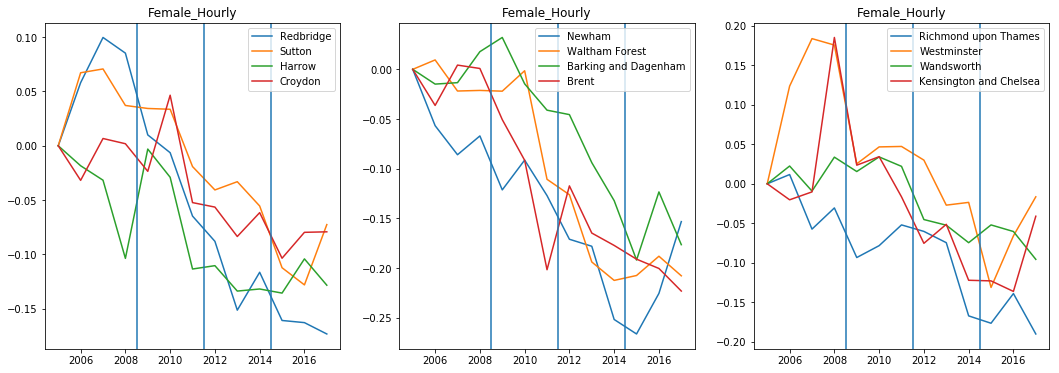

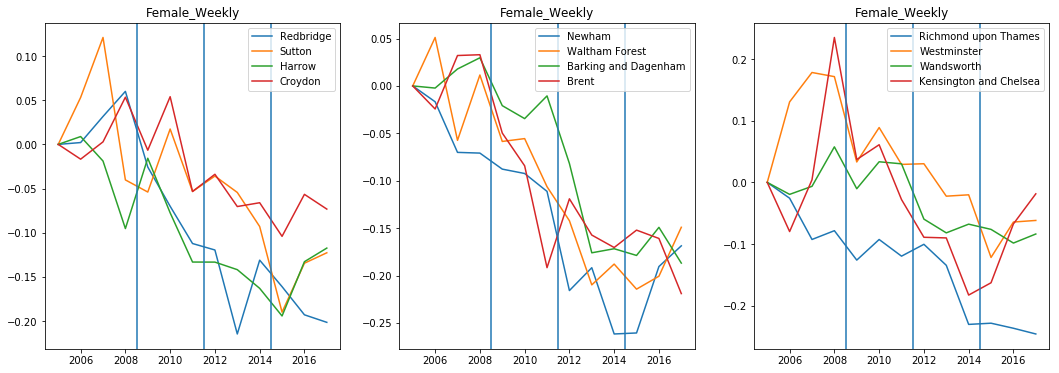

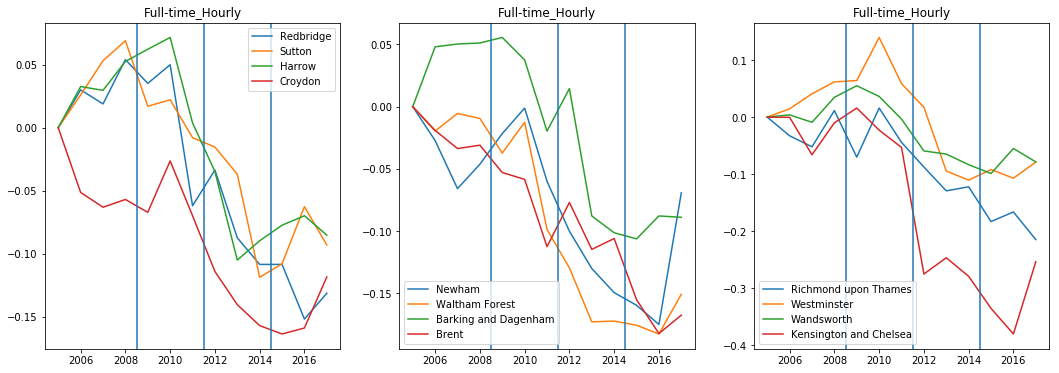

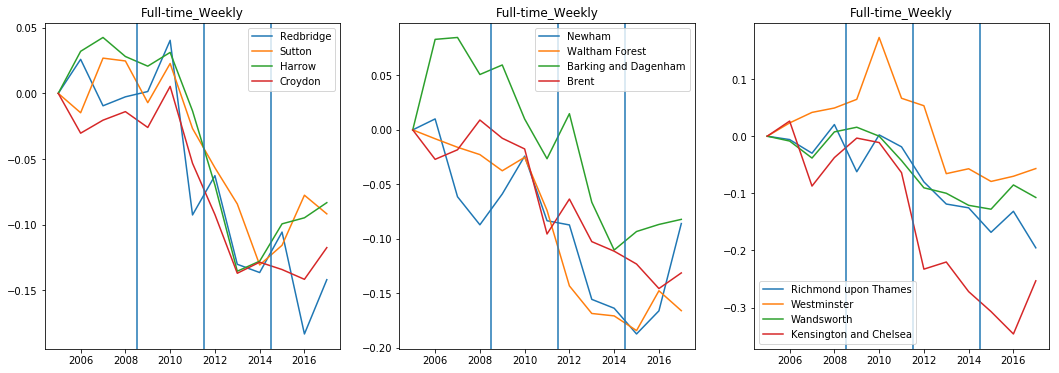

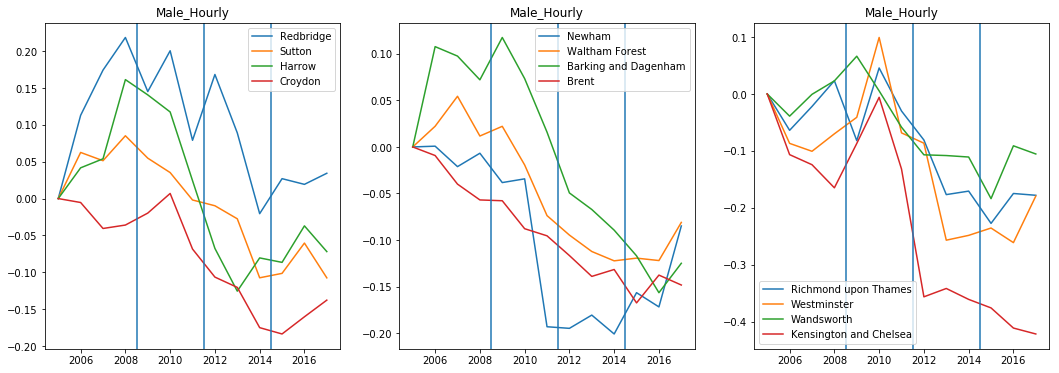

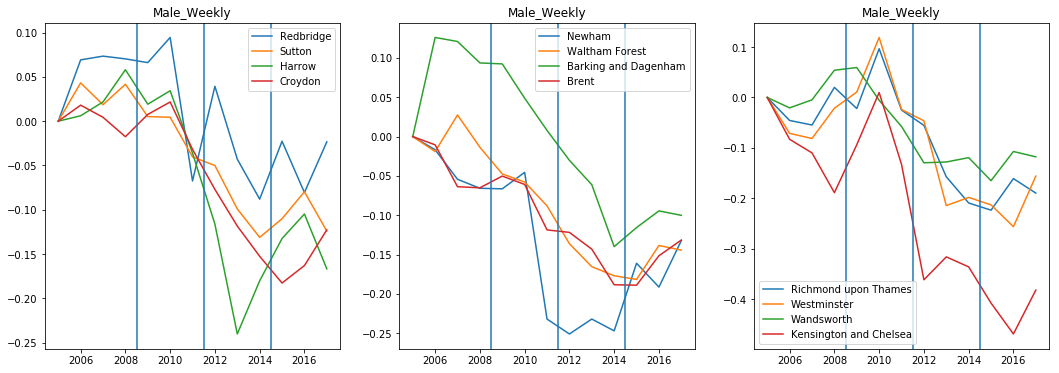

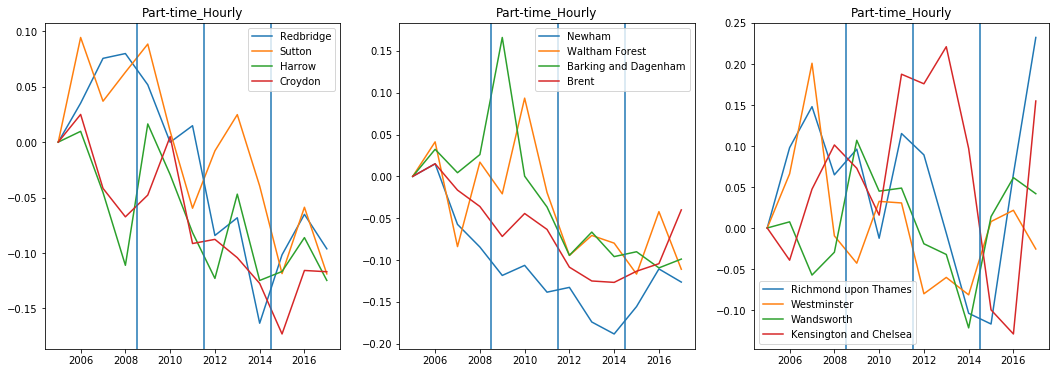

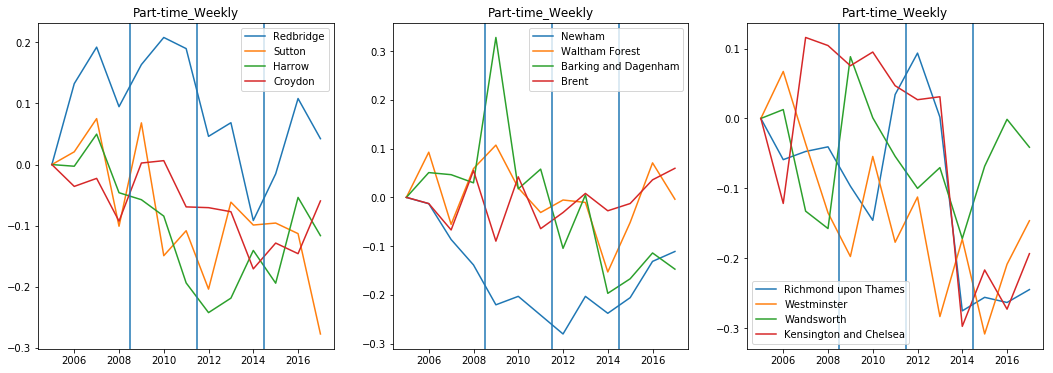

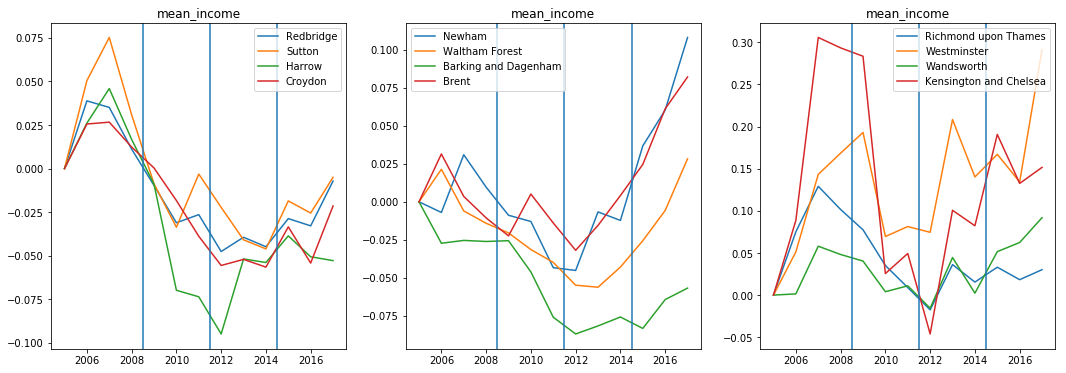

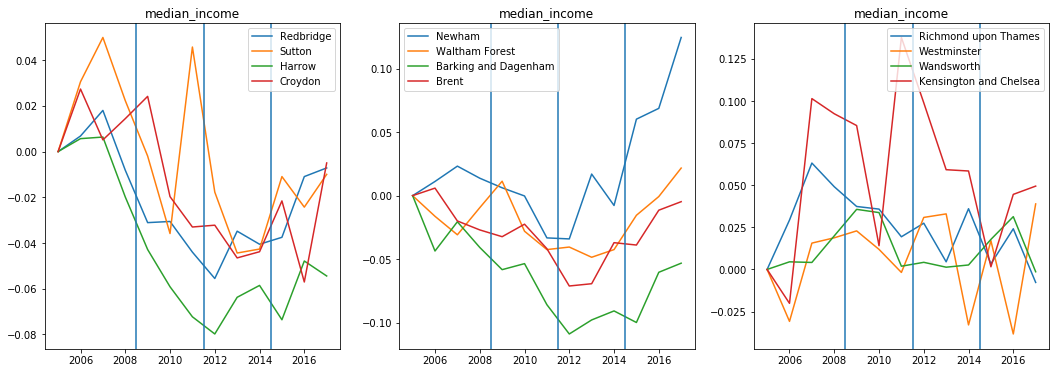

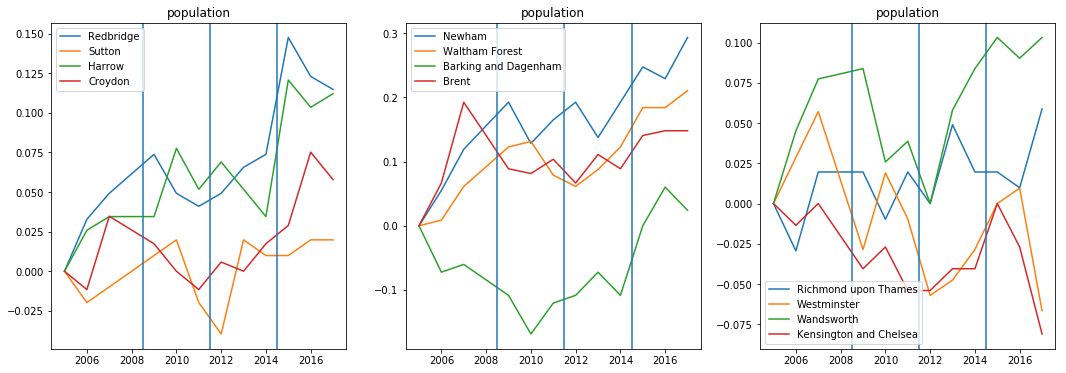

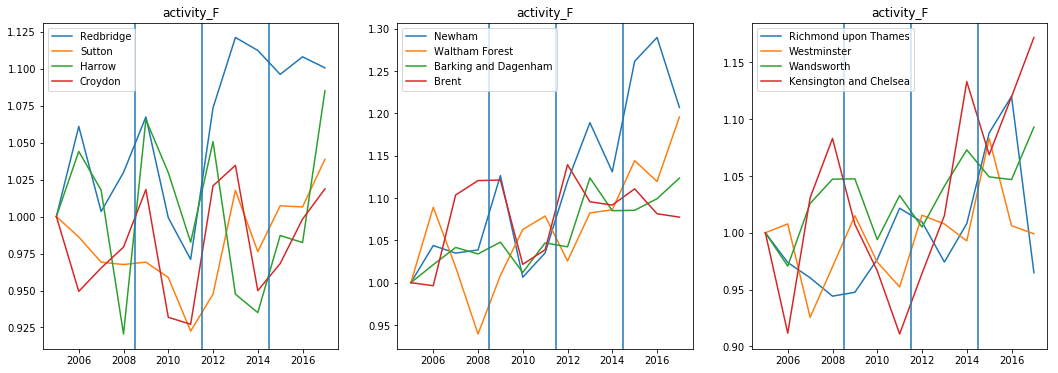

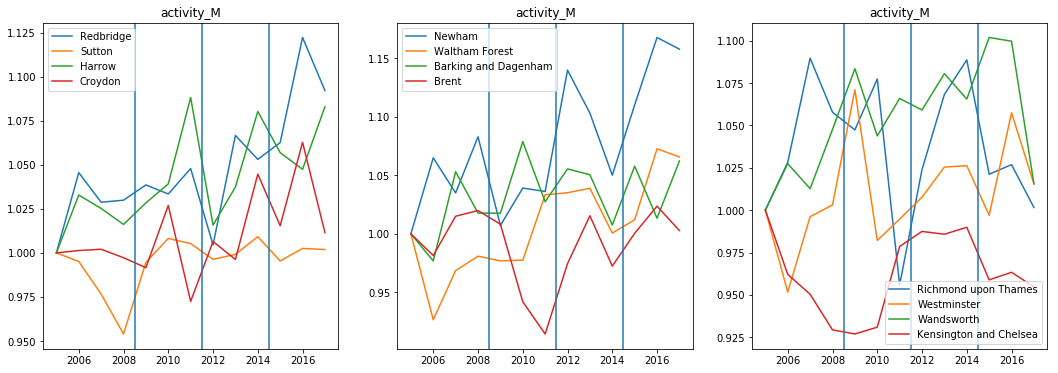

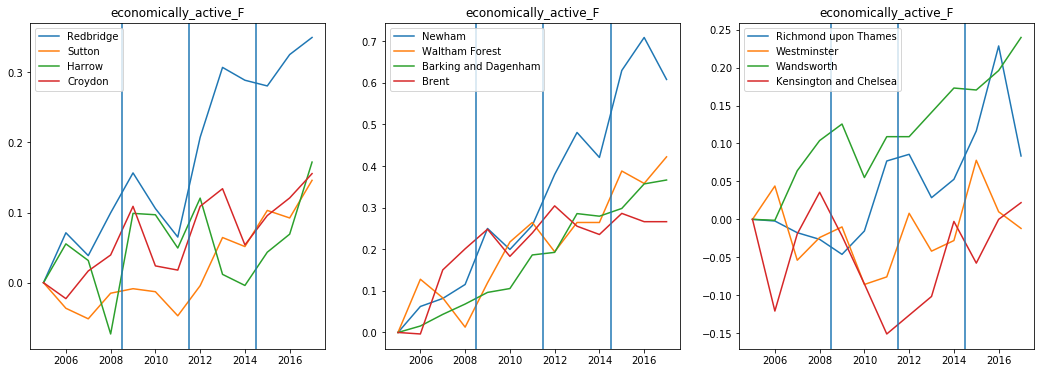

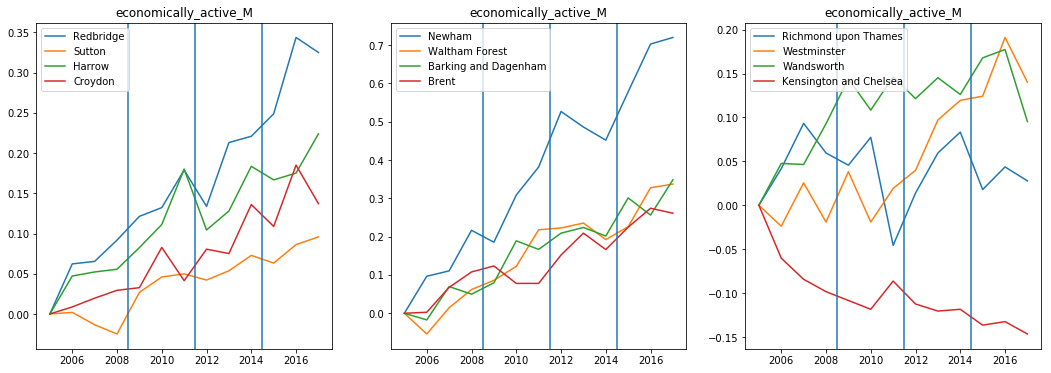

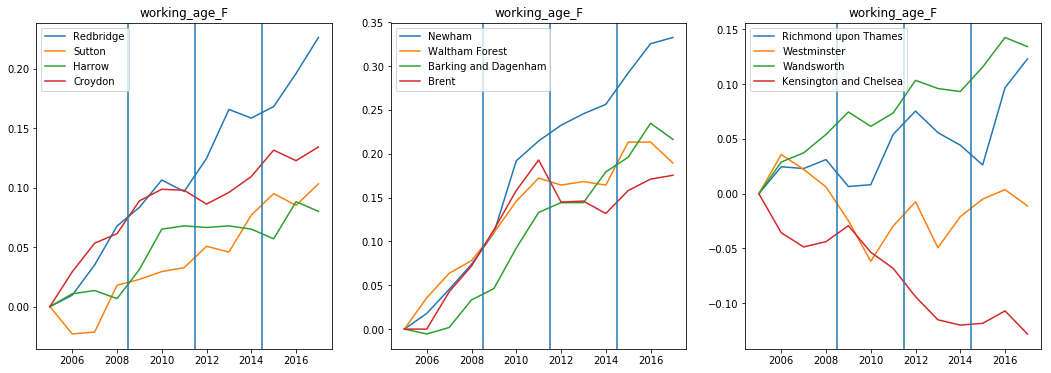

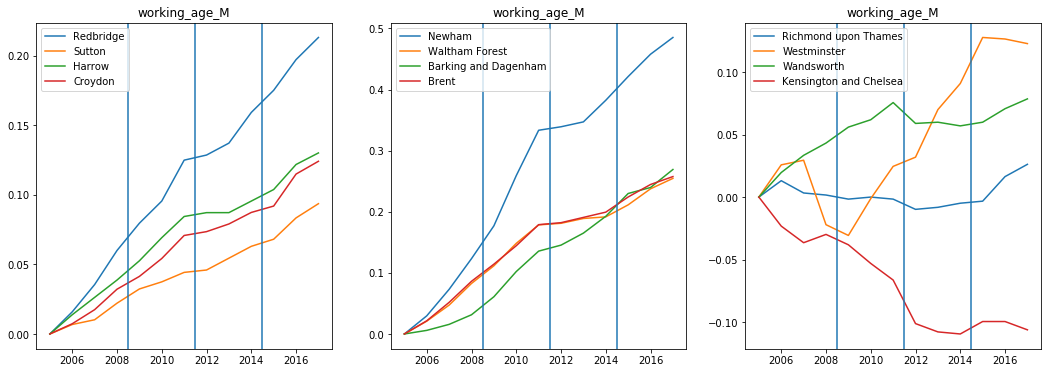

In [704]:


# for area_code in ["922","923","924"]:
#     ax.plot(london_combine_normalized[london_combine_normalized['area_code']==area_code]['year'],london_combine_normalized[london_combine_normalized['area_code']==area_code]['median_income'],label=areas[area_code])

col = "Female_Hourly"

for col in ['Female_Hourly', 'Female_Weekly',
       'Full-time_Hourly', 'Full-time_Weekly', 'Male_Hourly', 'Male_Weekly',
       'Part-time_Hourly', 'Part-time_Weekly', 'mean_income', 'median_income',
       'population','activity_F','activity_M','economically_active_F', 'economically_active_M',
       'working_age_F', 'working_age_M' ]:
    fig,(ax,ax2,ax3) = plt.subplots(1,3,figsize=(18,6))   
    for area_code in control_four:
        ax.plot(london_combine_normalized[london_combine_normalized['area_code']==area_code]['year'],london_combine_normalized[london_combine_normalized['area_code']==area_code][col],label=areas[area_code])



    ax.legend(loc=0)
    ax.set_title(col)


    ax.axvline(2008.5)

    ax.axvline(2011.5)

    ax.axvline(2014.5)

    for area_code in poor_four:
        ax2.plot(london_combine_normalized[london_combine_normalized['area_code']==area_code]['year'],london_combine_normalized[london_combine_normalized['area_code']==area_code][col],label=areas[area_code])

    ax2.legend(loc=0)
    ax2.set_title(col)


    ax2.axvline(2008.5)

    ax2.axvline(2011.5)

    ax2.axvline(2014.5)

    for area_code in rich_four:
        ax3.plot(london_combine_normalized[london_combine_normalized['area_code']==area_code]['year'],london_combine_normalized[london_combine_normalized['area_code']==area_code][col],label=areas[area_code])

    ax3.legend(loc=0)
    ax3.set_title(col)


    ax3.axvline(2008.5)

    ax3.axvline(2011.5)

    ax3.axvline(2014.5)

# fig.savefig('medium_income_normalized.png', dpi=fig.dpi)

In [826]:
areas_boroughs_2 = set(areas_boroughs)-{"00AA"}

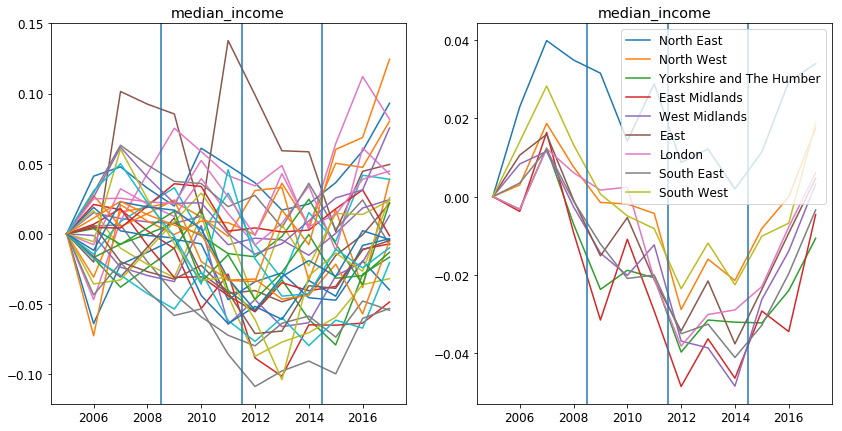

In [827]:
fig,(ax2,ax3) = plt.subplots(1,2,figsize=(14,7))
col = "median_income"
for area_code in areas_regions:
    ax3.plot(london_combine_normalized[london_combine_normalized['area_code']==area_code]['year'],london_combine_normalized[london_combine_normalized['area_code']==area_code][col],label=areas[area_code])

ax3.legend(loc=0)
ax3.set_title(col)


ax3.axvline(2008.5)

ax3.axvline(2011.5)

ax3.axvline(2014.5)

col = "median_income"
for area_code in areas_boroughs_2:
    ax2.plot(london_combine_normalized[london_combine_normalized['area_code']==area_code]['year'],london_combine_normalized[london_combine_normalized['area_code']==area_code][col],label=areas[area_code])

# ax2.legend(loc=0)
ax2.set_title(col)


ax2.axvline(2008.5)

ax2.axvline(2011.5)

ax2.axvline(2014.5)

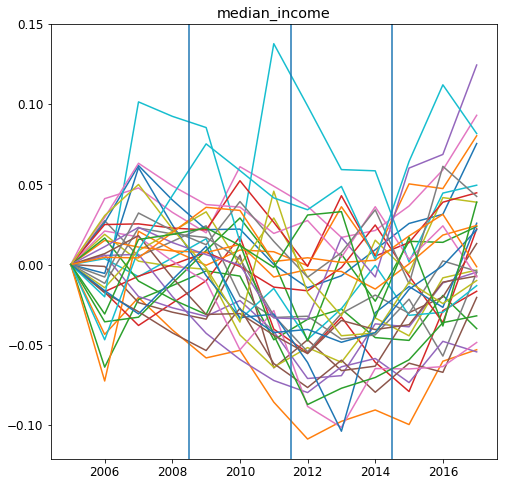

In [822]:
fig,ax3 = plt.subplots(figsize=(8,8))
col = "median_income"
for area_code in areas_boroughs:
    ax3.plot(london_combine_normalized[london_combine_normalized['area_code']==area_code]['year'],london_combine_normalized[london_combine_normalized['area_code']==area_code][col],label=areas[area_code])

# ax3.legend(loc=0)
ax3.set_title(col)


ax3.axvline(2008.5)

ax3.axvline(2011.5)

ax3.axvline(2014.5)

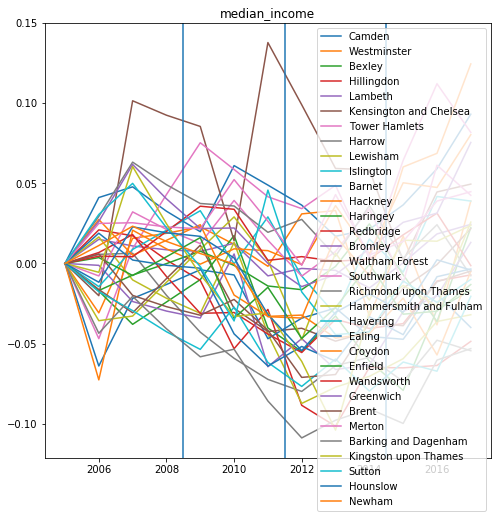

In [725]:
fig,ax3 = plt.subplots(figsize=(8,8))
col = "median_income"
for area_code in set(areas_boroughs) - {"00AA"}:
    ax3.plot(london_combine_normalized[london_combine_normalized['area_code']==area_code]['year'],london_combine_normalized[london_combine_normalized['area_code']==area_code][col],label=areas[area_code])

ax3.legend(loc=0)
ax3.set_title(col)


ax3.axvline(2008.5)

ax3.axvline(2011.5)

ax3.axvline(2014.5)

In [624]:
res_coef = dict()

for area in set(areas_boroughs)-{"00AA"}:
    X_arr = []
    y_arr = []
    m,n = 1,3#3组4期
    # for area in ['00BF','00AH']:
    for area_code in ["922","923","924"]:
        for year in range(2005,2018):
            temp = [1]+[0]*(m+m*n+n)
            if year_bin[year]:
                temp[year_bin[year]+1] = 1
            X_arr.append(temp)
        y_arr+=X_construct[X_construct['area_code'] == area_code]['Y_fun'].tolist()
    #     y_arr+=np.log10(X_construct[X_construct['area_code'] == area]['median_income']).tolist()[3:]


    for year in range(2005,2018):
        temp = [1]+[0]*(m+m*n+n)
        temp[1] = 1
        if year_bin[year]:
            temp[year_bin[year]+m] = 1
            temp[year_bin[year]+m+n] = 1
        X_arr.append(temp)
    y_arr+=X_construct[X_construct['area_code'] == area]['Y_fun'].tolist()
    #     y_arr+=np.log10(X_construct[X_construct['area_code'] == area]['median_income']).tolist()[3:]

    X_arr = np.array(X_arr)
    y_arr = np.array(y_arr)

    X_arr = pd.DataFrame(X_arr)
    y_arr = pd.DataFrame(y_arr)*100
    lr = LR()
    lr.fit(X_arr,y_arr)
    
    t = lr.coef_[0,-3:]
    res_coef[area] = t[0],t[1]-t[0],t[2]-t[1]
#     res_coef[area] = np.array(list(t)+[t[1]-t[0],t[2]-t[1]])
    print(area,areas[area],lr.score(X_arr,y_arr),est2.pvalues[-3:])

00AG Camden 0.3370089681407211 [2.86192313e-03 3.44844842e-05 3.15660822e-04]
00BK Westminster 0.17541060836337097 [2.86192313e-03 3.44844842e-05 3.15660822e-04]
00AD Bexley 0.3467146742805872 [2.86192313e-03 3.44844842e-05 3.15660822e-04]
00AS Hillingdon 0.3559474881411113 [2.86192313e-03 3.44844842e-05 3.15660822e-04]
00AY Lambeth 0.36593807630062003 [2.86192313e-03 3.44844842e-05 3.15660822e-04]
00AW Kensington and Chelsea 0.1840948164382561 [2.86192313e-03 3.44844842e-05 3.15660822e-04]
00BG Tower Hamlets 0.4417588229075813 [2.86192313e-03 3.44844842e-05 3.15660822e-04]
00AQ Harrow 0.42644878732056535 [2.86192313e-03 3.44844842e-05 3.15660822e-04]
00AZ Lewisham 0.30734802935901107 [2.86192313e-03 3.44844842e-05 3.15660822e-04]
00AU Islington 0.2952152472252121 [2.86192313e-03 3.44844842e-05 3.15660822e-04]
00AC Barnet 0.40646014082238213 [2.86192313e-03 3.44844842e-05 3.15660822e-04]
00AM Hackney 0.41182057452955045 [2.86192313e-03 3.44844842e-05 3.15660822e-04]
00AP Haringey 0.370

In [716]:
# london_combine_normalized

In [714]:
X_arr = []
y_arr = []
m,n = 2,3#3组4期
col = 'median_income'
# for area in ['00BF','00AH']:

# for col in ['Female_Hourly', 'Female_Weekly',
#        'Full-time_Hourly', 'Full-time_Weekly', 'Male_Hourly', 'Male_Weekly',
#        'Part-time_Hourly', 'Part-time_Weekly', 'mean_income', 'median_income',
#        'population','activity_F','activity_M','economically_active_F', 'economically_active_M',
#        'working_age_F', 'working_age_M']:
    X_arr = []
    y_arr = []
    for area in control_four:
    for area in set(areas_regions) - {"H"}
        for year in range(2005,2018):
            temp = [1]+[0]*(m+m*n+n)
            if year_bin[year]:
                temp[year_bin[year]+1] = 1
            X_arr.append(temp)
    #     y_arr+=X_construct[X_construct['area_code'] == area]['Y_fun'].tolist()
        y_arr+=london_combine_normalized[london_combine_normalized['area_code'] == area][col].tolist()
    #     y_arr+=np.log10(london_taxpayer_normalized[london_taxpayer_normalized['area_code'] == area]['median_income']).tolist()[3:]

    # for area in set(areas_boroughs)-{"00AA"}:
    #     for year in range(2002,2018):
    #         temp = [1]+[0]*(m+m*n)
    #         temp[1] = 1
    #         if year_bin[year]:
    #             temp[year_bin[year]+m] = 1
    #             temp[year_bin[year]+m+n] = 1
    #         X_arr.append(temp)
    #     y_arr+=london_taxpayer_normalized[london_taxpayer_normalized['area_code'] == area]['median_income'].tolist()[3:]
    #     y_arr+=np.log10(london_taxpayer_normalized[london_taxpayer_normalized['area_code'] == area]['median_income']).tolist()[3:]


    for area in poor_four:
        for year in range(2005,2018):
            temp = [1]+[0]*(m+m*n+n)
            temp[1] = 1
            if year_bin[year]:
                temp[year_bin[year]+m] = 1
                temp[year_bin[year]+m+n] = 1
            X_arr.append(temp)
        y_arr+=london_combine_normalized[london_combine_normalized['area_code'] == area][col].tolist()
    #     y_arr+=X_construct[X_construct['area_code'] == area]['Y_fun'].tolist()
    #     y_arr+=np.log10(london_taxpayer_normalized[london_taxpayer_normalized['area_code'] == area]['median_income']).tolist()[3:]

    for area in rich_four:
        for year in range(2005,2018):
            temp = [1]+[0]*(m+m*n+n)
            temp[1] = 1
            if year_bin[year]:
                temp[year_bin[year]+m] = 1
                temp[year_bin[year]+m+2*n] = 1
            X_arr.append(temp)
        y_arr+=london_combine_normalized[london_combine_normalized['area_code'] == area][col].tolist()
    #     y_arr+=X_construct[X_construct['area_code'] == area]['Y_fun'].tolist()
    #     y_arr+=np.log10(london_taxpayer_normalized[london_taxpayer_normalized['area_code'] == area]['median_income']).tolist()[3:]

    # X_arr = np.array(X_arr)
    # y_arr = np.array(y_arr)

    X_arr = pd.DataFrame(X_arr)
    y_arr = pd.DataFrame(y_arr)

    lr = LR()
    lr.fit(X_arr,y_arr)
    lr.score(X_arr,y_arr)
    print(col,lr.coef_[0][-6:])

# X_arr.iloc[64:128].head(10)

Female_Hourly [ 0.02338557 -0.0303999  -0.10012452  0.09419163  0.06300674 -0.0061433 ]
Female_Weekly [ 0.02675577 -0.03643542 -0.08743969  0.09675231  0.04987221 -0.02383515]
Full-time_Hourly [ 0.0705469   0.01578186 -0.03652025  0.11831699 -0.00166215 -0.06515397]
Full-time_Weekly [ 0.08267726  0.01160342 -0.03483708  0.12438564  0.00307041 -0.06229622]
Male_Hourly [ 0.08832351  0.01783853 -0.00398927  0.09524707 -0.05761264 -0.10874352]
Male_Weekly [ 0.09569669 -0.00587602 -0.01135645  0.14183515 -0.03744252 -0.10448196]
Part-time_Hourly [ 0.04430528 -0.0105096  -0.07894365  0.13222367  0.10905493  0.04160371]
Part-time_Weekly [ 0.1130662   0.01548889  0.02334787  0.10415154  0.00774228 -0.09684836]
mean_income [ 0.00204409 -0.03186278 -0.04348766  0.10330419  0.06237241  0.0556231 ]
median_income [ 0.01887277 -0.01865902 -0.00755846  0.08674571  0.06087444  0.00829174]
population [ 0.01452608 -0.02710476  0.08789081 -0.04038442 -0.09629485 -0.04970965]
activity_F [ 0.01792253  0.05

In [717]:
london_combine_normalized.head()

year area_code  Female_Hourly  Female_Weekly  Full-time_Hourly  \
0  2005      00AB       0.000000       0.000000          0.000000   
1  2006      00AB      -0.014859      -0.002256          0.048073   
2  2007      00AB      -0.013419       0.017878          0.050325   
3  2008      00AB       0.017784       0.029690          0.051169   
4  2009      00AB       0.032086      -0.020799          0.055590   

   Full-time_Weekly  Male_Hourly  Male_Weekly  Part-time_Hourly  \
0          0.000000     0.000000     0.000000          0.000000   
1          0.083062     0.107766     0.126019          0.032348   
2          0.084812     0.097609     0.120893          0.004365   
3          0.050820     0.072116     0.093652          0.026040   
4          0.059568     0.117613     0.092373          0.166067   

   Part-time_Weekly  mean_income  median_income  population  \
0          0.000000     0.000000       0.000000    0.000000   
1          0.050846    -0.027237      -0.043541   -0.072289   
2          0.046547    -0.025370      -0.020539   -0.060241   
3          0.029842    -0.026068      -0.040724   -0.084337   
4          0.327915    -0.025562      -0.058201   -0.108434   

   economically_active_F  economically_active_M  working_age_F  working_age_M  \
0               0.000000               0.000000       0.000000       0.000000   
1               0.015528              -0.017413      -0.005545       0.005894   
2               0.043478               0.069652       0.001848       0.015717   
3               0.068323               0.049751       0.033272       0.031434   
4               0.096273               0.079602       0.046211       0.060904   

   activity_F  activity_M  
0    1.000000    1.000000  
1    1.021191    0.976830  
2    1.041553    1.053100  
3    1.033923    1.017759  
4    1.047851    1.017625

In [625]:
res_keys= []
res_values = []
for i,j in res_coef.items():
    res_keys.append(i)
    res_values.append(list(j))
    
kmeans = KMeans(n_clusters=5).fit(res_values)

In [626]:
print("0",[t[0] for t in list(zip([areas[i] for i in res_keys],kmeans.labels_)) if t[1]==0])
print("1",[t[0] for t in list(zip([areas[i] for i in res_keys],kmeans.labels_)) if t[1]==1])
print("2",[t[0] for t in list(zip([areas[i] for i in res_keys],kmeans.labels_)) if t[1]==2])
print("3",[t[0] for t in list(zip([areas[i] for i in res_keys],kmeans.labels_)) if t[1]==3])
# print("4",[t[0] for t in list(zip([areas[i] for i in res_keys],kmeans.labels_)) if t[1]==4])

zeros = [t[0] for t in list(zip([areas[i] for i in res_keys],kmeans.labels_)) if t[1]==0]
ones = [t[0] for t in list(zip([areas[i] for i in res_keys],kmeans.labels_)) if t[1]==1]
twos = [t[0] for t in list(zip([areas[i] for i in res_keys],kmeans.labels_)) if t[1]==2]

0 ['Barnet', 'Hackney', 'Richmond upon Thames', 'Havering', 'Croydon', 'Greenwich']
1 ['Bexley', 'Lewisham', 'Redbridge', 'Bromley', 'Hammersmith and Fulham', 'Kingston upon Thames']
2 ['Camden', 'Westminster', 'Kensington and Chelsea', 'Islington', 'Ealing', 'Wandsworth', 'Merton', 'Sutton']
3 ['Hillingdon', 'Lambeth', 'Haringey', 'Waltham Forest', 'Southwark', 'Hounslow', 'Newham']


In [245]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(london_construct)

MinMaxScaler()

In [247]:
scaler.transform(london_construct)

array([[0.35228604, 0.39252578, 0.65677005, ..., 0.80174618, 0.85789538,
        0.8430341 ],
       [0.2481933 , 0.34151737, 0.52707212, ..., 0.76716373, 0.89397256,
        0.8355425 ],
       [0.        , 0.16420121, 0.51012072, ..., 0.84877562, 0.82846679,
        0.75786286],
       ...,
       [0.3087851 , 0.28425922, 0.30147208, ..., 0.38867706, 0.25280547,
        0.33754086],
       [0.22543064, 0.37260566, 0.1989699 , ..., 0.26720476, 0.30180098,
        0.27683092],
       [0.43776042, 0.49295244, 0.37708448, ..., 0.32414467, 0.22280716,
        0.23503672]])

In [268]:
london_combine_normalized.head()

year area_code  Female_Hourly  Female_Weekly  Full-time_Hourly  \
0  2005      00AB       1.000000       1.000000          1.000000   
1  2006      00AB       0.985141       0.997744          1.048073   
2  2007      00AB       0.986581       1.017878          1.050325   
3  2008      00AB       1.017784       1.029690          1.051169   
4  2009      00AB       1.032086       0.979201          1.055590   

   Full-time_Weekly  Male_Hourly  Male_Weekly  Part-time_Hourly  \
0          1.000000     1.000000     1.000000          1.000000   
1          1.083062     1.107766     1.126019          1.032348   
2          1.084812     1.097609     1.120893          1.004365   
3          1.050820     1.072116     1.093652          1.026040   
4          1.059568     1.117613     1.092373          1.166067   

   Part-time_Weekly  mean_income  median_income  population  \
0          1.000000     1.000000       1.000000    1.000000   
1          1.050846     0.972763       0.956459    0.927711   
2          1.046547     0.974630       0.979461    0.939759   
3          1.029842     0.973932       0.959276    0.915663   
4          1.327915     0.974438       0.941799    0.891566   

   economically_active_F  economically_active_M  working_age_F  working_age_M  
0               1.000000               1.000000       1.000000       1.000000  
1               1.015528               0.982587       0.994455       1.005894  
2               1.043478               1.069652       1.001848       1.015717  
3               1.068323               1.049751       1.033272       1.031434  
4               1.096273               1.079602       1.046211       1.060904

In [177]:
london_earnings.head()

year area_code  Female_Hourly  Female_Weekly  Full-time_Hourly  \
0  2002      00AB      13.242693     458.534137         17.289508   
1  2002      00AC      14.959046     486.247739         20.627738   
2  2002      00AD      14.486655     484.515639         18.423247   
3  2002      00AE      14.644119     520.259886         17.163537   
4  2002      00AF      16.533683     544.036897         20.942665   

   Full-time_Weekly  Male_Hourly  Male_Weekly  Part-time_Hourly  \
0        692.052724    18.108319   738.347036         10.896484   
1        785.901057    21.257592   819.125886         11.967237   
2        731.576099    19.053101   776.453238         10.864992   
3        674.574259    15.746365   648.592758          9.605282   
4        796.923512    23.304620   904.156255         12.439628   

   Part-time_Weekly   mean_income  median_income  population  
0        241.549233  30075.556377   26768.819812       67000  
1        216.040122  50860.757643   31020.338253      150000  
2        207.852013  33854.683880   28028.528980      114000  
3        185.964566  34169.611172   25824.037936      116000  
4        196.672094  43617.429929   31650.192837      160000

In [833]:
london_underground.head()

year                  area  weekday_entry  weekday_exit  saturday_entry  \
0  2007  Barking and Dagenham          37215       35548.0           24874   
1  2007                Barnet          73550       69337.0           49400   
2  2007                 Brent         126101      120759.0           94344   
3  2007                Camden         373473      377669.0          255139   
5  2007        City of London         327596      342181.0          102707   

   saturday_exit  sunday_entry  sunday_exit  annual_entry_and_exit   weekend  \
0          23552         16058        15346                  22.77   39915.0   
1          43152         31000        30597                  44.58   77074.5   
2          91462         64896        64783                  79.77  157742.5   
3         251977        180678       172411                 237.24  430102.5   
5         107995         70070        78745                 189.19  179758.5   

    weekday area_code  
0   72763.0      00AB  
1  142887.0      00AC  
2  246860.0      00AE  
3  751142.0      00AG  
5  669777.0      00AA

In [271]:
london_combine_normalized['area_code'].unique()

array(['00AB', '00AC', '00AD', '00AE', '00AF', '00AG', '00AH', '00AJ',
       '00AK', '00AL', '00AM', '00AN', '00AP', '00AQ', '00AR', '00AS',
       '00AT', '00AU', '00AW', '00AX', '00AY', '00AZ', '00BA', '00BB',
       '00BC', '00BD', '00BE', '00BF', '00BG', '00BH', '00BJ', '00BK',
       '922', '923', '924', '926', '941', 'A', 'B', 'D', 'E', 'F', 'G',
       'H', 'J', 'K', '00AA'], dtype=object)

In [275]:
areas_countries = {i:j for i,j in areas.items() if len(i)==3}

In [276]:
areas_countries

{'924': 'Wales',
 '923': 'Scotland',
 '922': 'Northern Ireland',
 '941': 'England and Wales',
 '926': 'United Kingdom'}

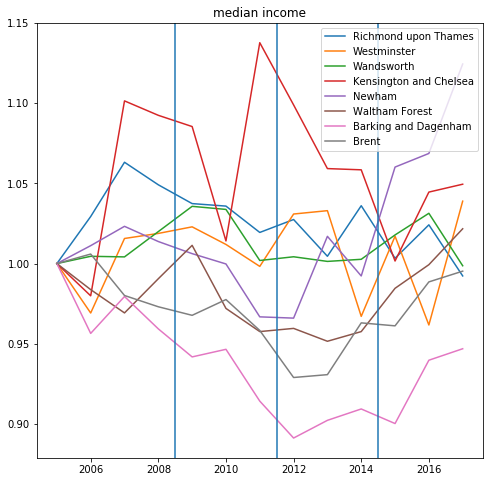

In [270]:
fig,ax = plt.subplots(figsize=(8,8))
for area_code in rich_four:
    ax.plot(london_combine_normalized[london_combine_normalized['area_code']==area_code]['year'],london_combine_normalized[london_combine_normalized['area_code']==area_code]['median_income'],label=areas[area_code])

    
for area_code in poor_four:
    ax.plot(london_combine_normalized[london_combine_normalized['area_code']==area_code]['year'],london_combine_normalized[london_combine_normalized['area_code']==area_code]['median_income'],label=areas[area_code])

ax.legend(loc=0)
ax.set_title("median income")


ax.axvline(2008.5)

ax.axvline(2011.5)

ax.axvline(2014.5)

# fig.savefig('medium_income_normalized.png', dpi=fig.dpi)

(2004, 2009)

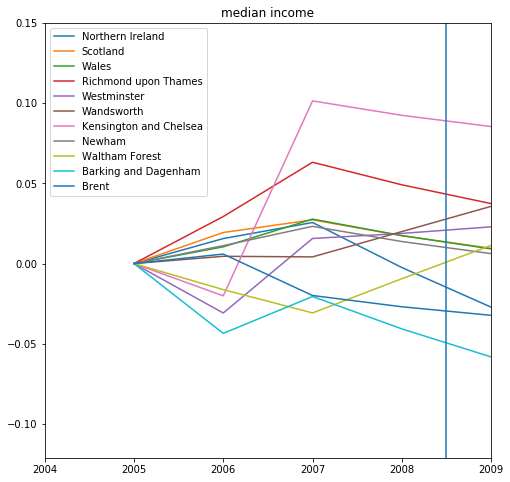

In [667]:
fig,ax = plt.subplots(figsize=(8,8))
for area_code in ["922","923","924"]:
    ax.plot(london_combine_normalized[london_combine_normalized['area_code']==area_code]['year'],london_combine_normalized[london_combine_normalized['area_code']==area_code]['median_income'],label=areas[area_code])

    
# for area_code in set(areas_boroughs)-{"00AA"}:

for area_code in rich_four:    
    ax.plot(london_combine_normalized[london_combine_normalized['area_code']==area_code]['year'],london_combine_normalized[london_combine_normalized['area_code']==area_code]['median_income'],label=areas[area_code])

for area_code in poor_four:    
    ax.plot(london_combine_normalized[london_combine_normalized['area_code']==area_code]['year'],london_combine_normalized[london_combine_normalized['area_code']==area_code]['median_income'],label=areas[area_code])

ax.legend(loc=0)
ax.set_title("median income")

ax.axvline(2008.5)

ax.axvline(2011.5)

ax.axvline(2014.5)

ax.set_xlim(2004,2009)

In [ ]:
london_underg

In [178]:
london_earnings['year'].unique()

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017])

In [175]:
london_economic_activity['year'].unique()

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019])

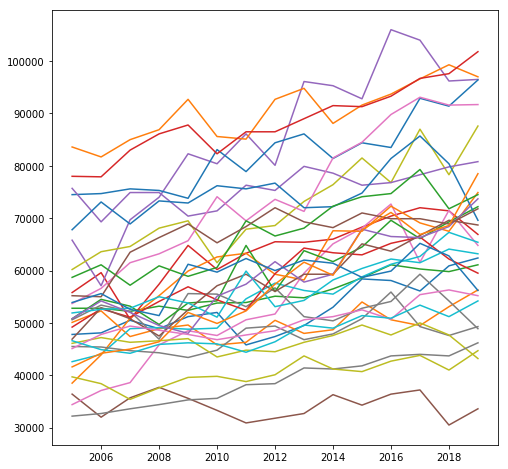

In [89]:
code = "00AB"

fig,ax = plt.subplots(figsize=(8,8))
for code in set(areas_boroughs)-{"00AA"}:
    ax.plot(london_economic_activity[(london_economic_activity['area_code']==code)&(london_economic_activity['gender']=="F")]['year'],\
        london_economic_activity[(london_economic_activity['area_code']==code)&(london_economic_activity['gender']=="F")]["economically_active"])

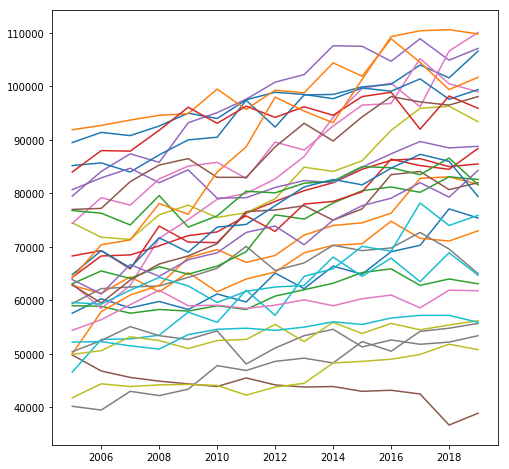

In [90]:
code = "00AB"

fig,ax = plt.subplots(figsize=(8,8))
for code in set(areas_boroughs)-{"00AA"}:
    ax.plot(london_economic_activity[(london_economic_activity['area_code']==code)&(london_economic_activity['gender']=="M")]['year'],\
        london_economic_activity[(london_economic_activity['area_code']==code)&(london_economic_activity['gender']=="M")]["economically_active"])
    

In [571]:
# for code in set(areas_boroughs)-{"00AA"}:
    
#     X_temp = london_economic_activity[(london_economic_activity['area_code']==code)&(london_economic_activity['gender']=="M")]['year']-2005
#     y_temp = london_economic_activity[(london_economic_activity['area_code']==code)&(london_economic_activity['gender']=="M")]['economically_active']

#     X_temp = pd.DataFrame(X_temp).reset_index(drop=True)
#     y_temp = pd.DataFrame(y_temp).reset_index(drop=True)
    
#     regr = RandomForestRegressor(max_depth=2, random_state=0)
#     regr.fit(X_temp, y_temp)
    
#     s = regr.score(X_temp,y_temp)

#     lr2 = LR()
#     lr2.fit(X_temp,y_temp)
    
#     s1 = lr2.score(X_temp,y_temp)
    
#     poly = PolynomialFeatures(2,include_bias=False)
#     X_temp = pd.DataFrame(poly.fit_transform(X_temp))
    
#     lr2 = LR()
#     lr2.fit(X_temp,y_temp)    
#     print(code,s,s1,lr2.score(X_temp,y_temp))

In [572]:
# code = "00AG"
# X_temp = london_economic_activity[(london_economic_activity['area_code']==code)&(london_economic_activity['gender']=="M")]['year']-2005
# y_temp = london_economic_activity[(london_economic_activity['area_code']==code)&(london_economic_activity['gender']=="M")]['economically_active']

# X_temp = pd.DataFrame(X_temp).reset_index(drop=True)
# y_temp = pd.DataFrame(y_temp).reset_index(drop=True)
    
# poly = PolynomialFeatures(4,include_bias=False)
# X_temp = pd.DataFrame(poly.fit_transform(X_temp))

# X_temp

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [133]:
code = "00AG"
X_temp = london_economic_activity[(london_economic_activity['area_code']==code)&(london_economic_activity['gender']=="M")]['year']-2005
y_temp = london_economic_activity[(london_economic_activity['area_code']==code)&(london_economic_activity['gender']=="M")]['economically_active']

X_temp = pd.DataFrame(X_temp).reset_index(drop=True)
y_temp = pd.DataFrame(y_temp).reset_index(drop=True)

In [134]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_temp, y_temp)

/Users/myzone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(max_depth=2, random_state=0)

In [135]:
regr.predict(X_temp)

array([59188.95544733, 59361.5518759 , 59346.5518759 , 59365.38520924,
       59503.0518759 , 59780.21735209, 60063.48878066, 63093.41616162,
       64069.96785714, 65301.74880952, 65578.33214286, 68481.23452381,
       69839.86904762, 74932.83571429, 75273.55      ])

In [136]:
regr.score(X_temp,y_temp)

0.9585131953067488

In [ ]:
from sklearn.model_selection import cross_val_predict

In [150]:
regr = RandomForestRegressor(max_depth=5, random_state=0)

cross_val_predict(regr, X_temp, y_temp, cv=3)

/Users/myzone/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:862: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/myzone/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:862: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/myzone/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:862: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


array([94028., 94028., 94028., 94028., 94028., 93926., 94067., 95317.,
       97714., 97917., 95092., 95092., 95092., 95092., 95092.])

In [124]:
lr2 = LR()
lr2.fit(X_temp,y_temp)
print(code,lr2.score(X_temp,y_temp))

00AG 0.931190786053262


In [105]:
lr2.score(X_temp,y_temp)

0.9554053423487181

In [148]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_predict

/Users/myzone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


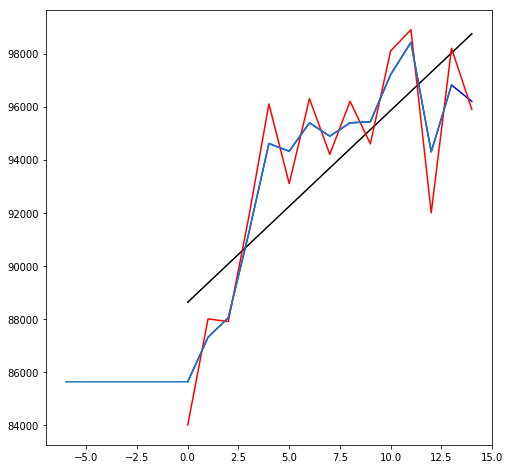

In [161]:
fig,ax = plt.subplots(figsize=(8,8))
# code ="00BB"

code = "00BJ"
X_temp = london_economic_activity[(london_economic_activity['area_code']==code)&(london_economic_activity['gender']=="M")]['year']-2005
y_temp = london_economic_activity[(london_economic_activity['area_code']==code)&(london_economic_activity['gender']=="M")]['economically_active']

X_temp = pd.DataFrame(X_temp).reset_index(drop=True)
y_temp = pd.DataFrame(y_temp).reset_index(drop=True)

regr = RandomForestRegressor(max_depth=5, random_state=0)
regr.fit(X_temp, y_temp)

s = regr.score(X_temp,y_temp)

ax.plot(X_temp,regr.predict(X_temp),'blue')


# regr = RandomForestRegressor(max_depth=5, random_state=0)

# ax.plot(X_temp,cross_val_predict(regr, X_temp, y_temp, cv=3))


lr2 = LR()
lr2.fit(X_temp,y_temp)

ax.plot(X_temp,lr2.predict(X_temp),'k')

s1 = lr2.score(X_temp,y_temp)

poly = PolynomialFeatures(2,include_bias=False)
X_temp = pd.DataFrame(poly.fit_transform(X_temp))

lr2 = LR()
lr2.fit(X_temp,y_temp)  

ax.plot(london_economic_activity[(london_economic_activity['area_code']==code)&(london_economic_activity['gender']=="M")]['year']-2005,\
        london_economic_activity[(london_economic_activity['area_code']==code)&(london_economic_activity['gender']=="M")]["economically_active"],'r')


t = range(1999,2019)
ax.plot(pd.DataFrame(list(t))-2005,regr.predict(pd.DataFrame(list(t))-2005))
# ax.plot(X_temp,lr2.predict(X_temp))





In [85]:
london_economic_before.head()

year area_code                  area gender  economically_active  \
0  2005      00AB  Barking and Dagenham      F              32200.0   
1  2005      00AC                Barnet      F              74500.0   
2  2005      00AD                Bexley      F              52800.0   
3  2005      00AE                 Brent      F              55200.0   
4  2005      00AF               Bromley      F              75700.0   

   working_age  percent  confidence  
0      54100.0     59.5         5.5  
1     110200.0     67.7         5.9  
2      72200.0     73.1         5.3  
3      91800.0     60.1         5.9  
4      96900.0     78.1         4.8

In [86]:
london_earnings.head()

year area_code  Female_Hourly  Female_Weekly  Full-time_Hourly  \
0  2002      00AB      13.242693     458.534137         17.289508   
1  2002      00AC      14.959046     486.247739         20.627738   
2  2002      00AD      14.486655     484.515639         18.423247   
3  2002      00AE      14.644119     520.259886         17.163537   
4  2002      00AF      16.533683     544.036897         20.942665   

   Full-time_Weekly  Male_Hourly  Male_Weekly  Part-time_Hourly  \
0        692.052724    18.108319   738.347036         10.896484   
1        785.901057    21.257592   819.125886         11.967237   
2        731.576099    19.053101   776.453238         10.864992   
3        674.574259    15.746365   648.592758          9.605282   
4        796.923512    23.304620   904.156255         12.439628   

   Part-time_Weekly   mean_income  median_income  population  
0        241.549233  30075.556377   26768.819812       67000  
1        216.040122  50860.757643   31020.338253      150000  
2        207.852013  33854.683880   28028.528980      114000  
3        185.964566  34169.611172   25824.037936      116000  
4        196.672094  43617.429929   31650.192837      160000

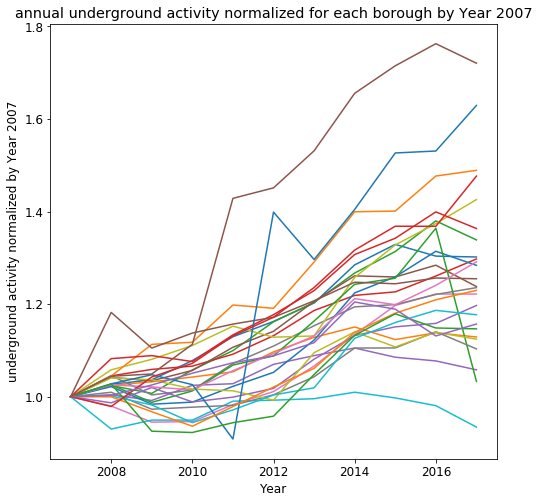

In [2454]:
fig,ax = plt.subplots(figsize=(8,8))
for area_code in set(london_underground['area_code'].unique())&areas_boroughs_2:
    ax.plot(london_underground[london_underground['area_code']==area_code]['year'],\
            london_underground[london_underground['area_code']==area_code]['annual_entry_and_exit']/london_underground[london_underground['area_code']==area_code]['annual_entry_and_exit'].iloc[0],label=areas[area_code])
#     ax.plot(london_combine_normalized[london_combine_normalized['area_code']==area_code]['year'],london_combine_normalized[london_combine_normalized['area_code']==area_code]['median_income'],label=areas[area_code])

# for area_code in {"00BB"}:
#     ax.plot(london_underground[london_underground['area_code']==area_code]['year'],\
#             london_underground[london_underground['area_code']==area_code]['annual_entry_and_exit']/london_underground[london_underground['area_code']==area_code]['annual_entry_and_exit'].iloc[0],label=areas[area_code])
    
# for area_code in poor_four:
#     ax.plot(london_combine_normalized[london_combine_normalized['area_code']==area_code]['year'],london_combine_normalized[london_combine_normalized['area_code']==area_code]['median_income'],label=areas[area_code])

# ax.legend(loc=0)
ax.set_title("annual underground activity normalized for each borough by Year 2007")
ax.set_xlabel("Year")
ax.set_ylabel("underground activity normalized by Year 2007")

fig.savefig('underground_activity.png', dpi=300)
# ax.axvline(2008.5)

# ax.axvline(2011.5)

# ax.axvline(2014.5)

In [2453]:
london_underground['year'].unique()

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

In [975]:
london_underground2 = london_underground[(london_underground['year']>=2011)&(london_underground['year']<=2013)].reset_index(drop=True)[["year","area_code",'annual_entry_and_exit']]

In [976]:
london_underground2.head()

year area_code  annual_entry_and_exit
0  2011      00AB                  25.76
1  2011      00AC                  51.37
2  2011      00AE                  78.07
3  2011      00AG                 267.96
4  2011      00AA                 192.74

In [138]:
X_arr = []
y_arr = []
for area in control_four:
    for year in range(2002,2018):
        temp = [1]+[0]*7
        if year_bin[year]:
            temp[year_bin[year]+1] = 1
        X_arr.append(temp)
    y_arr+=london_taxpayer[london_taxpayer['area'] == area]['median_income'].tolist()[3:]

X_arr = np.array(X_arr)
y_arr = np.array(y_arr)

In [257]:
X_arr = []
y_arr = []
for area in control_four:
    for year in range(2002,2018):
        temp = [1]+[0]*(1+1+3+3+3)
        if year_bin[year]:
            temp[year_bin[year]+1] = 1
        X_arr.append(temp)
    y_arr+=np.log10(london_taxpayer[london_taxpayer['area_code'] == area]['median_income']).tolist()[3:]
    
print(len(y_arr))
for area in poor_four:
    for year in range(2002,2018):
        temp = [1]+[0]*(1+1+3+3+3)
        if year_bin[year]:
            temp[year_bin[year]+1] = 1
            temp[year_bin[year]+] = 1
        X_arr.append(temp)
    y_arr+=np.log10(london_taxpayer[london_taxpayer['area_code'] == area]['median_income']).tolist()[3:]
    
for area in rich_four:
    for year in range(2002,2018):
        temp = [1]+[0]*(1+1+3+3+3)
        if year_bin[year]:
            temp[year_bin[year]+1] = 1
            temp[year_bin[year]+6] = 1
        X_arr.append(temp)
    y_arr+=np.log10(london_taxpayer[london_taxpayer['area_code'] == area]['median_income']).tolist()[3:]    
    

X_arr = np.array(X_arr)
y_arr = np.array(y_arr)

SyntaxError: invalid syntax (<ipython-input-257-9f2b477097df>, line 17)

In [54]:
year_bin = dict()
for year in range(2002,2006):
    year_bin[year] = 0
for year in range(2006,2011):
    year_bin[year] = 1
for year in range(2011,2015):
    year_bin[year] = 2
for year in range(2015,2018):
    year_bin[year] = 3

In [395]:
X_arr = []
y_arr = []
m,n = 2,3#3组4期
for area in set(areas_regions)-{"H"}:
    for year in range(2002,2018):
        temp = [1]+[0]*(m+3*n)
        if year_bin[year]:
            temp[year_bin[year]+1] = 1
        X_arr.append(temp)
#     y_arr+=london_taxpayer[london_taxpayer['area_code'] == area]['median_income'].tolist()[3:]
    y_arr+=np.log10(london_taxpayer[london_taxpayer['area_code'] == area]['median_income']).tolist()[3:]

print(len(X_arr),len(y_arr))
for area in ["H"]:
    for year in range(2002,2018):
        temp = [1]+[0]*(m+3*n)
        temp[1] = 1
        if year_bin[year]:
            temp[year_bin[year]+m] = 1
            temp[year_bin[year]+m+3] = 1
        X_arr.append(temp)
#     y_arr+=london_taxpayer[london_taxpayer['area_code'] == area]['median_income'].tolist()[3:]
    y_arr+=np.log10(london_taxpayer[london_taxpayer['area_code'] == area]['median_income']).tolist()[3:]

for area in rich_four:
    for year in range(2002,2018):
        temp = [1]+[0]*(1+1+3+3+3)
        temp[2] = 1
        if year_bin[year]:
            temp[year_bin[year]+2] = 1
            temp[year_bin[year]+2+6] = 1
        X_arr.append(temp)
    y_arr+=london_taxpayer[london_taxpayer['area_code'] == area]['median_income'].tolist()[3:]
#     y_arr+=np.log10(london_taxpayer[london_taxpayer['area_code'] == area]['median_income']).tolist()[3:]
    

X_arr = np.array(X_arr)
y_arr = np.array(y_arr)

X_arr = pd.DataFrame(X_arr)
y_arr = pd.DataFrame(y_arr)

print(len(areas_regions)+len(poor_four)+len(rich_four))
print(X_arr.shape,y_arr.shape)
# X_arr.iloc[64:128].head(10)

128 128
17
(208, 12) (208, 1)


In [416]:
year_bin = dict()
for year in range(2002,2006):# before the games
    year_bin[year] = 0
for year in range(2006,2011):# before the games, london is host
    year_bin[year] = 1
for year in range(2011,2015):# short term effect
    year_bin[year] = 2
for year in range(2015,2018): # 
    year_bin[year] = 3
    
year_bin = dict()
for year in range(2002,2009):# before the games
    year_bin[year] = 0
for year in range(2009,2012):# before the games, london is host
    year_bin[year] = 1
for year in range(2012,2015):# short term effect
    year_bin[year] = 2
for year in range(2015,2018): # 
    year_bin[year] = 3
# for year in range(2002,2018):
#     year_bin[year] = year-2002

In [56]:
control_four

['00BC', '00BF', '00AQ', '00AH']

In [57]:
[areas[i] for i in control_four]

['Redbridge', 'Sutton', 'Harrow', 'Croydon']

In [418]:
X_arr = []
y_arr = []
m,n = 32,3#3组4期
# for area in ['00BF','00AH']:
for area in ["922","923","924"]:
    for year in range(2002,2018):
        temp = [1]+[0]*(m+m*n)
        if year_bin[year]:
            temp[year_bin[year]+1] = 1
        X_arr.append(temp)
    y_arr+=london_taxpayer_normalized[london_taxpayer_normalized['area_code'] == area]['median_income'].tolist()[3:]
#     y_arr+=np.log10(london_taxpayer_normalized[london_taxpayer_normalized['area_code'] == area]['median_income']).tolist()[3:]


for area in set(areas_boroughs)-{"00AA"}:
    for year in range(2002,2018):
        temp = [1]+[0]*(m+m*n)
        temp[1] = 1
        if year_bin[year]:
            temp[year_bin[year]+m] = 1
            temp[year_bin[year]+m+n] = 1
        X_arr.append(temp)
    y_arr+=london_taxpayer_normalized[london_taxpayer_normalized['area_code'] == area]['median_income'].tolist()[3:]
#     y_arr+=np.log10(london_taxpayer_normalized[london_taxpayer_normalized['area_code'] == area]['median_income']).tolist()[3:]


# for area in poor_four:
#     for year in range(2002,2018):
#         temp = [1]+[0]*(m+3*n)
#         temp[1] = 1
#         if year_bin[year]:
#             temp[year_bin[year]+m] = 1
#             temp[year_bin[year]+m+n] = 1
#         X_arr.append(temp)
#     y_arr+=london_taxpayer_normalized[london_taxpayer_normalized['area_code'] == area]['median_income'].tolist()[3:]
# #     y_arr+=np.log10(london_taxpayer_normalized[london_taxpayer_normalized['area_code'] == area]['median_income']).tolist()[3:]

# for area in rich_four:
#     for year in range(2002,2018):
#         temp = [1]+[0]*(m+3*n)
#         temp[2] = 1
#         if year_bin[year]:
#             temp[year_bin[year]+m] = 1
#             temp[year_bin[year]+m+2*n] = 1
#         X_arr.append(temp)
#     y_arr+=london_taxpayer_normalized[london_taxpayer_normalized['area_code'] == area]['median_income'].tolist()[3:]
# #     y_arr+=np.log10(london_taxpayer_normalized[london_taxpayer_normalized['area_code'] == area]['median_income']).tolist()[3:]
    

X_arr = np.array(X_arr)
y_arr = np.array(y_arr)

X_arr = pd.DataFrame(X_arr)
y_arr = pd.DataFrame(y_arr)

print(len(areas_regions)+len(poor_four)+len(rich_four))
print(X_arr.shape,y_arr.shape)
# X_arr.iloc[64:128].head(10)

17
(560, 129) (560, 1)


In [419]:
X_arr.head()

0    1    2    3    4    5    6    7    8    9    ...  119  120  121  122  \
0    1    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    1    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    1    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3    1    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4    1    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   123  124  125  126  127  128  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 129 columns]

In [854]:
london_taxpayer_normalized.head()

year area_code                  area  population  mean_income  \
0  1999      00AB  Barking and Dagenham       62000     0.902678   
1  2000      00AB  Barking and Dagenham       71000     0.993643   
2  2001      00AB  Barking and Dagenham       56000     0.991351   
3  2002      00AB  Barking and Dagenham       67000     1.000000   
4  2003      00AB  Barking and Dagenham       67000     0.967840   

   median_income  
0       0.945320  
1       0.962190  
2       0.970094  
3       1.000000  
4       1.006420

(2002, 2009)

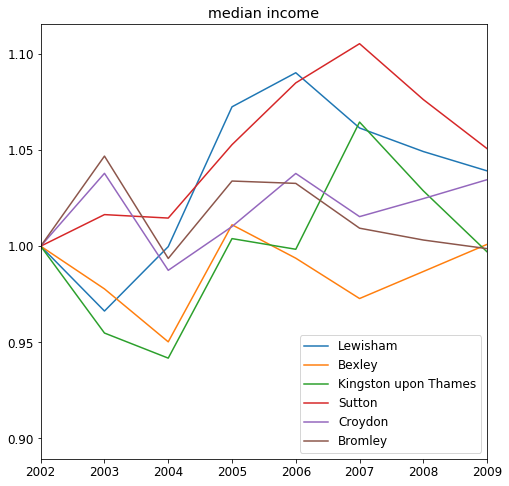

In [859]:
fig,ax = plt.subplots(figsize=(8,8))
for area_code in [areas_boroughs_reverse[i] for i in areas_nounderground]:
    ax.plot(london_taxpayer_normalized[london_taxpayer_normalized['area_code']==area_code]['year'],london_taxpayer_normalized[london_taxpayer_normalized['area_code']==area_code]['median_income'],label=areas[area_code])

    
# for area_code in set(areas_boroughs)-{"00AA"}:

# for area_code in rich_four:    
#     ax.plot(london_taxpayer_normalized[london_taxpayer_normalized['area_code']==area_code]['year'],london_taxpayer_normalized[london_taxpayer_normalized['area_code']==area_code]['median_income'],label=areas[area_code])

# for area_code in poor_four:    
#     ax.plot(london_taxpayer_normalized[london_taxpayer_normalized['area_code']==area_code]['year'],london_taxpayer_normalized[london_taxpayer_normalized['area_code']==area_code]['median_income'],label=areas[area_code])

ax.legend(loc=0)
ax.set_title("median income")

# ax.axvline(2008.5)

ax.axvline(2011.5)

ax.axvline(2014.5)

ax.set_xlim(2002,2009)

In [910]:
london_taxpayer_normalized[(london_taxpayer_normalized["area_code"]==area_code)\
                                                              &(london_taxpayer_normalized["year"]\
                                                                .isin(list(range(2002,2009))))]['medium']


year area_code      area  population  mean_income  median_income
402  2002      00AZ  Lewisham      113000     1.000000       1.000000
403  2003      00AZ  Lewisham      114000     0.987879       0.966233
404  2004      00AZ  Lewisham      130000     1.031483       0.999761
405  2005      00AZ  Lewisham      124000     1.092479       1.072532
406  2006      00AZ  Lewisham      124000     1.088026       1.090269
407  2007      00AZ  Lewisham      137000     1.107412       1.061517
408  2008      00AZ  Lewisham      136000     1.093100       1.049255

In [911]:
control0 = dict()
for area_code in [areas_boroughs_reverse[i] for i in areas_nounderground]:
    control0[area_code] = np.array(london_taxpayer_normalized[(london_taxpayer_normalized["area_code"]==area_code)\
                                                              &(london_taxpayer_normalized["year"].isin(list(range(2002,2009))))]["median_income"])
    print(control0[area_code])
    
    

[1.         0.966233   0.99976089 1.0725322  1.09026863 1.06151669
 1.04925519]
[1.         0.9777601  0.95020418 1.01113275 0.99373229 0.97274459
 0.98680957]
[1.         0.95478318 0.94172369 1.00393159 0.99838597 1.06459355
 1.02880413]
[1.         1.01642858 1.0146248  1.05282894 1.08499342 1.10539158
 1.07630543]
[1.         1.03791107 0.98742498 1.01020616 1.03784184 1.01537722
 1.02475372]
[1.         1.04687966 0.9936053  1.0338997  1.03267844 1.00935878
 1.00320191]


In [913]:
np.var(control0['00AZ'])

0.0017944443660215278

In [2701]:
control_closest = dict()
control_closest2 = dict()
for area_code in areas_boroughs_2-set([areas_boroughs_reverse[i] for i in areas_nounderground]):
    temp = np.array(london_taxpayer_normalized[(london_taxpayer_normalized["area_code"]==area_code)\
                                                              &(london_taxpayer_normalized["year"].isin(list(range(2002,2009))))]["median_income"])
    var = dict()
    for code in control0:
        var[code]=np.var(temp-control0[code])
    t = sorted(var.items(),key=lambda x:x[1])
#     print(area_code,t)
    control_closest[area_code] = [i[0] for i in t[:3]]
    


In [2700]:
area_code = "00BH"
temp = np.array(london_taxpayer_normalized[(london_taxpayer_normalized["area_code"]==area_code)\
                                                          &(london_taxpayer_normalized["year"].isin(list(range(2002,2009))))]["median_income"])
var = dict()
for code in control0:
    var[code]=np.var(temp-control0[code])
    print(code,areas[code],var[code])
# t = sorted(var.items(),key=lambda x:x[1])
# print(t)
#     print(area_code,t)
# control_closest[area_code] = [i[0] for i in t[:2]]

00AZ Lewisham 0.003136777737666575
00AD Bexley 0.00037406649416911177
00AX Kingston upon Thames 0.002238949366529565
00BF Sutton 0.003062898305725926
00AH Croydon 0.0009159534717281647
00AF Bromley 0.0008735724789319781
[('00AD', 0.00037406649416911177), ('00AF', 0.0008735724789319781), ('00AH', 0.0009159534717281647), ('00AX', 0.002238949366529565), ('00BF', 0.003062898305725926), ('00AZ', 0.003136777737666575)]


Waltham Forest ['Bexley', 'Bromley', 'Croydon']


(2002, 2009)

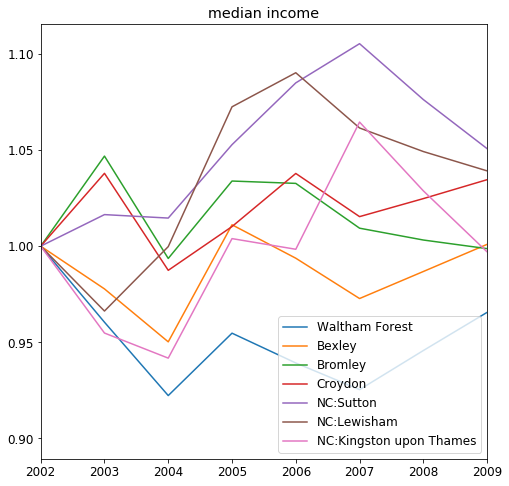

In [2774]:
fig,ax = plt.subplots(figsize=(8,8))
code = "00BH"
for area_code in [code]:
    ax.plot(london_taxpayer_normalized[london_taxpayer_normalized['area_code']==area_code]['year'],london_taxpayer_normalized[london_taxpayer_normalized['area_code']==area_code]['median_income'],label=areas[area_code])

for area_code in control_closest[code]:
    ax.plot(london_taxpayer_normalized[london_taxpayer_normalized['area_code']==area_code]['year'],london_taxpayer_normalized[london_taxpayer_normalized['area_code']==area_code]['median_income'],label=areas[area_code])

for area_code in set(control0) - set(control_closest[code]):
    ax.plot(london_taxpayer_normalized[london_taxpayer_normalized['area_code']==area_code]['year'],\
            london_taxpayer_normalized[london_taxpayer_normalized['area_code']==area_code]['median_income'],label="NC:"+areas[area_code])

# for area_code in set(areas_boroughs)-{"00AA"}:

# for area_code in rich_four:    
#     ax.plot(london_taxpayer_normalized[london_taxpayer_normalized['area_code']==area_code]['year'],london_taxpayer_normalized[london_taxpayer_normalized['area_code']==area_code]['median_income'],label=areas[area_code])

# for area_code in poor_four:    
#     ax.plot(london_taxpayer_normalized[london_taxpayer_normalized['area_code']==area_code]['year'],london_taxpayer_normalized[london_taxpayer_normalized['area_code']==area_code]['median_income'],label=areas[area_code])

ax.legend(loc=0)
ax.set_title("median income")
print(areas[code],[areas[i] for i in control_closest[code]])

# ax.axvline(2008.5)

# ax.axvline(2011.5)

# ax.axvline(2014.5)

ax.set_xlim(2002,2009)



In [2683]:
control0

{'00AZ': array([1.        , 0.966233  , 0.99976089, 1.0725322 , 1.09026863,
        1.06151669, 1.04925519]),
 '00AD': array([1.        , 0.9777601 , 0.95020418, 1.01113275, 0.99373229,
        0.97274459, 0.98680957]),
 '00AX': array([1.        , 0.95478318, 0.94172369, 1.00393159, 0.99838597,
        1.06459355, 1.02880413]),
 '00BF': array([1.        , 1.01642858, 1.0146248 , 1.05282894, 1.08499342,
        1.10539158, 1.07630543]),
 '00AH': array([1.        , 1.03791107, 0.98742498, 1.01020616, 1.03784184,
        1.01537722, 1.02475372]),
 '00AF': array([1.        , 1.04687966, 0.9936053 , 1.0338997 , 1.03267844,
        1.00935878, 1.00320191])}

Waltham Forest ['Bexley', 'Bromley', 'Croydon']


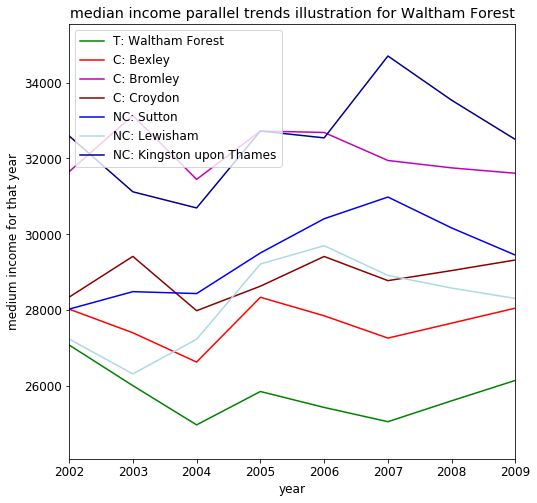

In [2778]:
fig,ax = plt.subplots(figsize=(8,8))
code = "00BH"
for area_code in [code]:
    ax.plot(london_taxpayer[london_taxpayer['area_code']==area_code]['year'],london_taxpayer[london_taxpayer['area_code']==area_code]['median_income'],label="T: "+areas[area_code],color='g')

for i,area_code in enumerate(list(control_closest[code])):
    if i==0:
        color = "red"
    elif i==1:
        color = 'm'
    else:
        color = 'darkred'
    ax.plot(london_taxpayer[london_taxpayer['area_code']==area_code]['year'],london_taxpayer[london_taxpayer['area_code']==area_code]['median_income'],label="C: "+areas[area_code],color=color)

for i,area_code in enumerate(list(set(control0) - set(control_closest[code]))):
    if i==0:
        color = "blue"
    elif i==1:
        color = 'lightblue'
    else:
        color = 'darkblue'
    ax.plot(london_taxpayer[london_taxpayer['area_code']==area_code]['year'],london_taxpayer[london_taxpayer['area_code']==area_code]['median_income'],label="NC: "+areas[area_code],color=color)

    
# for area_code in set(areas_boroughs)-{"00AA"}:

# for area_code in rich_four:    
#     ax.plot(london_taxpayer[london_taxpayer['area_code']==area_code]['year'],london_taxpayer[london_taxpayer['area_code']==area_code]['median_income'],label=areas[area_code])

# for area_code in poor_four:    
#     ax.plot(london_taxpayer[london_taxpayer['area_code']==area_code]['year'],london_taxpayer[london_taxpayer['area_code']==area_code]['median_income'],label=areas[area_code])

ax.legend(loc=0)
ax.set_title("median income parallel trends illustration for %s"%areas[code])
print(areas[code],[areas[i] for i in control_closest[code]])

# ax.axvline(2008.5)

# ax.axvline(2011.5)

# ax.axvline(2014.5)

ax.set_xlim(2002,2009)
ax.set_xlabel("year")
ax.set_ylabel("medium income for that year")

fig.savefig('parallel_trends.png', dpi=300)


In [ ]:
control0

In [ ]:
fig,ax = plt.subplots(figsize=(8,8))
code = "00AG"
for area_code in control0:
    ax.plot(london_taxpayer_normalized[london_taxpayer_normalized['area_code']==area_code]['year'],london_taxpayer_normalized[london_taxpayer_normalized['area_code']==area_code]['median_income'],label=areas[area_code])

for area_code in control_closest[code]:
    ax.plot(london_taxpayer_normalized[london_taxpayer_normalized['area_code']==area_code]['year'],london_taxpayer_normalized[london_taxpayer_normalized['area_code']==area_code]['median_income'],label=areas[area_code])

    
# for area_code in set(areas_boroughs)-{"00AA"}:

# for area_code in rich_four:    
#     ax.plot(london_taxpayer_normalized[london_taxpayer_normalized['area_code']==area_code]['year'],london_taxpayer_normalized[london_taxpayer_normalized['area_code']==area_code]['median_income'],label=areas[area_code])

# for area_code in poor_four:    
#     ax.plot(london_taxpayer_normalized[london_taxpayer_normalized['area_code']==area_code]['year'],london_taxpayer_normalized[london_taxpayer_normalized['area_code']==area_code]['median_income'],label=areas[area_code])

ax.legend(loc=0)
ax.set_title("median income")
print(areas[code],[areas[i] for i in control_closest[code]])

ax.axvline(2008.5)

ax.axvline(2011.5)

ax.axvline(2014.5)

In [962]:
list(areas_boroughs_2-set([areas_boroughs_reverse[i] for i in areas_nounderground]))

['00AG',
 '00BK',
 '00AS',
 '00AY',
 '00AW',
 '00BG',
 '00AQ',
 '00AU',
 '00AC',
 '00AM',
 '00AP',
 '00BC',
 '00BH',
 '00BE',
 '00BD',
 '00AN',
 '00AR',
 '00AJ',
 '00AK',
 '00BJ',
 '00AL',
 '00AE',
 '00BA',
 '00AB',
 '00AT',
 '00BB']

In [1591]:
year_bin

{2002: 0,
 2003: 0,
 2004: 0,
 2005: 0,
 2006: 0,
 2007: 0,
 2008: 0,
 2009: 1,
 2010: 2,
 2011: 3,
 2012: 4,
 2013: 5,
 2014: 6,
 2015: 7,
 2016: 8,
 2017: 9}

In [1595]:
len(set(year_bin.values()))

4

In [1592]:
year_bin = dict()
for year in range(2002,2009):
    year_bin[year] = 0
for year in range(2009,2012):
    year_bin[year] = 1
for year in range(2012,2015):
    year_bin[year] = 2
for year in range(2015,2018):
    year_bin[year] = 3

In [1328]:
res_coef = dict()

# for area in set(areas_boroughs)-{"00AA"}:
for area in areas_boroughs_2-set([areas_boroughs_reverse[i] for i in areas_nounderground]):
    X_arr = []
    y_arr = []
    m,n = 1,len(set(year_bin.values())#3组4期
    # for area in ['00BF','00AH']:
    for area_code in control_closest[area]:
#     for area_code in set(areas_regions)-{"H"}:
#     for area_code in ["922","923","924"]:
        for year in range(2002,2018):
            temp = [1]+[0]*(m+m*n+n)
            if year_bin[year]:
#                 for i in range(1+m,year_bin[year]+2):
#                     temp[i] = 1
                temp[year_bin[year]+1] = 1
            X_arr.append(temp)
        y_arr+=london_taxpayer_normalized[london_taxpayer_normalized['area_code'] == area_code]['median_income'].tolist()[3:]
    #     y_arr+=np.log10(london_taxpayer_normalized[london_taxpayer_normalized['area_code'] == area]['median_income']).tolist()[3:]


    for year in range(2002,2018):
        temp = [1]+[0]*(m+m*n+n)
        temp[1] = 1
        if year_bin[year]:
            temp[year_bin[year]+m] = 1
            temp[year_bin[year]+m+n] = 1
#             for i in range(1+m,year_bin[year]+2):
#                 temp[i] = 1
#             for i in range(1+m+n,year_bin[year]+n+2):
#                 temp[i] = 1
        X_arr.append(temp)
    y_arr+=london_taxpayer_normalized[london_taxpayer_normalized['area_code'] == area]['median_income'].tolist()[3:]
    #     y_arr+=np.log10(london_taxpayer_normalized[london_taxpayer_normalized['area_code'] == area]['median_income']).tolist()[3:]

    X_arr = np.array(X_arr)
    y_arr = np.array(y_arr)

    X_arr = pd.DataFrame(X_arr)
    y_arr = pd.DataFrame(y_arr)
    lr = LR()
    lr.fit(X_arr,y_arr)   
    t = lr.coef_[0,-n:]
    res_coef[area] = t
    
#     clr = Ridge()
#     clr.fit(X_arr,y_arr)
#     t = clr.coef_[0,-n:]
#     res_coef[area] = t     
    
    est = sm.OLS(y_arr,X_arr)
    est2 = est.fit()
#     res_coef[area] = np.array([areas[area]]+list(t)+[t[1]-t[0],t[2]-t[1]])
#     print(area,areas[area],lr.score(X_arr,y_arr),'t',sum(i<0.05 for i in est2.pvalues[-n:]))
    print(area,areas[area],lr.score(X_arr,y_arr),list(round(i,3) for i in est2.pvalues[-n:]))

00AG Camden 0.41052427543743286 [0.75, 0.306, 0.584, 0.17, 0.246, 0.247, 0.303, 0.172, 0.068]
00BK Westminster 0.552340759591398 [0.303, 0.196, 0.648, 0.101, 0.033, 0.532, 0.292, 0.706, 0.269]
00AS Hillingdon 0.8202928805766594 [0.42, 0.024, 0.841, 0.021, 0.03, 0.328, 0.045, 0.133, 0.013]
00AY Lambeth 0.6545073784703193 [0.889, 0.693, 0.218, 0.29, 0.101, 0.258, 0.508, 0.071, 0.668]
00AW Kensington and Chelsea 0.3286067724651812 [0.249, 0.511, 0.105, 0.082, 0.091, 0.219, 0.831, 0.358, 0.576]
00BG Tower Hamlets 0.516361564469183 [0.156, 0.301, 0.19, 0.096, 0.028, 0.494, 0.041, 0.009, 0.208]
00AQ Harrow 0.7432863889899419 [0.211, 0.006, 0.233, 0.14, 0.309, 0.661, 0.24, 0.182, 0.026]
00AU Islington 0.6875059936794055 [0.358, 0.327, 0.363, 0.444, 0.505, 0.117, 0.515, 0.043, 0.167]
00AC Barnet 0.5352841827591639 [0.632, 0.503, 0.908, 0.649, 0.544, 0.647, 0.872, 0.934, 0.214]
00AM Hackney 0.39294627870613075 [0.663, 0.279, 0.714, 0.32, 0.036, 0.288, 0.165, 0.122, 0.121]
00AP Haringey 0.590882

In [1510]:
res_coef = dict()

# for area in set(areas_boroughs)-{"00AA"}:
for area in areas_boroughs_2-set([areas_boroughs_reverse[i] for i in areas_nounderground]):
    X_arr = []
    y_arr = []
    m,n = 1,9#3组4期
    # for area in ['00BF','00AH']:
    for area_code in control_closest[area]:
#     for area_code in set(areas_regions)-{"H"}:
#     for area_code in ["922","923","924"]:
        for year in range(2002,2018):
            temp = [1]+[0]*(m+m*n+n)
            if year_bin[year]:
#                 for i in range(1+m,year_bin[year]+2):
#                     temp[i] = 1
                temp[year_bin[year]+1] = 1
            X_arr.append(temp)
        y_arr+=london_taxpayer[london_taxpayer['area_code'] == area_code]['median_income'].tolist()[3:]
    #     y_arr+=np.log10(london_taxpayer[london_taxpayer['area_code'] == area]['median_income']).tolist()[3:]


    for year in range(2002,2018):
        temp = [1]+[0]*(m+m*n+n)
        temp[1] = 1
        if year_bin[year]:
            temp[year_bin[year]+m] = 1
            temp[year_bin[year]+m+n] = 1
#             for i in range(1+m,year_bin[year]+2):
#                 temp[i] = 1
#             for i in range(1+m+n,year_bin[year]+n+2):
#                 temp[i] = 1
        X_arr.append(temp)
    y_arr+=london_taxpayer[london_taxpayer['area_code'] == area]['median_income'].tolist()[3:]
    #     y_arr+=np.log10(london_taxpayer[london_taxpayer['area_code'] == area]['median_income']).tolist()[3:]

    X_arr = np.array(X_arr)
    y_arr = np.array(y_arr)

    X_arr = pd.DataFrame(X_arr)
    y_arr = pd.DataFrame(y_arr)
    lr = LR()
    lr.fit(X_arr,y_arr)   
    t = lr.coef_[0,-n:]
    res_coef[area] = t
    
#     clr = Ridge()
#     clr.fit(X_arr,y_arr)
#     t = clr.coef_[0,-n:]
#     res_coef[area] = t     
    
    est = sm.OLS(y_arr,X_arr)
    est2 = est.fit()
#     res_coef[area] = np.array([areas[area]]+list(t)+[t[1]-t[0],t[2]-t[1]])
#     print(area,areas[area],lr.score(X_arr,y_arr),'t',sum(i<0.05 for i in est2.pvalues[-n:]))
    print(area,areas[area],lr.score(X_arr,y_arr),list(round(i,3) for i in est2.pvalues[-n:]))

00AG Camden 0.9309185359597533 [0.737, 0.278, 0.528, 0.205, 0.308, 0.3, 0.324, 0.177, 0.064]
00BK Westminster 0.8683125764900719 [0.351, 0.268, 0.638, 0.151, 0.066, 0.623, 0.348, 0.767, 0.312]
00AS Hillingdon 0.32877657352361644 [0.82, 0.478, 0.945, 0.478, 0.51, 0.777, 0.541, 0.642, 0.434]
00AY Lambeth 0.11387424319960315 [0.958, 0.92, 0.707, 0.752, 0.618, 0.733, 0.847, 0.596, 0.911]
00AW Kensington and Chelsea 0.8818326664289482 [0.256, 0.582, 0.097, 0.104, 0.139, 0.269, 0.854, 0.401, 0.568]
00BG Tower Hamlets 0.12318282918078449 [0.6, 0.691, 0.631, 0.536, 0.398, 0.809, 0.458, 0.323, 0.652]
00AQ Harrow 0.14531711453128004 [0.718, 0.402, 0.726, 0.656, 0.769, 0.893, 0.714, 0.691, 0.495]
00AU Islington 0.8796558839762885 [0.293, 0.285, 0.297, 0.405, 0.489, 0.087, 0.474, 0.026, 0.122]
00AC Barnet 0.09340782759887023 [0.872, 0.845, 0.972, 0.893, 0.845, 0.894, 0.978, 0.98, 0.691]
00AM Hackney 0.4733678690992076 [0.763, 0.432, 0.785, 0.453, 0.113, 0.442, 0.329, 0.269, 0.294]
00AP Haringey 0.

In [1511]:
res_coef

{'00AG': array([ 580.83021537, 1892.70362174, 1092.68673062, 2220.11971379,
        1778.36662208, 1807.27173949, 1716.94324758, 2372.93430358,
        3302.22630358]),
 '00BK': array([2581.46396917, 3075.84854974, 1293.70999261, 4017.21891636,
        5194.17857779, 1350.34334193, 2594.06441678,  812.23662078,
        2798.97382078]),
 '00AS': array([ -599.42408038, -1881.63441192,   182.13838848, -1880.72541618,
        -1745.45819278,  -747.95895237, -1620.1401926 , -1228.3384606 ,
        -2075.3720606 ]),
 '00AY': array([ 137.93930047,  265.52241804,  991.74601459,  833.59930654,
        1317.59531851,  901.47070374,  510.75736847, 1403.51690047,
         293.33930047]),
 '00AW': array([3692.81509078, 1777.15458052, 5466.94128176, 5350.30228741,
        4860.91356221, 3595.63295109,  593.06275087, 2716.59649887,
        1842.73049887]),
 '00BG': array([1836.52062147, 1394.12616131, 1682.22494113, 2170.81015205,
        2977.47017201,  847.76293648, 2609.16852861, 3489.79960861,
  

In [2418]:
sorted([areas[i] for i in control0])

['Bexley', 'Bromley', 'Croydon', 'Kingston upon Thames', 'Lewisham', 'Sutton']

In [2771]:
df_temp = pd.DataFrame()
# df_temp['year'] = list(range(2009,2018))
for i in res_coef2:
    df_temp[areas[i]] = res_coef2[i]

In [2773]:
df_temp.T.to_csv("coef.csv")

In [1329]:
res_coef

{'00AG': array([0.01643397, 0.05323103, 0.02830401, 0.07201159, 0.06050089,
        0.06045176, 0.0536096 , 0.07155241, 0.09693133]),
 '00BK': array([0.07191505, 0.09080993, 0.03164839, 0.11623221, 0.15407262,
        0.04338992, 0.07361703, 0.02612988, 0.07738756]),
 '00AS': array([-0.0212754 , -0.06221794,  0.00526832, -0.06380594, -0.05961719,
        -0.02587954, -0.05462642, -0.04028096, -0.06882168]),
 '00AY': array([0.00363286, 0.01031338, 0.032617  , 0.02788442, 0.04385328,
        0.02983848, 0.01735566, 0.04862357, 0.01119379]),
 '00AW': array([0.09240107, 0.05227706, 0.1314736 , 0.14135962, 0.13730116,
        0.09852815, 0.01694509, 0.07335084, 0.04437151]),
 '00BG': array([0.05972917, 0.04313825, 0.05496388, 0.07051965, 0.09462913,
        0.02834885, 0.08761965, 0.11414261, 0.0527745 ]),
 '00AQ': array([-0.03873353, -0.08939844, -0.03690279, -0.04596718, -0.03136534,
        -0.01342778, -0.03632722, -0.04140714, -0.0712313 ]),
 '00AU': array([0.04948124, 0.05280963, 0.04

In [1320]:
res_coef

{'00AG': array([0.01643397, 0.05323103, 0.02830401, 0.07201159, 0.06050089,
        0.06045176, 0.0536096 , 0.07155241, 0.09693133]),
 '00BK': array([0.07191505, 0.09080993, 0.03164839, 0.11623221, 0.15407262,
        0.04338992, 0.07361703, 0.02612988, 0.07738756]),
 '00AS': array([-0.0212754 , -0.06221794,  0.00526832, -0.06380594, -0.05961719,
        -0.02587954, -0.05462642, -0.04028096, -0.06882168]),
 '00AY': array([0.00363286, 0.01031338, 0.032617  , 0.02788442, 0.04385328,
        0.02983848, 0.01735566, 0.04862357, 0.01119379]),
 '00AW': array([0.09240107, 0.05227706, 0.1314736 , 0.14135962, 0.13730116,
        0.09852815, 0.01694509, 0.07335084, 0.04437151]),
 '00BG': array([0.05972917, 0.04313825, 0.05496388, 0.07051965, 0.09462913,
        0.02834885, 0.08761965, 0.11414261, 0.0527745 ]),
 '00AQ': array([-0.03873353, -0.08939844, -0.03690279, -0.04596718, -0.03136534,
        -0.01342778, -0.03632722, -0.04140714, -0.0712313 ]),
 '00AU': array([0.04948124, 0.05280963, 0.04

In [764]:
for year in range(2005,2018):
    if year<=2008:
        year_bin[year] = 0
    else:
        year_bin[year] = year-2008
year_bin

{2002: 0,
 2003: 0,
 2004: 0,
 2005: 0,
 2006: 0,
 2007: 0,
 2008: 0,
 2009: 1,
 2010: 2,
 2011: 3,
 2012: 4,
 2013: 5,
 2014: 6,
 2015: 7,
 2016: 8,
 2017: 9}

In [1265]:
X_arr = []
y_arr = []
m,n = 1,9#3组4期
# for area in ['00BF','00AH']:
for area_code in areas_boroughs_2-set([areas_boroughs_reverse[i] for i in areas_nounderground]):
#     for area_code in ["922","923","924"]:
    for year in range(2002,2018):
        temp = [1]+[0]*(m+m*n+n)
        if year_bin[year]:
            for i in range(1+m,year_bin[year]+2):
                temp[i] = 1
        X_arr.append(temp)
    y_arr+=london_taxpayer_normalized[london_taxpayer_normalized['area_code'] == area_code]['median_income'].tolist()[3:]
#     y_arr+=np.log10(london_taxpayer_normalized[london_taxpayer_normalized['area_code'] == area]['median_income']).tolist()[3:]


for year in range(2002,2018):
    temp = [1]+[0]*(m+m*n+n)
    temp[1] = 1
    if year_bin[year]:
        for i in range(1+m,year_bin[year]+2):
            temp[i] = 1
        for i in range(1+m+n,year_bin[year]+n+2):
            temp[i] = 1
#         temp[year_bin[year]+m] = 1
#         temp[year_bin[year]+m+n] = 1
    X_arr.append(temp)
y_arr+=london_taxpayer_normalized[london_taxpayer_normalized['area_code'] == area]['median_income'].tolist()[3:]
#     y_arr+=np.log10(london_taxpayer_normalized[london_taxpayer_normalized['area_code'] == area]['median_income']).tolist()[3:]

X_arr = np.array(X_arr)
y_arr = np.array(y_arr)

X_arr = pd.DataFrame(X_arr)
y_arr = pd.DataFrame(y_arr)
lr = LR()
lr.fit(X_arr,y_arr)

t = lr.coef_[0,-3:]

In [1267]:
# X_arr

In [1509]:
london_taxpayer

year area_code                  area  population    mean_income  \
0    1999      00AA        City of London       10000  184006.721758   
1    2000      00AA        City of London       10000  226196.495920   
2    2001      00AA        City of London       12000  148916.834179   
3    2002      00AA        City of London       11000  123923.889366   
4    2003      00AA        City of London       10000  132845.435820   
5    2004      00AA        City of London       10000  143847.350658   
6    2005      00AA        City of London       10000  132353.353065   
7    2006      00AA        City of London       10000  140969.548278   
8    2007      00AA        City of London       10000  140453.999480   
0    2008      00AA        City of London        9500  157767.497019   
9    2009      00AA        City of London        9000  173914.926711   
10   2010      00AA        City of London        8000  162030.559309   
11   2011      00AA        City of London        8000  142707.693645   
12   2012      00AA        City of London        9000  151885.767992   
13   2013      00AA        City of London        9000  169645.770214   
14   2014      00AA        City of London        9000  157069.317243   
15   2015      00AA        City of London       10000  151257.616160   
16   2016      00AA        City of London       12000  165579.736000   
17   2017      00AA        City of London       11000  153328.000000   
18   1999      00AB  Barking and Dagenham       62000   27148.532718   
19   2000      00AB  Barking and Dagenham       71000   29884.354571   
20   2001      00AB  Barking and Dagenham       56000   29815.426434   
21   2002      00AB  Barking and Dagenham       67000   30075.556377   
22   2003      00AB  Barking and Dagenham       67000   29108.323933   
23   2004      00AB  Barking and Dagenham       77000   29190.780364   
24   2005      00AB  Barking and Dagenham       83000   30093.588004   
25   2006      00AB  Barking and Dagenham       77000   29273.918292   
26   2007      00AB  Barking and Dagenham       78000   29330.099891   
1    2008      00AB  Barking and Dagenham       76000   29309.108233   
27   2009      00AB  Barking and Dagenham       74000   29324.341657   
..    ...       ...                   ...         ...            ...   
728  2007         J            South East     4660000   42549.299842   
45   2008         J            South East     4590000   41917.305693   
729  2009         J            South East     4520000   41384.135845   
730  2010         J            South East     4570000   39805.932681   
731  2011         J            South East     4490000   40128.915563   
732  2012         J            South East     4500000   39072.903674   
733  2013         J            South East     4480000   40108.304613   
734  2014         J            South East     4520000   39485.481140   
735  2015         J            South East     4610000   40370.870792   
736  2016         J            South East     4640000   40076.624000   
737  2017         J            South East     4630000   40611.200000   
738  1999         K            South West     2410000   30500.203424   
739  2000         K            South West     2590000   30544.782296   
740  2001         K            South West     2550000   31258.108358   
741  2002         K            South West     2570000   31177.801899   
742  2003         K            South West     2500000   31430.796587   
743  2004         K            South West     2620000   31447.799464   
744  2005         K            South West     2710000   32430.954062   
745  2006         K            South West     2760000   32968.684678   
746  2007         K            South West     2860000   33461.099876   
46   2008         K            South West     2790000   33005.752514   
747  2009         K            South West     2720000   32624.916908   
748  2010         K            South West     2760000   31768.196274   
749  2011         K            South West    

In [769]:
len(lr.coef_[0])

20

In [766]:
lr.coef_[0,-n:]

array([-0.00383521, -0.00959936, -0.03826768, -0.02001768,  0.02013863,
        0.00584146,  0.05758553,  0.05651921,  0.09151726])

In [969]:
res_coef

{'00AG': array([0.01643397, 0.05323103, 0.02830401, 0.07201159, 0.06050089,
        0.06045176, 0.0536096 , 0.07155241, 0.09693133]),
 '00BK': array([0.07191505, 0.09080993, 0.03164839, 0.11623221, 0.15407262,
        0.04338992, 0.07361703, 0.02612988, 0.07738756]),
 '00AS': array([-0.0212754 , -0.06221794,  0.00526832, -0.06380594, -0.05961719,
        -0.02587954, -0.05462642, -0.04028096, -0.06882168]),
 '00AY': array([0.00363286, 0.01031338, 0.032617  , 0.02788442, 0.04385328,
        0.02983848, 0.01735566, 0.04862357, 0.01119379]),
 '00AW': array([0.09240107, 0.05227706, 0.1314736 , 0.14135962, 0.13730116,
        0.09852815, 0.01694509, 0.07335084, 0.04437151]),
 '00BG': array([0.05972917, 0.04313825, 0.05496388, 0.07051965, 0.09462913,
        0.02834885, 0.08761965, 0.11414261, 0.0527745 ]),
 '00AQ': array([-0.03873353, -0.08939844, -0.03690279, -0.04596718, -0.03136534,
        -0.01342778, -0.03632722, -0.04140714, -0.0712313 ]),
 '00AU': array([0.04948124, 0.05280963, 0.04

In [971]:
poor_four

['00BB', '00BH', '00AB', '00AE']

In [771]:
res_coef

{'00AG': array([0.02922637, 0.0721522 , 0.06190948, 0.06798442, 0.04009845,
        0.05349906, 0.05718187, 0.07145695, 0.08924068]),
 '00BK': array([0.08129216, 0.06947751, 0.05671608, 0.11172722, 0.10624042,
        0.04249866, 0.08553455, 0.01543233, 0.08314794]),
 '00AD': array([ 0.02628421,  0.0543592 , -0.00159987,  0.00252098,  0.01720983,
        -0.00234516, -0.0328785 ,  0.00904805,  0.00383601]),
 '00AS': array([-0.01129982, -0.05346552, -0.02671232, -0.06732662, -0.08811117,
        -0.04262836, -0.05496606, -0.06256432, -0.06498894]),
 '00AY': array([0.01360844, 0.01906581, 0.00063636, 0.02436373, 0.0153593 ,
        0.01308966, 0.01701602, 0.02634021, 0.01502654]),
 '00AW': array([0.10177818, 0.03094464, 0.15654129, 0.13685463, 0.08946896,
        0.09763689, 0.02886261, 0.06265329, 0.05013189]),
 '00BG': array([0.0769238 , 0.06136149, 0.04748353, 0.05944459, 0.0654955 ,
        0.03099837, 0.07715926, 0.11359627, 0.06723717]),
 '00AQ': array([-0.02979616, -0.04563177, -0

In [734]:
london_combine_normalized['area_code'].unique()

array(['00AB', '00AC', '00AD', '00AE', '00AF', '00AG', '00AH', '00AJ',
       '00AK', '00AL', '00AM', '00AN', '00AP', '00AQ', '00AR', '00AS',
       '00AT', '00AU', '00AW', '00AX', '00AY', '00AZ', '00BA', '00BB',
       '00BC', '00BD', '00BE', '00BF', '00BG', '00BH', '00BJ', '00BK',
       '922', '923', '924', '926', '941', 'A', 'B', 'D', 'E', 'F', 'G',
       'H', 'J', 'K'], dtype=object)

In [1197]:
jobs = pd.read_csv("datasets/London/Jobs_and_Job_Density.csv")
jobs  = jobs[jobs['area'].isin(areas_boroughs_reverse)].reset_index(drop=True)

jobs['area_code'] = jobs['area'].map(areas_boroughs_reverse)
jobs.drop(["code","area"],inplace=True,axis=1)
jobs = jobs.reindex(columns = ["year","area_code","number_of_jobs","job_density"])

jobs_normalized = pd.DataFrame()

for area_code in jobs['area_code'].unique():
    temp = jobs[jobs['area_code'] == area_code].reset_index(drop=True)
    temp = pd.concat([temp.iloc[:,:2],temp.iloc[:,-2:].divide(temp.iloc[2,-2:])-1],axis=1)
    jobs_normalized = jobs_normalized.append(temp)     


#     temp = jobs[jobs['area_code'] == area_code].reset_index(drop=True)
#     temp = pd.concat([temp.iloc[:,:-2],jobs[jobs['area_code'] == area_code].reset_index(drop=True).iloc[:,-2:].div\
# (jobs[jobs['area_code'] == area_code].reset_index(drop=True).iloc[:,-2:].shift(1))],axis=1)
#     jobs_normalized = jobs_normalized.append(temp.iloc[1:]) 
jobs_normalized = jobs_normalized[jobs_normalized['area_code']!="00AA"].reset_index(drop=True)
    
# jobs_normalized = jobs_normalized[jobs_normalized['area_code'].isin(london_X['area_code'].unique())].reset_index(drop=True)
jobs_normalized = jobs_normalized[(jobs_normalized['year']>=2009)&(jobs_normalized['year']<=2017)].reset_index(drop=True)

jobs = jobs[(jobs['year']>=2002)&(jobs['year']<=2017)].reset_index(drop=True)


 

In [1172]:
jobs[jobs['area_code']=="00BB"].head()

year area_code  number_of_jobs  job_density
24   2002      00BB           74000         0.43
57   2003      00BB           77000         0.45
90   2004      00BB           81000         0.47
123  2005      00BB           84000         0.49
156  2006      00BB           80000         0.46

In [1512]:
london_X_temp.columns

Index(['year', 'area_code', 'Female_Hourly', 'Female_Weekly',
       'Full-time_Hourly', 'Full-time_Weekly', 'Male_Hourly', 'Male_Weekly',
       'Part-time_Hourly', 'Part-time_Weekly', 'mean_income', 'median_income',
       'population', 'economically_active_F', 'economically_active_M',
       'working_age_F', 'working_age_M', 'activity_F', 'activity_M',
       'number_of_jobs', 'job_density', 'active_enterprises', 'births_x',
       'birth_rate', 'deaths', 'death_rate', 'births_y',
       '1_year_survival_number', '1_year_survival_rate', 'Olympic'],
      dtype='object')

In [2287]:
london_all.columns

Index(['year', 'area_code', 'Female_Hourly', 'Female_Weekly',
       'Full-time_Hourly', 'Full-time_Weekly', 'Male_Hourly', 'Male_Weekly',
       'Part-time_Hourly', 'Part-time_Weekly', 'mean_income', 'median_income',
       'population', 'economically_active_F', 'economically_active_M',
       'working_age_F', 'working_age_M', 'number_of_jobs', 'job_density',
       'active_enterprises', 'births_x', 'birth_rate', 'deaths', 'death_rate',
       'births_y', '1_year_survival_number', '1_year_survival_rate',
       '2_year_survival_number', '2_year_survival_rate',
       '3_year_survival_number', '3_year_survival_rate',
       '4_year_survival_number', '4_year_survival_rate',
       '5_year_survival_number', '5_year_survival_rate'],
      dtype='object')

In [1192]:
jobs_normalized['year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [1366]:
london_X_temp = london_combine_normalized[(london_combine_normalized['area_code'].isin(areas_boroughs)) & (london_combine_normalized['year']>=2009)]
london_X_temp = london_X_temp.merge(jobs_normalized,on=["year","area_code"]).merge(business_demographics_normalized,on=["year","area_code"]).merge(business_survival_normalized,on=["year","area_code"])

london_X_temp.dropna(axis='columns',inplace=True)
london_X_temp['Olympic'] = london_X_temp['area_code'].apply(lambda x:1 if x=='00BB' else 0)


In [1199]:
len(london_X_temp),len(jobs_normalized),len(business_survival_normalized)

(288, 288, 288)

In [1083]:
london_X_temp['area_code'].nunique()

32

In [1156]:
business_survival_rates = pd.read_csv("datasets/London/business-survival-rates.csv")
business_demographics = pd.read_csv("datasets/London/business-demographics.csv")

business_survival_rates  = business_survival_rates[business_survival_rates['area'].isin(areas_boroughs_reverse)].reset_index(drop=True)

business_survival_rates['area_code'] = business_survival_rates['area'].map(areas_boroughs_reverse)
business_survival_rates.drop(["code","area"],inplace=True,axis=1)

business_survival_rates = business_survival_rates[(business_survival_rates['year']>=2002)&(business_survival_rates['year']<=2017)].reset_index(drop=True)

business_demographics  = business_demographics[business_demographics['area'].isin(areas_boroughs_reverse)].reset_index(drop=True)

business_demographics['area_code'] = business_demographics['area'].map(areas_boroughs_reverse)
business_demographics.drop(["code","area"],inplace=True,axis=1)

business_demographics = business_demographics[(business_demographics['year']>=2002)&(business_demographics['year']<=2017)].reset_index(drop=True)


columns = business_demographics.columns[business_demographics.dtypes == "object"]
for i in columns:
    if i!="area_code" and business_demographics[i].dtype=='object':
        business_demographics[i]=business_demographics[i].apply(lambda x:float(x))
        
columns = business_survival_rates.columns[business_survival_rates.dtypes == "object"]
for i in columns:
    if i!="area_code" and business_survival_rates[i].dtype=='object':
        business_survival_rates[i]=business_survival_rates[i].apply(lambda x:float(x) if x!=':' else np.nan)


In [1158]:
# business_survival_rates[business_survival_rates['_year_survival_number'].isnull()]

In [1179]:
temp.head()

year  births  1_year_survival_number  1_year_survival_rate  \
0  2002    1145                    1025                  89.5   
1  2003    1110                    1025                  92.3   
2  2004    1175                    1075                  91.5   
3  2005    1305                    1225                  93.9   
4  2006    1225                    1170                  95.5   

   2_year_survival_number  2_year_survival_rate  3_year_survival_number  \
0                   915.0                  79.9                   760.0   
1                   865.0                  77.9                   760.0   
2                   920.0                  78.3                   795.0   
3                  1060.0                  81.2                   850.0   
4                  1005.0                  82.0                   860.0   

   3_year_survival_rate  4_year_survival_number  4_year_survival_rate  \
0                  66.4                   660.0                  57.6   
1                  68.5                   665.0                  59.9   
2                  67.7                   695.0                  59.1   
3                  65.1                   640.0                  49.0   
4                  70.2                   700.0                  57.1   

   5_year_survival_number  5_year_survival_rate area_code  
0                   600.0                  52.4      00AA  
1                   585.0                  52.7      00AA  
2                   620.0                  52.8      00AA  
3                   565.0                  43.3      00AA  
4                   615.0                  50.2      00AA

In [1188]:
business_demographics_normalized = pd.DataFrame()

for area_code in business_demographics['area_code'].unique():
    temp = business_demographics[business_demographics['area_code'] == area_code].reset_index(drop=True)
    temp = pd.concat([pd.concat([temp.iloc[:,:1],temp.iloc[:,-1]],axis=1),temp.iloc[:,1:-1].divide(temp.iloc[0,1:-1])-1],axis=1)
    business_demographics_normalized = business_demographics_normalized.append(temp)     
    
#     temp = business_demographics[business_demographics['area_code'] == area_code].reset_index(drop=True)
#     temp = pd.concat([temp.iloc[:,:-2],business_demographics[business_demographics['area_code'] == area_code].reset_index(drop=True).iloc[:,-2:].div\
# (business_demographics[business_demographics['area_code'] == area_code].reset_index(drop=True).iloc[:,-2:].shift(1))],axis=1)
#     business_demographics_normalized = business_demographics_normalized.append(temp.iloc[1:]) 
business_demographics_normalized = business_demographics_normalized[business_demographics_normalized['area_code']!="00AA"].reset_index(drop=True)

    
# business_demographics_normalized = business_demographics_normalized[business_demographics_normalized['area_code'].isin(london_X['area_code'].unique())].reset_index(drop=True)
business_demographics_normalized = business_demographics_normalized[(business_demographics_normalized['year']>=2009)&(business_demographics_normalized['year']<=2017)].reset_index(drop=True)


business_survival_normalized = pd.DataFrame()

business_survival_normalized = pd.DataFrame()

for area_code in business_survival_rates['area_code'].unique():
    temp = business_survival_rates[business_survival_rates['area_code'] == area_code].reset_index(drop=True)
    temp = pd.concat([pd.concat([temp.iloc[:,:1],temp.iloc[:,-1]],axis=1),temp.iloc[:,1:-1].divide(temp.iloc[0,1:-1])-1],axis=1)
    business_survival_normalized = business_survival_normalized.append(temp)     
    
#     temp = business_survival_rates[business_survival_rates['area_code'] == area_code].reset_index(drop=True)
#     temp = pd.concat([temp.iloc[:,:-2],business_survival_rates[business_survival_rates['area_code'] == area_code].reset_index(drop=True).iloc[:,-2:].div\
# (business_survival_rates[business_survival_rates['area_code'] == area_code].reset_index(drop=True).iloc[:,-2:].shift(1))],axis=1)
#     business_survival_normalized = business_survival_normalized.append(temp.iloc[1:]) 
business_survival_normalized = business_survival_normalized[business_survival_normalized['area_code']!="00AA"].reset_index(drop=True)

    
# business_survival_normalized = business_survival_normalized[business_survival_normalized['area_code'].isin(london_X['area_code'].unique())].reset_index(drop=True)
business_survival_normalized = business_survival_normalized[(business_survival_normalized['year']>=2009)&(business_survival_normalized['year']<=2017)].reset_index(drop=True)


In [1096]:
business_demographics['year'].unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018])

In [1097]:
business_survival_rates['year'].unique()

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017])

In [1134]:
business_demographics.head()

year  active_enterprises  births  birth_rate  deaths  death_rate area_code
0  2004               11980    1175         9.8    1160         9.7      00AA
1  2004                3120     480        15.4     410        13.1      00AB
2  2004               19655    2435        12.4    3015        15.3      00AC
3  2004                6450     940        14.6     800        12.4      00AD
4  2004               11295    1800        15.9    1745        15.4      00AE

In [1135]:
business_survival_rates.head()

year  births  1_year_survival_number  1_year_survival_rate  \
0  2002    1145                    1025                  89.5   
1  2002     435                     410                  94.3   
2  2002    2330                    2185                  93.8   
3  2002     765                     710                  92.8   
4  2002    1635                    1530                  93.6   

  2_year_survival_number 2_year_survival_rate 3_year_survival_number  \
0                    915                 79.9                    760   
1                    335                   77                    250   
2                   1805                 77.5                   1290   
3                    595                 77.8                    470   
4                   1135                 69.4                    810   

  3_year_survival_rate 4_year_survival_number 4_year_survival_rate  \
0                 66.4                    660                 57.6   
1                 57.5                    205                 47.1   
2                 55.4                   1030                 44.2   
3                 61.4                    385                 50.3   
4                 49.5                    625                 38.2   

  5_year_survival_number 5_year_survival_rate area_code  
0                    600                 52.4      00AA  
1                    175                 40.2      00AB  
2                    855                 36.7      00AC  
3                    325                 42.5      00AD  
4                    525                 32.1      00AE

In [1108]:
jobs.head()

year area_code  number_of_jobs  job_density
0  2002      00AA          344000        60.47
1  2002      00AB           52000         0.50
2  2002      00AC          135000         0.64
3  2002      00AD           79000         0.57
4  2002      00AE          116000         0.62

In [1109]:
business_demographics.head()

year  active_enterprises  births  birth_rate  deaths  death_rate area_code
0  2004               11980    1175         9.8    1160         9.7      00AA
1  2004                3120     480        15.4     410        13.1      00AB
2  2004               19655    2435        12.4    3015        15.3      00AC
3  2004                6450     940        14.6     800        12.4      00AD
4  2004               11295    1800        15.9    1745        15.4      00AE

In [1159]:
business = jobs.merge(business_demographics,on=["year","area_code"]).merge(business_survival_rates,on=["year","area_code"]).\
merge(london_taxpayer_income[['year','area_code','population','median_income']],on=["year","area_code"])

In [2374]:
temp = jobs.merge(business_demographics,on=["year","area_code"],how="left")
temp = temp.merge(business_survival_rates,on=["year","area_code"],how="left")
temp = temp.merge(qualifications,on=["year","area_code"],how="left")
london_all = london_earnings.merge(temp,how="left")

In [2290]:
london_all.head()

year area_code  Female_Hourly  Female_Weekly  Full-time_Hourly  \
0  2002      00AB      13.242693     458.534137         17.289508   
1  2002      00AC      14.959046     486.247739         20.627738   
2  2002      00AD      14.486655     484.515639         18.423247   
3  2002      00AE      14.644119     520.259886         17.163537   
4  2002      00AF      16.533683     544.036897         20.942665   

   Full-time_Weekly  Male_Hourly  Male_Weekly  Part-time_Hourly  \
0        692.052724    18.108319   738.347036         10.896484   
1        785.901057    21.257592   819.125886         11.967237   
2        731.576099    19.053101   776.453238         10.864992   
3        674.574259    15.746365   648.592758          9.605282   
4        796.923512    23.304620   904.156255         12.439628   

   Part-time_Weekly  ...  5_year_survival_rate  percent_NVQ1 only  \
0        241.549233  ...                  40.2                NaN   
1        216.040122  ...                  36.7                NaN   
2        207.852013  ...                  42.5                NaN   
3        185.964566  ...                  32.1                NaN   
4        196.672094  ...                  44.1                NaN   

   percent_NVQ2 only  percent_NVQ3 only  percent_NVQ4+  \
0                NaN                NaN            NaN   
1                NaN                NaN            NaN   
2                NaN                NaN            NaN   
3                NaN                NaN            NaN   
4                NaN                NaN            NaN   

   percent_Trade Apprenticeships  percent_no qualifications  \
0                            NaN                        NaN   
1                            NaN                        NaN   
2                            NaN                        NaN   
3                            NaN                        NaN   
4                            NaN                        NaN   

   percent_other qualifications  percent_with no qualifications  \
0                           NaN                             NaN   
1                           NaN                             NaN   
2                           NaN                             NaN   
3                           NaN                             NaN   
4                           NaN                             NaN   

   percent_with other qualifications  
0                                NaN  
1                                NaN  
2                                NaN  
3                                NaN  
4                                NaN  

[5 rows x 44 columns]

In [1251]:
economic_inactivity = pd.read_csv("datasets/London/economic-inactivity.csv")

In [1253]:
temp = economic_inactivity[economic_inactivity["Area"]=='Newham']

In [1254]:
temp2 = london_economic_activity[london_economic_activity["area"]=='Newham']

In [1261]:
# temp.head()

In [1262]:
# temp2.groupby(["year","area_code","area"])['economically_active','working_age'].sum().reset_index()

In [1249]:
# london_all.to_csv("london_all.cav")

In [1250]:
london_all.columns

Index(['year', 'area_code', 'Female_Hourly', 'Female_Weekly',
       'Full-time_Hourly', 'Full-time_Weekly', 'Male_Hourly', 'Male_Weekly',
       'Part-time_Hourly', 'Part-time_Weekly', 'mean_income', 'median_income',
       'population', 'economically_active_F', 'economically_active_M',
       'working_age_F', 'working_age_M', 'number_of_jobs', 'job_density',
       'active_enterprises', 'births_x', 'birth_rate', 'deaths', 'death_rate',
       'births_y', '1_year_survival_number', '1_year_survival_rate',
       '2_year_survival_number', '2_year_survival_rate',
       '3_year_survival_number', '3_year_survival_rate',
       '4_year_survival_number', '4_year_survival_rate',
       '5_year_survival_number', '5_year_survival_rate'],
      dtype='object')

In [1160]:
business.dropna(axis='columns',inplace=True)

In [1167]:
business.head()

year area_code  number_of_jobs  job_density  active_enterprises  births_x  \
0  2004      00AA          332000        59.73               11980      1175   
1  2004      00AB           53000         0.51                3120       480   
2  2004      00AC          135000         0.63               19655      2435   
3  2004      00AD           85000         0.61                6450       940   
4  2004      00AE          119000         0.65               11295      1800   

   birth_rate  deaths  death_rate  births_y  1_year_survival_number  \
0         9.8    1160         9.7      1175                    1075   
1        15.4     410        13.1       480                     460   
2        12.4    3015        15.3      2435                    2285   
3        14.6     800        12.4       940                     885   
4        15.9    1745        15.4      1800                    1670   

   1_year_survival_rate  population  median_income  
0                  91.5       10000          44400  
1                  95.8       77000          16600  
2                  93.8      155000          19900  
3                  94.1      124000          17700  
4                  92.8      137000          16500

In [1161]:
business.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462 entries, 0 to 461
Data columns (total 14 columns):
year                      462 non-null int64
area_code                 462 non-null object
number_of_jobs            462 non-null int64
job_density               462 non-null float64
active_enterprises        462 non-null int64
births_x                  462 non-null int64
birth_rate                462 non-null float64
deaths                    462 non-null int64
death_rate                462 non-null float64
births_y                  462 non-null int64
1_year_survival_number    462 non-null int64
1_year_survival_rate      462 non-null float64
population                462 non-null int64
median_income             462 non-null int64
dtypes: float64(4), int64(9), object(1)
memory usage: 54.1+ KB


In [1228]:
business_x.head()

number_of_jobs  job_density  active_enterprises  births_x  birth_rate  \
0          332000        59.73               11980      1175         9.8   
1           53000         0.51                3120       480        15.4   
2          135000         0.63               19655      2435        12.4   
3           85000         0.61                6450       940        14.6   
4          119000         0.65               11295      1800        15.9   

   deaths  death_rate  births_y  1_year_survival_number  1_year_survival_rate  \
0    1160         9.7      1175                    1075                  91.5   
1     410        13.1       480                     460                  95.8   
2    3015        15.3      2435                    2285                  93.8   
3     800        12.4       940                     885                  94.1   
4    1745        15.4      1800                    1670                  92.8   

   population  
0       10000  
1       77000  
2      155000  
3      124000  
4      137000

In [1162]:
business_x = business.iloc[:,2:-1]
business_y = business.iloc[:,-1]

In [1163]:
lr = LR()
lr.fit(business_x,business_y)
lr.score(business_x,business_y)

0.8070651101518447

In [1164]:
lr.coef_

array([-1.99816378e-02,  2.61795613e+02, -3.99745913e-01, -3.55993840e+00,
       -5.40530945e+02,  2.77026203e+00, -1.14923324e+03, -3.55993840e+00,
        1.28200964e+01, -6.05621118e+02, -5.80764976e-02])

In [1166]:
est = sm.OLS(business_y,business_x)
est2 = est.fit()
est2.pvalues

number_of_jobs            5.741557e-10
job_density               1.128513e-67
active_enterprises        2.543453e-04
births_x                  1.278032e-05
birth_rate                2.413685e-01
deaths                    4.405454e-02
death_rate                4.132165e-01
births_y                  1.278032e-05
1_year_survival_number    3.503033e-05
1_year_survival_rate      1.233395e-22
population                1.399221e-08
dtype: float64

In [1230]:
regr = RandomForestRegressor(n_estimators=100,max_depth=15)
regr.fit(business_x,business_y)
regr.score(business_x,business_y)

0.9854410278980242

In [1233]:
list(sorted(zip(business_x.columns,regr.feature_importances_),key=lambda x:x[1],reverse=True))

[('population', 0.4494637576738099),
 ('job_density', 0.21271099302737614),
 ('active_enterprises', 0.18408824545787134),
 ('1_year_survival_rate', 0.03740214366456263),
 ('number_of_jobs', 0.03263388335473508),
 ('birth_rate', 0.01993832930982298),
 ('death_rate', 0.017640474760462717),
 ('1_year_survival_number', 0.013475933942506622),
 ('births_y', 0.01216733294657737),
 ('births_x', 0.010900442553076282),
 ('deaths', 0.00957846330919908)]

In [1596]:
year_bin = dict()
for year in range(2002,2009):# before the games
    year_bin[year] = 0
for year in range(2009,2012):# before the games, london is host
    year_bin[year] = 1
for year in range(2012,2015):# short term effect
    year_bin[year] = 2
for year in range(2015,2018): # 
    year_bin[year] = 3

In [1694]:
res_coef = dict()
pvalues = dict()

# for area in set(areas_boroughs)-{"00AA"}:
for area in areas_boroughs_2-set([areas_boroughs_reverse[i] for i in areas_nounderground]):
    X_arr = []
    y_arr = []
    m,n = 1,len(set(year_bin.values()))-1#3组4期
    # for area in ['00BF','00AH']:
    for area_code in control_closest[area]:
#     for area_code in set(areas_regions)-{"H"}:
#     for area_code in ["922","923","924"]:
        for year in range(2002,2018):
            temp = [1]+[0]*(m+m*n+n)
            if year_bin[year]:
#                 for i in range(1+m,year_bin[year]+2):
#                     temp[i] = 1
                temp[year_bin[year]+1] = 1
            X_arr.append(temp)
        y_arr+=london_taxpayer_normalized[london_taxpayer_normalized['area_code'] == area_code]['median_income'].tolist()[3:]
    #     y_arr+=np.log10(london_taxpayer_normalized[london_taxpayer_normalized['area_code'] == area]['median_income']).tolist()[3:]


    for year in range(2002,2018):
        temp = [1]+[0]*(m+m*n+n)
        temp[1] = 1
        if year_bin[year]:
            temp[year_bin[year]+m] = 1
            temp[year_bin[year]+m+n] = 1
#             for i in range(1+m,year_bin[year]+2):
#                 temp[i] = 1
#             for i in range(1+m+n,year_bin[year]+n+2):
#                 temp[i] = 1
        X_arr.append(temp)
    y_arr+=london_taxpayer_normalized[london_taxpayer_normalized['area_code'] == area]['median_income'].tolist()[3:]
    #     y_arr+=np.log10(london_taxpayer_normalized[london_taxpayer_normalized['area_code'] == area]['median_income']).tolist()[3:]

    X_arr = np.array(X_arr)
    y_arr = np.array(y_arr)

    X_arr = pd.DataFrame(X_arr)
    y_arr = pd.DataFrame(y_arr)
    lr = LR()
    lr.fit(X_arr,y_arr)   
    t = lr.coef_[0,-n:]
    res_coef[area] = t
    
#     clr = Ridge()
#     clr.fit(X_arr,y_arr)
#     t = clr.coef_[0,-n:]
#     res_coef[area] = t     
    
    est = sm.OLS(y_arr,X_arr)
    est2 = est.fit()
    pvalues[area] = list(est2.pvalues[-n:])
#     res_coef[area] = np.array([areas[area]]+list(t)+[t[1]-t[0],t[2]-t[1]])
#     print(area,areas[area],lr.score(X_arr,y_arr),'t',sum(i<0.05 for i in est2.pvalues[-n:]))
    print(area,areas[area],lr.score(X_arr,y_arr),list(round(i,3) for i in est2.pvalues[-n:]))

00AG Camden 0.3610843118055165 [0.262, 0.031, 0.014]
00BK Westminster 0.47860816552497 [0.113, 0.013, 0.148]
00AS Hillingdon 0.7119454009541115 [0.15, 0.008, 0.004]
00AY Lambeth 0.47883696825020405 [0.371, 0.055, 0.142]
00AW Kensington and Chelsea 0.2275840670379422 [0.049, 0.009, 0.329]
00BG Tower Hamlets 0.39618606680247803 [0.039, 0.013, 0.001]
00AQ Harrow 0.5986961373796071 [0.01, 0.147, 0.02]
00AU Islington 0.6355299010122011 [0.11, 0.087, 0.021]
00AC Barnet 0.28897804558940543 [0.969, 0.448, 0.612]
00AM Hackney 0.32810697910223874 [0.268, 0.016, 0.01]
00AP Haringey 0.3601057340890539 [0.613, 0.027, 0.792]
00BC Redbridge 0.36915588183249703 [0.192, 0.981, 0.509]
00BH Waltham Forest 0.579298197581868 [0.534, 0.895, 0.574]
00BE Southwark 0.25495247303971247 [0.214, 0.044, 0.14]
00BD Richmond upon Thames 0.33027536128350576 [0.565, 0.138, 0.725]
00AN Hammersmith and Fulham 0.27607887735932213 [0.216, 0.086, 0.026]
00AR Havering 0.3139670174876963 [0.423, 0.695, 0.525]
00AJ Ealing 0.7

In [1697]:
res_coef

{'00AG': array([0.03265634, 0.06432141, 0.07403111]),
 '00BK': array([0.06479113, 0.10456492, 0.05904482]),
 '00AS': array([-0.02607501, -0.04976756, -0.05457635]),
 '00AY': array([0.01552108, 0.03385872, 0.02572434]),
 '00AW': array([0.09205057, 0.12572964, 0.04488915]),
 '00BG': array([0.05261043, 0.06449921, 0.08484559]),
 '00AQ': array([-0.05501159, -0.03025343, -0.04965522]),
 '00AU': array([0.05042594, 0.05416916, 0.07403374]),
 '00AC': array([-0.00085712,  0.01663673, -0.01109004]),
 '00AM': array([0.03927399, 0.08828886, 0.09484232]),
 '00AP': array([0.01004487, 0.0451062 , 0.00522628]),
 '00BC': array([-0.02747859, -0.00050923,  0.0137898 ]),
 '00BH': array([-0.01389093, -0.00295146,  0.0125442 ]),
 '00BE': array([0.04547566, 0.07482025, 0.05425068]),
 '00BD': array([0.01684598, 0.04396613, 0.01026986]),
 '00AN': array([0.03750082, 0.05242054, 0.06886304]),
 '00AR': array([-0.01736373, -0.00847363, -0.01375119]),
 '00AJ': array([-0.04704369, -0.0276928 , -0.03031281]),
 '00AK'

In [2015]:
year_bin = dict()
for year in range(2002,2009):# before the games
    year_bin[year] = 0
for year in range(2009,2012):# before the games, london is host
    year_bin[year] = 1
for year in range(2012,2015):# short term effect
    year_bin[year] = 2
for year in range(2015,2018): # 
    year_bin[year] = 3
    
# year_bin = dict()
# for year in range(2002,2009):
#     year_bin[year] = 0
# for year in range(2009,2018):
#     year_bin[year] = year-2008

In [2702]:
res_coef2 = dict()
pvalues2 = dict()

# for area in set(areas_boroughs)-{"00AA"}:
for area in areas_boroughs_2-set([areas_boroughs_reverse[i] for i in areas_nounderground]):
    X_arr = []
    y_arr = []
    m,n = 1,len(set(year_bin.values()))-1#3组4期
    # for area in ['00BF','00AH']:
    for area_code in control_closest[area]:
#     for area_code in set(areas_regions)-{"H"}:
#     for area_code in ["922","923","924"]:
        for year in range(2002,2018):
            temp = [1]+[0]*(m+m*n+n)
            if year_bin[year]:
#                 for i in range(1+m,year_bin[year]+2):
#                     temp[i] = 1
                temp[year_bin[year]+1] = 1
            X_arr.append(temp)
        y_arr+=london_taxpayer[london_taxpayer['area_code'] == area_code]['median_income'].tolist()[3:]
    #     y_arr+=np.log10(london_taxpayer[london_taxpayer['area_code'] == area]['median_income']).tolist()[3:]


    for year in range(2002,2018):
        temp = [1]+[0]*(m+m*n+n)
        temp[1] = 1
        if year_bin[year]:
            temp[year_bin[year]+m] = 1
            temp[year_bin[year]+m+n] = 1
#             for i in range(1+m,year_bin[year]+2):
#                 temp[i] = 1
#             for i in range(1+m+n,year_bin[year]+n+2):
#                 temp[i] = 1
        X_arr.append(temp)
    y_arr+=london_taxpayer[london_taxpayer['area_code'] == area]['median_income'].tolist()[3:]
    #     y_arr+=np.log10(london_taxpayer[london_taxpayer['area_code'] == area]['median_income']).tolist()[3:]

    X_arr = np.array(X_arr)
    y_arr = np.array(y_arr)

    X_arr = pd.DataFrame(X_arr)
    y_arr = pd.DataFrame(y_arr)
    lr = LR()
    lr.fit(X_arr,y_arr)   
    t = lr.coef_[0,-n:]
    res_coef2[area] = t
    
#     clr = Ridge()
#     clr.fit(X_arr,y_arr)
#     t = clr.coef_[0,-n:]
#     res_coef2[area] = t     
    
    est = sm.OLS(y_arr,X_arr)
    est2 = est.fit()
    pvalues2[area] = list(est2.pvalues[-n:])
#     res_coef2[area] = np.array([areas[area]]+list(t)+[t[1]-t[0],t[2]-t[1]])
#     print(area,areas[area],lr.score(X_arr,y_arr),'t',sum(i<0.05 for i in est2.pvalues[-n:]))
#     print(area,areas[area],lr.score(X_arr,y_arr),list(round(i,3) for i in est2.pvalues[-n:]))[area] = np.array([areas[area]]+list(t)+[t[1]-t[0],t[2]-t[1]])
#     print(area,areas[area],lr.score(X_arr,y_arr),'t',sum(i<0.05 for i in est2.pvalues[-n:]))
    print(area,areas[area],lr.score(X_arr,y_arr),list(round(i,3) for i in est2.pvalues[-n:]))

00AG Camden 0.7261874147291356 [0.326, 0.145, 0.121]
00BK Westminster 0.8275506481321684 [0.193, 0.034, 0.197]
00AS Hillingdon 0.13935046991164002 [0.48, 0.262, 0.278]
00AY Lambeth 0.11233654603481402 [0.911, 0.602, 0.621]
00AW Kensington and Chelsea 0.853739746028702 [0.057, 0.013, 0.333]
00BG Tower Hamlets 0.11355269801053292 [0.283, 0.22, 0.088]
00AQ Harrow 0.09658847847196972 [0.315, 0.582, 0.399]
00AU Islington 0.5154871685980333 [0.22, 0.215, 0.147]
00AC Barnet 0.09541381116564451 [0.925, 0.691, 0.949]
00AM Hackney 0.16416806217609203 [0.569, 0.146, 0.094]
00AP Haringey 0.18521040459843896 [0.99, 0.461, 0.916]
00BC Redbridge 0.07351940717329664 [0.669, 0.962, 0.947]
00BH Waltham Forest 0.4701217776348776 [0.89, 0.928, 0.686]
00BE Southwark 0.09457298186587615 [0.461, 0.15, 0.306]
00BD Richmond upon Thames 0.858972392394092 [0.601, 0.304, 0.949]
00AN Hammersmith and Fulham 0.4520047326723966 [0.329, 0.271, 0.219]
00AR Havering 0.10973018320857841 [0.825, 0.954, 0.928]
00AJ Ealing 

In [1997]:
X_arr.shape

(48, 20)

In [1698]:
res_coef2

{'00AG': array([1188.74018924, 1935.25269178, 2464.03461825]),
 '00BK': array([2317.00750384, 3520.5802787 , 2068.42495278]),
 '00AS': array([ -766.30670127, -1458.04752044, -1641.28357126]),
 '00AY': array([ 465.06924437, 1017.5551096 ,  735.8711898 ]),
 '00AW': array([3645.63698436, 4602.28293357, 1717.46324953]),
 '00BG': array([1637.62390797, 1998.68108685, 2560.04831527]),
 '00AQ': array([-1652.7669943 ,  -929.64499664, -1538.57650972]),
 '00AU': array([1508.70821338, 1553.39872042, 2183.58142039]),
 '00AC': array([   1.21230499,  494.65678338, -368.43005265]),
 '00AM': array([1117.65198723, 2579.65539532, 2588.35009416]),
 '00AP': array([ 317.17529279, 1351.90926701,  155.41335297]),
 '00BC': array([-806.8212827 ,  -57.75734696,  376.25473483]),
 '00BH': array([-349.05491335,   31.60436166,  337.84517689]),
 '00BE': array([1323.3520329 , 2238.92957867, 1527.71787364]),
 '00BD': array([ 573.05932749, 1267.41748593,  181.59232299]),
 '00AN': array([1309.11990608, 1535.43923702, 219

In [1392]:


# for area_code in london_X['area_code'].unique():
#     fig,ax = plt.subplots(figsize=(6,6)) 
#     ax.plot(london_X[london_X['area_code']==area_code]['year'],london_X[london_X['area_code']==area_code]['births_x'],'b')
#     ax.plot(london_X[london_X['area_code']==area_code]['year'],london_X[london_X['area_code']==area_code]['births_y'],'r')
    
    

In [1222]:
# london_X.to_csv("london_X.csv")

In [1518]:
london_all.head()

year area_code  Female_Hourly  Female_Weekly  Full-time_Hourly  \
0  2002      00AB      13.242693     458.534137         17.289508   
1  2002      00AC      14.959046     486.247739         20.627738   
2  2002      00AD      14.486655     484.515639         18.423247   
3  2002      00AE      14.644119     520.259886         17.163537   
4  2002      00AF      16.533683     544.036897         20.942665   

   Full-time_Weekly  Male_Hourly  Male_Weekly  Part-time_Hourly  \
0        692.052724    18.108319   738.347036         10.896484   
1        785.901057    21.257592   819.125886         11.967237   
2        731.576099    19.053101   776.453238         10.864992   
3        674.574259    15.746365   648.592758          9.605282   
4        796.923512    23.304620   904.156255         12.439628   

   Part-time_Weekly  ...  1_year_survival_number  1_year_survival_rate  \
0        241.549233  ...                   410.0                  94.3   
1        216.040122  ...                  2185.0                  93.8   
2        207.852013  ...                   710.0                  92.8   
3        185.964566  ...                  1530.0                  93.6   
4        196.672094  ...                  1195.0                  93.4   

   2_year_survival_number  2_year_survival_rate  3_year_survival_number  \
0                   335.0                  77.0                   250.0   
1                  1805.0                  77.5                  1290.0   
2                   595.0                  77.8                   470.0   
3                  1135.0                  69.4                   810.0   
4                  1025.0                  80.1                   825.0   

   3_year_survival_rate  4_year_survival_number  4_year_survival_rate  \
0                  57.5                   205.0                  47.1   
1                  55.4                  1030.0                  44.2   
2                  61.4                   385.0                  50.3   
3                  49.5                   625.0                  38.2   
4                  64.5                   665.0                  52.0   

   5_year_survival_number  5_year_survival_rate  
0                   175.0                  40.2  
1                   855.0                  36.7  
2                   325.0                  42.5  
3                   525.0                  32.1  
4                   565.0                  44.1  

[5 rows x 35 columns]

In [2204]:
london_all.head()

year area_code  Female_Hourly  Female_Weekly  Full-time_Hourly  \
0  2002      00AB      13.242693     458.534137         17.289508   
1  2002      00AC      14.959046     486.247739         20.627738   
2  2002      00AD      14.486655     484.515639         18.423247   
3  2002      00AE      14.644119     520.259886         17.163537   
4  2002      00AF      16.533683     544.036897         20.942665   

   Full-time_Weekly  Male_Hourly  Male_Weekly  Part-time_Hourly  \
0        692.052724    18.108319   738.347036         10.896484   
1        785.901057    21.257592   819.125886         11.967237   
2        731.576099    19.053101   776.453238         10.864992   
3        674.574259    15.746365   648.592758          9.605282   
4        796.923512    23.304620   904.156255         12.439628   

   Part-time_Weekly  ...  1_year_survival_number  1_year_survival_rate  \
0        241.549233  ...                   410.0                  94.3   
1        216.040122  ...                  2185.0                  93.8   
2        207.852013  ...                   710.0                  92.8   
3        185.964566  ...                  1530.0                  93.6   
4        196.672094  ...                  1195.0                  93.4   

   2_year_survival_number  2_year_survival_rate  3_year_survival_number  \
0                   335.0                  77.0                   250.0   
1                  1805.0                  77.5                  1290.0   
2                   595.0                  77.8                   470.0   
3                  1135.0                  69.4                   810.0   
4                  1025.0                  80.1                   825.0   

   3_year_survival_rate  4_year_survival_number  4_year_survival_rate  \
0                  57.5                   205.0                  47.1   
1                  55.4                  1030.0                  44.2   
2                  61.4                   385.0                  50.3   
3                  49.5                   625.0                  38.2   
4                  64.5                   665.0                  52.0   

   5_year_survival_number  5_year_survival_rate  
0                   175.0                  40.2  
1                   855.0                  36.7  
2                   325.0                  42.5  
3                   525.0                  32.1  
4                   565.0                  44.1  

[5 rows x 35 columns]

In [2375]:
london_X_t = london_all[(london_all['year']>=2009)&(london_all['year']<=2017)&(london_all['area_code'].isin(london_X_temp['area_code']))]
london_X_t.dropna(axis='columns',inplace=True)
london_X_t = london_X_t.reset_index(drop=True)

london_X_t['activity_F'] = london_X_t['economically_active_F']/london_X_t['working_age_F']
london_X_t['activity_M'] = london_X_t['economically_active_M']/london_X_t['working_age_M']

london_X_t['Olympic_revenue'] = london_X_t['area_code'].apply(lambda x:1 if x=='00BB' else 0)
london_X_t.head()

/Users/myzone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


year area_code  Female_Hourly  Female_Weekly  Full-time_Hourly  \
0  2009      00AB      14.217863     456.748837         16.731378   
1  2009      00AC      16.959879     512.731671         20.679373   
2  2009      00AD      14.078223     452.051864         18.737112   
3  2009      00AE      14.839894     508.923315         16.464793   
4  2009      00AF      17.442271     568.206724         21.885353   

   Full-time_Weekly  Male_Hourly  Male_Weekly  Part-time_Hourly  \
0        664.812023    17.175686   676.617927         11.958238   
1        789.726102    20.730151   765.987349         13.037272   
2        730.188802    19.092558   760.782595         10.879204   
3        666.843146    14.865283   596.896340          9.355861   
4        818.669608    22.824747   864.115990         12.821465   

   Part-time_Weekly  ...  1_year_survival_number  1_year_survival_rate  \
0        258.587376  ...                   560.0                  91.1   
1        237.387528  ...                  2065.0                  85.7   
2        202.096762  ...                   675.0                  93.8   
3        159.570119  ...                  1540.0                  91.4   
4        217.203241  ...                  1195.0                  90.5   

   percent_NVQ1  percent_NVQ2  percent_NVQ3  percent_NVQ4+  \
0          14.0          13.7          15.2           22.4   
1           8.7          12.3          12.9           42.3   
2          16.3          19.4          15.6           27.7   
3           7.4           8.6           8.9           34.7   
4          12.2          19.8          16.2           35.0   

   qualifications_others  activity_F  activity_M  Olympic_revenue  
0                   52.2    0.623675    0.803704                0  
1                   41.2    0.628085    0.816697                0  
2                   38.4    0.694040    0.823864                0  
3                   57.8    0.674168    0.836557                0  
4                   34.3    0.706827    0.894068                0  

[5 rows x 35 columns]

In [2376]:
london_X_temp.shape,london_X_t.shape

((288, 30), (288, 35))

In [1533]:
london_X_t.columns

Index(['year', 'area_code', 'Female_Hourly', 'Female_Weekly',
       'Full-time_Hourly', 'Full-time_Weekly', 'Male_Hourly', 'Male_Weekly',
       'Part-time_Hourly', 'Part-time_Weekly', 'mean_income', 'median_income',
       'population', 'economically_active_F', 'economically_active_M',
       'working_age_F', 'working_age_M', 'number_of_jobs', 'job_density',
       'active_enterprises', 'births_x', 'birth_rate', 'deaths', 'death_rate',
       'births_y', '1_year_survival_number', '1_year_survival_rate',
       'activity_F', 'activity_M', 'Olympic'],
      dtype='object')

In [1605]:
res_coef

{'00AG': array([0.03265634, 0.06432141, 0.07403111]),
 '00BK': array([0.06479113, 0.10456492, 0.05904482]),
 '00AS': array([-0.02607501, -0.04976756, -0.05457635]),
 '00AY': array([0.01552108, 0.03385872, 0.02572434]),
 '00AW': array([0.09205057, 0.12572964, 0.04488915]),
 '00BG': array([0.05261043, 0.06449921, 0.08484559]),
 '00AQ': array([-0.05501159, -0.03025343, -0.04965522]),
 '00AU': array([0.05042594, 0.05416916, 0.07403374]),
 '00AC': array([-0.00085712,  0.01663673, -0.01109004]),
 '00AM': array([0.03927399, 0.08828886, 0.09484232]),
 '00AP': array([0.01004487, 0.0451062 , 0.00522628]),
 '00BC': array([-0.02747859, -0.00050923,  0.0137898 ]),
 '00BH': array([-0.01389093, -0.00295146,  0.0125442 ]),
 '00BE': array([0.04547566, 0.07482025, 0.05425068]),
 '00BD': array([0.01684598, 0.04396613, 0.01026986]),
 '00AN': array([0.03750082, 0.05242054, 0.06886304]),
 '00AR': array([-0.01736373, -0.00847363, -0.01375119]),
 '00AJ': array([-0.04704369, -0.0276928 , -0.03031281]),
 '00AK'

Index(['year', 'area_code', 'percent_NVQ1 only', 'percent_NVQ2 only',
       'percent_NVQ3 only', 'percent_NVQ4+', 'percent_Trade Apprenticeships',
       'percent_no qualifications', 'percent_other qualifications',
       'percent_with no qualifications', 'percent_with other qualifications'],
      dtype='object')

In [1564]:
# res_coef2 = dict()
# for i in res_coef:
#     res_coef2[i] = np.array([res_coef[i][0]]+list(res_coef[i][1:]-res_coef[i][:-1]))

In [2373]:
qualifications = pd.read_csv("datasets/London/Qualifications-of-working-age-NVQ.csv")
qualifications = qualifications[qualifications['Area'].isin(areas_boroughs_reverse)].reset_index(drop=True)
qualifications.drop(['Code','confidence','number','denominator'],axis=1,inplace=True)
qualifications['area_code'] = qualifications['Area'].map(areas_boroughs_reverse)
qualifications.drop(['Area'],axis=1,inplace=True)
qualifications = qualifications.rename(columns={"Qualifications of working age population (16-64)":"qualification","Year":"year"})

qualifications["percent"] = qualifications["percent"].map(lambda x:float(x) if x!="!" else np.nan)

temp = pd.pivot_table(qualifications, values=['percent'], index=['year', 'area_code'],
                    columns=['qualification']).reset_index()
temp.columns = ['_'.join(col) for col in temp.columns]
temp.rename(columns={"year_": "year", "area_code_": "area_code"},inplace=True)
# temp = temp[(temp.year<=2017)&(temp['year']>=2009)]

# 

temp.dropna(thresh=40,axis=1,inplace=True)

columns = [i for i in temp.columns if sum(temp[i].isnull())]

for i in columns:
    temp.fillna(temp[i].mode()[0],inplace=True)
print(columns)

qualifications = temp[temp["area_code"]!="00AA"].reset_index(drop=True)

qualifications['qualifications_others'] = qualifications['percent_Trade Apprenticeships']+qualifications['percent_no qualifications']+ qualifications['percent_other qualifications']+\
qualifications['percent_with no qualifications']+ qualifications['percent_with other qualifications']

qualifications.drop(['percent_Trade Apprenticeships','percent_no qualifications', 'percent_other qualifications',\
                     'percent_with no qualifications', 'percent_with other qualifications'],axis=1,inplace=True)


qualifications.rename(columns={'percent_NVQ1 only': 'percent_NVQ1', 'percent_NVQ2 only': 'percent_NVQ2','percent_NVQ3 only': 'percent_NVQ3'},inplace=True)
# temp2 = london_taxpayer_income[(london_taxpayer_income['year']<=2017)&(london_taxpayer_income['year']>=2002)]


['percent_NVQ1 only', 'percent_NVQ2 only', 'percent_NVQ3 only', 'percent_NVQ4+', 'percent_Trade Apprenticeships', 'percent_no qualifications', 'percent_other qualifications', 'percent_with no qualifications', 'percent_with other qualifications']


In [2704]:
res_coef2

{'00AG': array([1490.6034373 , 2223.2357565 , 2367.82835046]),
 '00BK': array([2094.85715567, 3449.02501247, 2074.30135443]),
 '00AS': array([-1063.66872984, -1693.07956685, -1636.89292934]),
 '00AY': array([167.7072158 , 782.52306319, 740.26183172]),
 '00AW': array([3423.48663618, 4530.72766735, 1723.33965118]),
 '00BG': array([1755.87796554, 2008.15167695, 2811.5095609 ]),
 '00AQ': array([-1512.70537156,  -825.06789516, -1266.72608295]),
 '00AU': array([1619.83895857, 1635.05511127, 1918.31636278]),
 '00AC': array([141.27392772, 599.23388485, -96.57962588]),
 '00AM': array([ 898.12061663, 2313.92133277, 2672.48082763]),
 '00AP': array([  19.81326422, 1116.8772206 ,  159.80399488]),
 '00BC': array([-649.52087686,   72.69759797,  100.01366615]),
 '00BH': array([-208.99329061,  136.18146313,  609.69560366]),
 '00BE': array([1101.20168473, 2167.37431244, 1533.59427528]),
 '00BD': array([ 684.19007268, 1349.07387678,  -83.67273462]),
 '00AN': array([1657.15281479, 1872.22085581, 2091.5912

In [2286]:
temp.shape,temp["year"].nunique(),temp['area_code'].nunique()

((512, 11), 16, 32)

In [2216]:
qualifications['Qualifications of working age population (16-64)'].unique()

array(['NVQ4+', 'NVQ3 only', 'Trade Apprenticeships', 'NVQ2 only',
       'NVQ1 only', 'with other qualifications', 'with no qualifications',
       'NVQ2 only ', 'other qualifications', 'no qualifications',
       ' NVQ4+ '], dtype=object)

In [2017]:
sum([np.sum(np.array(pvalues2[i])<0.05) for i in pvalues2])

9

In [1617]:
london_X['year'].unique()

array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

In [1914]:
# london_X2['mean_median'] = london_X2["mean_income"]/london_X2["median_income"]

# london_X2.drop(["mean_income","median_income"],axis=1,inplace=True)

(234, 37)


In [2405]:
len(london_X2.columns)

20

In [1946]:
london_X2 = london_X2[london_X2['pvalue']<0.05]

In [1821]:
london_X.columns

Index(['year', 'area_code', 'population', 'working_age_F', 'working_age_M',
       'activity_F', 'activity_M', 'number_of_jobs', 'job_density',
       'active_enterprises', 'births_x', 'birth_rate', 'deaths', 'death_rate',
       '1_year_survival_number', '1_year_survival_rate', 'mean_median',
       'Female_Male_Weekly', 'Part_Full_Weekly', 'Olympic', 'coef', 'pvalue'],
      dtype='object')

In [2686]:
london_X = pd.DataFrame()
for area_code in london_X_temp['area_code'].unique():
    if area_code in res_coef:
        temp = london_X_temp[london_X_temp['area_code'] == area_code].reset_index(drop=True)
        df_temp = pd.DataFrame()
        df_temp['year'] = list(range(2009,2018))        
        # df_temp["id"] = df_temp["year"].map(year_bin)
        df_temp["coef"] = df_temp["year"].map(year_bin).map(lambda x:res_coef[area_code][x-1])
        df_temp["pvalue"] = df_temp["year"].map(year_bin).map(lambda x:pvalues[area_code][x-1])
        df_temp.drop(['year'],axis=1,inplace=True)
        temp = pd.concat([temp,df_temp],axis=1).reset_index(drop=True)
#         temp = pd.concat([temp,pd.DataFrame({"coef":res_coef[area_code]})],axis=1).reset_index(drop=True)
        london_X = london_X.append(temp) 
london_X = london_X.reset_index(drop=True)

In [1735]:
london_X = london_X[london_X['pvalue']<0.05]

In [1736]:
london_X.shape

(72, 22)

In [1791]:
london_X2.columns

Index(['year', 'area_code', 'Female_Hourly', 'Female_Weekly',
       'Full-time_Hourly', 'Full-time_Weekly', 'Male_Hourly', 'Male_Weekly',
       'Part-time_Hourly', 'Part-time_Weekly', 'mean_income', 'median_income',
       'population', 'economically_active_F', 'economically_active_M',
       'working_age_F', 'working_age_M', 'number_of_jobs', 'job_density',
       'active_enterprises', 'births_x', 'birth_rate', 'deaths', 'death_rate',
       'births_y', '1_year_survival_number', '1_year_survival_rate',
       'activity_F', 'activity_M', 'Olympic', 'coef', 'pvalue'],
      dtype='object')

In [2687]:
# london_X['mean_median'] = (1+london_X["mean_income"])/(1+london_X["median_income"])

london_X.drop(['Female_Hourly','Male_Hourly','Part-time_Hourly','Full-time_Hourly'],axis=1,inplace=True)
# london_X.drop(["mean_income","median_income"],axis=1,inplace=True)

london_X['Female_Male_Weekly'] = (london_X['Female_Weekly']+1)/(london_X['Male_Weekly']+1)-1
london_X.drop(['Female_Weekly','Male_Weekly'],axis=1,inplace=True)

london_X['Part_Full_Weekly'] = (london_X['Part-time_Weekly']+1)/(london_X['Full-time_Weekly']+1)-1
london_X.drop(['Part-time_Weekly','Full-time_Weekly'],axis=1,inplace=True)


london_X['activity_F'] = london_X['activity_F']-1
london_X['activity_M'] = london_X['activity_M']-1

london_X.drop(['economically_active_F','economically_active_M',"births_y"],axis=1,inplace=True)

london_X = london_X.rename({"births_x":"births"})

t = london_X[['Olympic',"coef","pvalue"]]

london_X.drop(['Olympic',"coef","pvalue"],axis=1,inplace=True)

london_X = pd.concat([london_X,t],axis=1)

# london_X = london_X[["year","area_code","mean_income","median_income","coef"]]


In [1713]:
london_X.head()

year area_code  population  working_age_F  working_age_M  activity_F  \
0  2009      00AB   -0.108434       0.046211       0.060904    0.047851   
1  2010      00AB   -0.168675       0.092421       0.102161    0.012055   
2  2011      00AB   -0.120482       0.133087       0.135560    0.046994   
3  2012      00AB   -0.108434       0.144177       0.145383    0.042274   
4  2013      00AB   -0.072289       0.144177       0.165029    0.123702   

   activity_M  number_of_jobs  job_density  active_enterprises  ...    deaths  \
0    0.017625       -0.096154        -0.16            0.248397  ...  0.402439   
1    0.078839       -0.019231        -0.12            0.342949  ...  0.426829   
2    0.027393        0.038462        -0.10            0.371795  ...  0.109756   
3    0.055503        0.057692        -0.08            0.467949  ...  0.365854   
4    0.050515        0.038462        -0.12            0.620192  ...  0.451220   

   death_rate  1_year_survival_number  1_year_survival_rate  mean_median  \
0    0.129771                0.365854             -0.033934     1.034656   
1    0.068702                0.365854             -0.064687     1.007782   
2   -0.190840                0.914634             -0.003181     1.010798   
3   -0.068702                0.926829             -0.008484     1.024562   
4   -0.099237                1.743902              0.006363     1.017892   

   Female_Male_Weekly  Part_Full_Weekly  Olympic      coef    pvalue  
0           -0.103602          0.253261        0 -0.051102  0.030509  
1           -0.079438          0.007419        0 -0.051102  0.030509  
2           -0.018212          0.086672        0 -0.051102  0.030509  
3           -0.053217         -0.117631        0 -0.049650  0.035264  
4           -0.122341          0.076490        0 -0.049650  0.035264  

[5 rows x 22 columns]

In [2688]:
london_X2 = pd.DataFrame()

for area_code in london_X_t['area_code'].unique():
    if area_code in res_coef:
        temp = london_X_t[london_X_t['area_code'] == area_code].reset_index(drop=True)
        df_temp = pd.DataFrame()
        df_temp['year'] = list(range(2009,2018))        
        # df_temp["id"] = df_temp["year"].map(year_bin)
        df_temp["coef"] = df_temp["year"].map(year_bin).map(lambda x:res_coef2[area_code][x-1])
        df_temp["pvalue"] = df_temp["year"].map(year_bin).map(lambda x:pvalues2[area_code][x-1])
        df_temp.drop(['year'],axis=1,inplace=True)
        temp = pd.concat([temp,df_temp],axis=1).reset_index(drop=True)
#         temp = pd.concat([temp,pd.DataFrame({"coef":res_coef[area_code],"pvalue":pvalues[area_code]})],axis=1).reset_index(drop=True)
        london_X2 = london_X2.append(temp) 
london_X2 = london_X2.reset_index(drop=True)
print(london_X2.shape)

(234, 37)


In [2680]:
# london_X2.to_csv("london_X2.csv")

In [2485]:
london_X2.iloc[:,2:-2].corr()

population  job_density  birth_rate  death_rate  \
population                1.000000    -0.295888    0.051336    0.264896   
job_density              -0.295888     1.000000   -0.193700   -0.195275   
birth_rate                0.051336    -0.193700    1.000000    0.012577   
death_rate                0.264896    -0.195275    0.012577    1.000000   
1_year_survival_number    0.117461     0.718581    0.286265   -0.090334   
1_year_survival_rate      0.135637    -0.581539    0.297475   -0.263524   
percent_NVQ1             -0.006934    -0.280947   -0.015271    0.035084   
percent_NVQ2              0.039696    -0.363194    0.043426   -0.003140   
percent_NVQ3              0.114893    -0.221872    0.042387   -0.000296   
percent_NVQ4+            -0.056215     0.411298    0.023200   -0.234271   
qualifications_others     0.047269    -0.254974    0.001111    0.398680   
activity_F                0.280708    -0.176193    0.007814   -0.018991   
activity_M                0.319211    -0.302301    0.147124    0.035153   
F-M-Ratio                 0.224925    -0.039365    0.218828   -0.016164   
Part_Full_Ratio           0.275273    -0.537650    0.095949    0.163387   
Olympic_revenue           0.043476    -0.125615    0.351008    0.199696   

                        1_year_survival_number  1_year_survival_rate  \
population                            0.117461              0.135637   
job_density                           0.718581             -0.581539   
birth_rate                            0.286265              0.297475   
death_rate                           -0.090334             -0.263524   
1_year_survival_number                1.000000             -0.368718   
1_year_survival_rate                 -0.368718              1.000000   
percent_NVQ1                         -0.382612              0.230393   
percent_NVQ2                         -0.428979              0.275012   
percent_NVQ3                         -0.138064              0.169204   
percent_NVQ4+                         0.532623             -0.206022   
qualifications_others                -0.365580              0.023203   
activity_F                            0.030325              0.206847   
activity_M                           -0.104030              0.354827   
F-M-Ratio                             0.175215              0.041468   
Part_Full_Ratio                      -0.370528              0.351662   
Olympic_revenue                      -0.036321              0.085928   

                        percent_NVQ1  percent_NVQ2  percent_NVQ3  \
population                 -0.006934      0.039696      0.114893   
job_density                -0.280947     -0.363194     -0.221872   
birth_rate                 -0.015271      0.043426      0.042387   
death_rate                  0.035084     -0.003140     -0.000296   
1_year_survival_number     -0.382612     -0.428979     -0.138064   
1_year_survival_rate        0.230393      0.275012      0.169204   
percent_NVQ1                1.000000      0.741227      0.347567   
percent_NVQ2                0.741227      1.000000      0.468253   
percent_NVQ3                0.347567      0.468253      1.000000   
percent_NVQ4+              -0.780094     -0.766801     -0.418882   
qualifications_others       0.254369      0.255488     -0.104878   
activity_F                 -0.085288     -0.125794      0.011375   
activity_M                  0.008028      0.076429      0.214053   
F-M-Ratio                  -0.256183     -0.254310     -0.277292   
Part_Full_Ratio             0.396433      0.359356      0.360210   
Olympic_revenue            -0.054914      0.014951     -0.061028   

                        percent_NVQ4+  qualifications_others  activity_F  \
population                  -0.056215               0.047269    0.280708   
job_density                  0.411298              -0.254974   -0.176193   
birth_rate                   0.023200               0.001111    0.007814   
death_rate                  -0.234271               0.398680  

In [2895]:
london_X2 = pd.DataFrame()

for area_code in london_X_t['area_code'].unique():
    if area_code in res_coef:
        temp = london_X_t[london_X_t['area_code'] == area_code].reset_index(drop=True)
        df_temp = pd.DataFrame()
        df_temp['year'] = list(range(2009,2018))        
        # df_temp["id"] = df_temp["year"].map(year_bin)
        df_temp["coef"] = df_temp["year"].map(year_bin).map(lambda x:res_coef2[area_code][x-1])
        df_temp["pvalue"] = df_temp["year"].map(year_bin).map(lambda x:pvalues2[area_code][x-1])
        df_temp.drop(['year'],axis=1,inplace=True)
        temp = pd.concat([temp,df_temp],axis=1).reset_index(drop=True)
#         temp = pd.concat([temp,pd.DataFrame({"coef":res_coef[area_code],"pvalue":pvalues[area_code]})],axis=1).reset_index(drop=True)
        london_X2 = london_X2.append(temp) 
london_X2 = london_X2.reset_index(drop=True)
print(london_X2.shape)

london_X2.drop(['Female_Hourly','Male_Hourly','Part-time_Hourly','Full-time_Hourly'],axis=1,inplace=True)

# london_X2['mean_median'] = london_X2["mean_income"]/london_X2["median_income"]

london_X2.drop(["mean_income","median_income"],axis=1,inplace=True)

london_X2['Female_Male_Weekly'] = (london_X2['Female_Weekly'])/(london_X2['Male_Weekly'])
london_X2.drop(['Female_Weekly','Male_Weekly'],axis=1,inplace=True)

london_X2['Part_Full_Weekly'] = london_X2['Part-time_Weekly']/(london_X2['Full-time_Weekly'])
london_X2.drop(['Part-time_Weekly','Full-time_Weekly'],axis=1,inplace=True)

london_X2['activity_F'] = london_X2['economically_active_F']/london_X2['working_age_F']
london_X2['activity_M'] = london_X2['economically_active_M']/london_X2['working_age_M']

london_X2.drop(['economically_active_F','economically_active_M',"births_y",'working_age_F','working_age_M'],axis=1,inplace=True)

london_X2 = london_X2.rename(columns={"births_x":"births"})

london_X2.drop(['deaths','births',"number_of_jobs","active_enterprises"],axis=1,inplace=True)

london_X2.drop(['1_year_survival_rate','percent_NVQ2'],axis=1,inplace=True)

# london_X2.drop(['death_rate','birth_rate',"number_of_jobs","active_enterprises"],axis=1,inplace=True)

london_X2.rename(columns = {'Female_Male_Weekly':"F-M-Ratio",'Part_Full_Weekly':"Part_Full_Ratio"},inplace=True)

# london_X2['job_density'] = -london_X2['job_density']
# london_X2['population'] = -london_X2['population']
# london_X2.rename(columns = {'percent_NVQ3 only':"percent_NVQ3",'percent_NVQ2 only':"percent_NVQ2"},inplace=True) 
# london_X2.drop(['percent_other qualifications','percent_no qualifications',"percent_Trade Apprenticeships"],axis=1,inplace=True)

t = london_X2[['Olympic_revenue',"coef","pvalue"]]

london_X2.drop(['Olympic_revenue',"coef","pvalue"],axis=1,inplace=True)

london_X2 = pd.concat([london_X2,t],axis=1)

(234, 37)


In [2897]:
london_X2 = pd.DataFrame()

for area_code in london_X_t['area_code'].unique():
    if area_code in res_coef:
        temp = london_X_t[london_X_t['area_code'] == area_code].reset_index(drop=True)
        df_temp = pd.DataFrame()
        df_temp['year'] = list(range(2009,2018))        
        # df_temp["id"] = df_temp["year"].map(year_bin)
        df_temp["coef"] = df_temp["year"].map(year_bin).map(lambda x:res_coef2[area_code][x-1])
        df_temp["pvalue"] = df_temp["year"].map(year_bin).map(lambda x:pvalues2[area_code][x-1])
        df_temp.drop(['year'],axis=1,inplace=True)
        temp = pd.concat([temp,df_temp],axis=1).reset_index(drop=True)
#         temp = pd.concat([temp,pd.DataFrame({"coef":res_coef[area_code],"pvalue":pvalues[area_code]})],axis=1).reset_index(drop=True)
        london_X2 = london_X2.append(temp) 
london_X2 = london_X2.reset_index(drop=True)
print(london_X2.shape)

london_X2.drop(['Female_Hourly','Male_Hourly','Part-time_Hourly','Full-time_Hourly'],axis=1,inplace=True)

# london_X2['mean_median'] = london_X2["mean_income"]/london_X2["median_income"]

london_X2.drop(["mean_income","median_income"],axis=1,inplace=True)

london_X2['Female_Male_Weekly'] = (london_X2['Female_Weekly'])/(london_X2['Male_Weekly'])
# london_X2.drop(['Female_Weekly','Male_Weekly'],axis=1,inplace=True)

london_X2['Part_Full_Weekly'] = london_X2['Part-time_Weekly']/(london_X2['Full-time_Weekly'])
# london_X2.drop(['Part-time_Weekly','Full-time_Weekly'],axis=1,inplace=True)

london_X2['activity_F'] = london_X2['economically_active_F']/london_X2['working_age_F']
london_X2['activity_M'] = london_X2['economically_active_M']/london_X2['working_age_M']

# london_X2.drop(['economically_active_F','economically_active_M',"births_y",'working_age_F','working_age_M'],axis=1,inplace=True)

london_X2 = london_X2.rename(columns={"births_x":"births"})

# london_X2.drop(['deaths','births',"number_of_jobs","active_enterprises"],axis=1,inplace=True)

# london_X2.drop(['1_year_survival_rate','percent_NVQ2'],axis=1,inplace=True)

# london_X2.drop(['death_rate','birth_rate',"number_of_jobs","active_enterprises"],axis=1,inplace=True)

london_X2.rename(columns = {'Female_Male_Weekly':"F-M-Ratio",'Part_Full_Weekly':"Part_Full_Ratio"},inplace=True)

# london_X2['job_density'] = -london_X2['job_density']
# london_X2['population'] = -london_X2['population']
# london_X2.rename(columns = {'percent_NVQ3 only':"percent_NVQ3",'percent_NVQ2 only':"percent_NVQ2"},inplace=True) 
# london_X2.drop(['percent_other qualifications','percent_no qualifications',"percent_Trade Apprenticeships"],axis=1,inplace=True)

t = london_X2[['Olympic_revenue',"coef","pvalue"]]

london_X2.drop(['Olympic_revenue',"coef","pvalue"],axis=1,inplace=True)

london_X2 = pd.concat([london_X2,t],axis=1)

(234, 37)


In [2898]:
london_X2.shape

(234, 33)

In [2615]:
# london_X2['job_density'] = -london_X2['job_density']
# london_X2['population'] = -london_X2['population']

In [2564]:
london_X2.head()

year area_code  population  number_of_jobs  job_density  \
0  2009      00AB    1.944004       -0.918632     0.672471   
1  2010      00AB    2.135089       -0.887850     0.646692   
2  2011      00AB    1.982221       -0.864763     0.633802   
3  2012      00AB    1.944004       -0.857067     0.620912   
4  2013      00AB    1.829353       -0.864763     0.646692   

   active_enterprises    births  birth_rate    deaths  death_rate  ...  \
0           -1.278160 -1.348414   -0.191292 -1.158947    1.708389  ...   
1           -1.245608 -1.334186   -0.367637 -1.149697    1.239459  ...   
2           -1.235676 -1.191905    0.896171 -1.269940   -0.753495  ...   
3           -1.202572 -1.184791    0.572871 -1.172821    0.184366  ...   
4           -1.150157 -0.942914    2.042415 -1.140448   -0.050099  ...   

   percent_NVQ3  percent_NVQ4+  qualifications_others  activity_F  activity_M  \
0      0.904938      -2.162823               1.869074   -0.904731   -0.697741   
1     -1.102223      -1.817045               1.281333   -1.255333    0.564275   
2     -0.210151      -1.783311               1.001456   -0.913126   -0.496351   
3      0.607581      -1.867647               0.917493   -0.959355    0.083165   
4     -0.098643      -1.673674               1.197370   -0.161836   -0.019674   

   F-M-Ratio  Part_Full_Ratio  Olympic_revenue         coef    pvalue  
0  -1.230195         3.158115             -0.2 -1340.824118  0.451174  
1  -1.006751         1.036746             -0.2 -1340.824118  0.451174  
2  -0.440608         1.720615             -0.2 -1340.824118  0.451174  
3  -0.764299        -0.042314             -0.2 -1206.892116  0.497354  
4  -1.403473         1.632760             -0.2 -1206.892116  0.497354  

[5 rows x 24 columns]

In [2614]:
scaler = preprocessing.StandardScaler()
london_X2 = pd.concat([pd.concat([london_X2.iloc[:,:2],pd.DataFrame(scaler.fit_transform(london_X2.iloc[:,2:-2]),columns = london_X2.iloc[:,2:-2].columns)],axis=1),london_X2.iloc[:,-2:]],axis=1)


In [2543]:
from sklearn import preprocessing

In [2724]:
london_X2.columns

Index(['year', 'area_code', 'population', 'job_density', 'birth_rate',
       'death_rate', '1_year_survival_number', '1_year_survival_rate',
       'percent_NVQ1', 'percent_NVQ2', 'percent_NVQ3', 'percent_NVQ4+',
       'qualifications_others', 'activity_F', 'activity_M', 'F-M-Ratio',
       'Part_Full_Ratio', 'Olympic_revenue', 'coef', 'pvalue'],
      dtype='object')

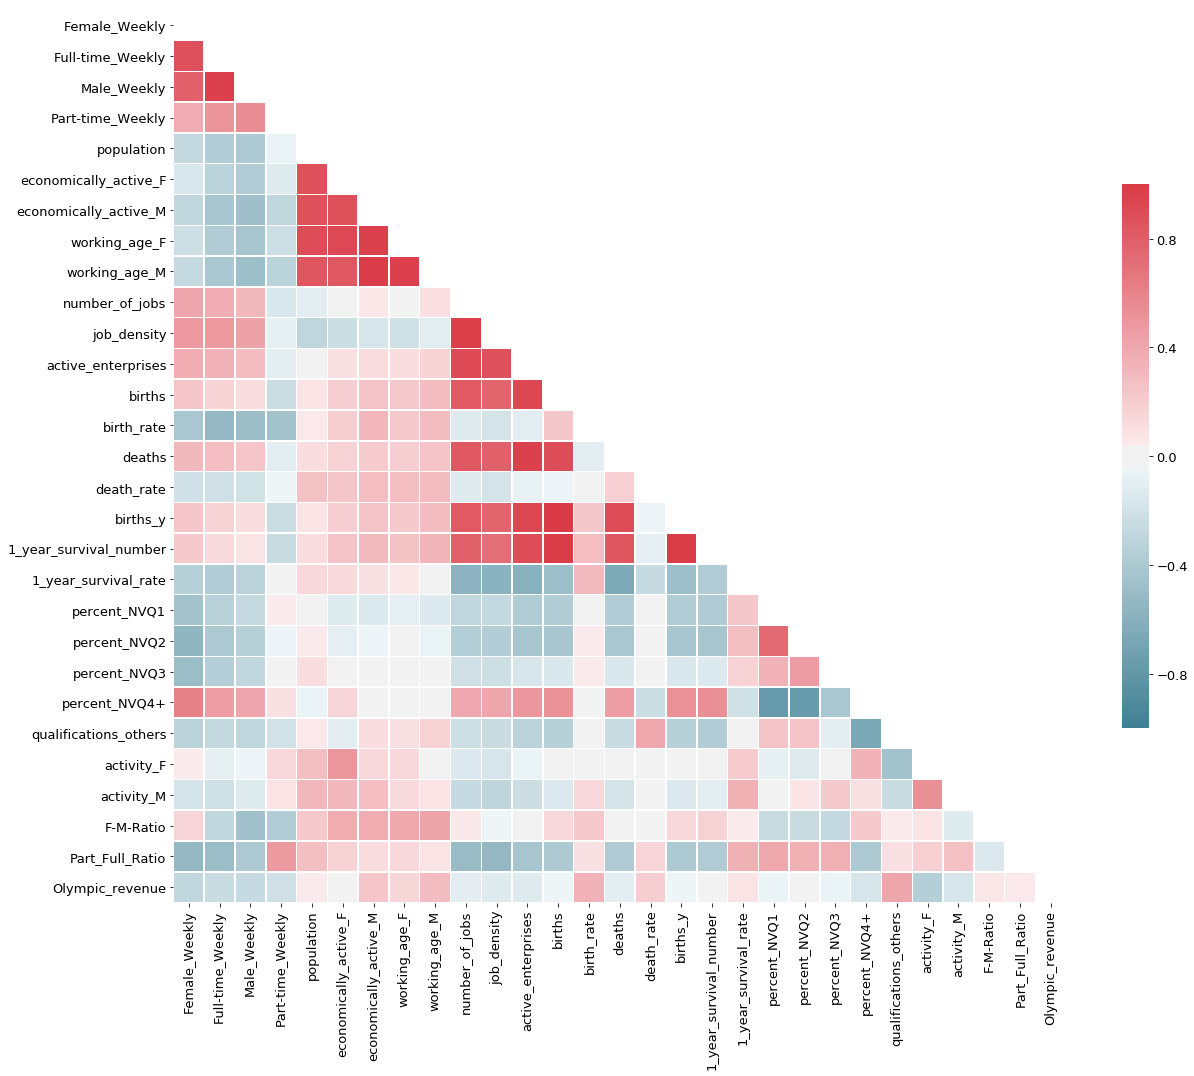

In [2894]:

mask = np.triu(np.ones_like(london_X2.iloc[:,2:-2].corr(), dtype=np.bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20,20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(london_X2.iloc[:,2:-2].corr(), mask=mask, cmap=cmap, vmax=1,vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# ax.set_xticklabels(rotation=30)
# ax.set_yticklabels(rotation=30)

fig.savefig('correlation_features_raw.png', dpi=300)
# sns.heatmap(london_X2.iloc[:,2:-2].corr(),vmin=-1,vmax=1)

In [2532]:
plt.figure(figsize=(7,7))
london_X2.iloc[:,2:-2].corr().style.background_gradient(cmap='coolwarm')

<Figure size 504x504 with 0 Axes>

In [2566]:
train_X.head()

population  number_of_jobs  job_density  active_enterprises    births  \
0    1.944004       -0.918632     0.672471           -1.278160 -1.348414   
1    2.135089       -0.887850     0.646692           -1.245608 -1.334186   
2    1.982221       -0.864763     0.633802           -1.235676 -1.191905   
3    1.944004       -0.857067     0.620912           -1.202572 -1.184791   
4    1.829353       -0.864763     0.646692           -1.150157 -0.942914   

   birth_rate    deaths  death_rate  1_year_survival_number  \
0   -0.191292 -1.158947    1.708389               -1.464625   
1   -0.367637 -1.149697    1.239459               -1.464625   
2    0.896171 -1.269940   -0.753495               -1.268392   
3    0.572871 -1.172821    0.184366               -1.264032   
4    2.042415 -1.140448   -0.050099               -0.971863   

   1_year_survival_rate  percent_NVQ1  percent_NVQ2  percent_NVQ3  \
0              0.173111      1.838981      0.939735      0.904938   
1             -0.503189      2.332257      2.118315     -1.102223   
2              0.849412      2.332257      1.870193     -0.210151   
3              0.732809      1.715662      2.304406      0.607581   
4              1.059299      2.147278      1.156842     -0.098643   

   percent_NVQ4+  qualifications_others  activity_F  activity_M  F-M-Ratio  \
0      -2.162823               1.869074   -0.904731   -0.697741  -1.230195   
1      -1.817045               1.281333   -1.255333    0.564275  -1.006751   
2      -1.783311               1.001456   -0.913126   -0.496351  -0.440608   
3      -1.867647               0.917493   -0.959355    0.083165  -0.764299   
4      -1.673674               1.197370   -0.161836   -0.019674  -1.403473   

   Part_Full_Ratio  Olympic_revenue  
0         3.158115             -0.2  
1         1.036746             -0.2  
2         1.720615             -0.2  
3        -0.042314             -0.2  
4         1.632760             -0.2

In [2821]:
train_X = london_X2.iloc[:,2:-2]
train_Y = london_X2.iloc[:,-2]

# train_X['mean_median'] = (1+train_X["mean_income"])/(1+train_X["median_income"])

# train_X.drop(["median_income"],axis=1,inplace=True)
# train_X.drop(["mean_income"],axis=1,inplace=True)

In [2839]:
regr = RandomForestRegressor(n_estimators=10,max_depth=None)
cross_val_score(regr,train_X,train_Y,cv=10)

array([-3.65620332,  0.41317384, -0.81011731,  0.39014843, -6.23157769,
        0.41987917, -2.09525378, -0.66843383, -0.79751764, -0.5032293 ])

In [2707]:
for i in res_coef2:
    print(areas[i],res_coef2[i])

Camden [1490.6034373  2223.2357565  2367.82835046]
Westminster [2094.85715567 3449.02501247 2074.30135443]
Hillingdon [-1063.66872984 -1693.07956685 -1636.89292934]
Lambeth [167.7072158  782.52306319 740.26183172]
Kensington and Chelsea [3423.48663618 4530.72766735 1723.33965118]
Tower Hamlets [1755.87796554 2008.15167695 2811.5095609 ]
Harrow [-1512.70537156  -825.06789516 -1266.72608295]
Islington [1619.83895857 1635.05511127 1918.31636278]
Barnet [141.27392772 599.23388485 -96.57962588]
Hackney [ 898.12061663 2313.92133277 2672.48082763]
Haringey [  19.81326422 1116.8772206   159.80399488]
Redbridge [-649.52087686   72.69759797  100.01366615]
Waltham Forest [-208.99329061  136.18146313  609.69560366]
Southwark [1101.20168473 2167.37431244 1533.59427528]
Richmond upon Thames [ 684.19007268 1349.07387678  -83.67273462]
Hammersmith and Fulham [1657.15281479 1872.22085581 2091.59128543]
Havering [-332.8450795   -86.55962504 -136.20692426]
Ealing [-1694.23392277 -1051.14195868  -925.7614

In [2559]:
Xtrain.head()

population  number_of_jobs  job_density  active_enterprises  births  \
7        -88000         63000.0        -0.48              7645.0  1775.0   
55      -111000         82000.0        -0.49              7160.0  1060.0   
44      -170000        168000.0        -0.74             20690.0  3120.0   
105     -128000         93000.0        -0.60             10115.0  1720.0   
157     -105000         96000.0        -0.69             10560.0  1945.0   

     birth_rate  deaths  death_rate  1_year_survival_number  \
7          23.2   915.0        12.0                  1680.0   
55         14.8   895.0        12.5                   930.0   
44         15.1  2490.0        12.0                  2840.0   
105        17.0  1085.0        10.7                  1605.0   
157        18.4  1145.0        10.8                  1840.0   

     1_year_survival_rate  percent_NVQ1  percent_NVQ2  percent_NVQ3  \
7                    94.6          10.8          16.1          13.3   
55                   87.7          13.6          14.4          13.2   
44                   91.0           7.8           8.7          16.2   
105                  93.3          21.7          16.8          16.1   
157                  94.6           8.5          10.1          12.2   

     percent_NVQ4+  qualifications_others  activity_F  activity_M  F-M-Ratio  \
7             33.2                   43.9    0.654192    0.800317   0.707597   
55            36.0                   40.2    0.650531    0.828125   0.739444   
44            49.4                   34.3    0.736254    0.854254   0.808542   
105           26.0                   36.8    0.757842    0.856574   0.649463   
157           52.9                   33.7    0.718750    0.885125   0.742676   

     Part_Full_Ratio  Olympic_revenue  
7           0.301123                0  
55          0.305116                0  
44          0.313765                0  
105         0.302065                0  
157         0.276299                0

In [2598]:
lr = LR()
lr.fit(Xtrain,Ytrain)
lr.score(Xtest,Ytest)
# cross_val_score(lr,train_X,train_Y,cv=10)

0.5132251246502892

In [2784]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(train_X,train_Y,test_size=0.2)
reg = Ridge(alpha=1).fit(Xtrain,Ytrain)
reg.score(Xtest,Ytest) #加利佛尼亚房屋价值数据集中应该不是共线性问题
# clr.score(Xtest,Ytest)

0.5310995870383639

In [2600]:
list(sorted(zip(Xtrain.columns,lr.coef_),key=lambda x:abs(x[1]),reverse=True))

[('percent_NVQ4+', 1261.8056823185966),
 ('population', 381.38067272395875),
 ('percent_NVQ1', 299.39709227122916),
 ('Part_Full_Ratio', -250.77422599442735),
 ('qualifications_others', 198.17229571833258),
 ('activity_M', -170.08627125054718),
 ('1_year_survival_number', 145.10240623026485),
 ('activity_F', -123.39297523028493),
 ('percent_NVQ2', 120.09198386616335),
 ('percent_NVQ3', 110.9139380611731),
 ('job_density', 81.38886570303578),
 ('death_rate', 68.32094196596186),
 ('Olympic_revenue', 48.11965172921742),
 ('1_year_survival_rate', 34.43937468541966),
 ('F-M-Ratio', 17.63527875607831),
 ('birth_rate', 14.193026072477966)]

In [2785]:
est = sm.OLS(train_Y,train_X)
est2 = est.fit()

In [2786]:
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   coef   R-squared (uncentered):                   0.742
Model:                            OLS   Adj. R-squared (uncentered):              0.723
Method:                 Least Squares   F-statistic:                              39.26
Date:                Sun, 19 Jul 2020   Prob (F-statistic):                    3.73e-55
Time:                        13:17:47   Log-Likelihood:                         -1878.3
No. Observations:                 234   AIC:                                      3789.
Df Residuals:                     218   BIC:                                      3844.
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
mean_income               -0.0012      0.004     -0.302      0.763      -0.009       0.007
median_income              0.1518      0.031      4.910      0.000       0.091       0.213
population                -0.0078      0.003     -2.402      0.017      -0.014      -0.001
job_density             -194.5795    166.437     -1.169      0.244    -522.611     133.452
birth_rate                68.6768     28.553      2.405      0.017      12.401     124.953
death_rate                59.9541     34.339      1.746      0.082      -7.725     127.634
1_year_survival_number     0.1091      0.125      0.874      0.383      -0.137       0.355
percent_NVQ1              26.6902     32.873      0.812      0.418     -38.100      91.480
percent_NVQ3             -15.6763     26.224     -0.598      0.551     -67.361      36.008
percent_NVQ4+             23.6892     17.881      1.325      0.187     -11.552      58.931
qualifications_others     -9.3384     13.954     -0.669      0.504     -36.840      18.163
activity_F             -3540.7367   1231.665     -2.875      0.004   -5968.233   -1113.241
activity_M             -4108.7177   1659.485     -2.476      0.014   -7379.407    -838.029
F-M-Ratio               2021.1193    763.029      2.649      0.009     517.262    3524.977
Part_Full_Ratio        -4964.2460   1852.232     -2.680      0.008   -8614.821   -1313.671
Olympic_revenue          427.8330    335.520      1.275      0.204    -233.446    1089.112
==============================================================================
Omnibus:                        3.089   Durbin-Watson:                   0.659
Prob(Omnibus):                  0.213   Jarque-Bera (JB):                2.204
Skew:                          -0.031   Prob(JB):                        0.332
Kurtosis:                       2.529   Cond. No.                     5.26e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.26e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [2671]:
train_X.shape

(234, 16)

In [2662]:
len(Xtrain),len(Xtest),Xtrain.shape

(187, 47, (187, 16))

In [2047]:
import time

In [2754]:
time1 = time.time()
rmses = []
maes = []
scores = []
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(train_X,train_Y,test_size=0.2)

In [2815]:
time1 = time.time()
rmses = []
maes = []
scores = []
for n_estimators in range(1,400,2):
    if n_estimators%40==0:
        print(n_estimators)
    Xtrain,Xtest,Ytrain,Ytest = train_test_split(train_X,train_Y,test_size=0.2)
    regr = RandomForestRegressor(n_estimators=n_estimators,max_depth=None)
    regr.fit(Xtrain,Ytrain)
    scores.append(regr.score(Xtest,Ytest))
    rmses.append(np.sqrt(np.sum((regr.predict(Xtest)-Ytest)**2))/np.sqrt(np.sum((Ytest)**2)))
    maes.append(metrics.mean_absolute_error(regr.predict(Xtest),Ytest)/np.mean(np.abs(Ytest)))
time2 = time.time()
print(time2-time1)

83.20570611953735


Text(0.5,1,'Testing error for different number of trees')

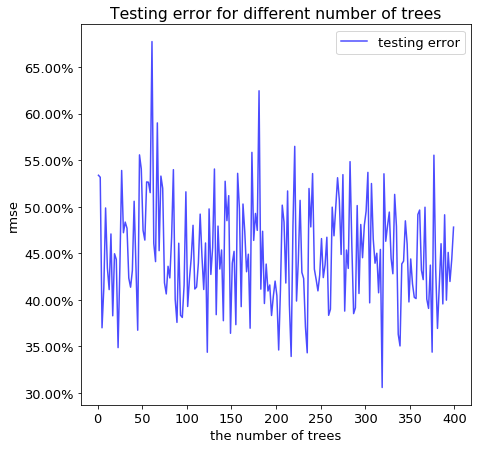

In [2819]:
fig,ax = plt.subplots(figsize=(7,7))
ax.plot(range(1,400,2),rmses,label="testing error",color='blue',alpha=0.7)
ax.set_xlabel("the number of trees")
ax.set_ylabel("rmse")
ax.legend(loc=0)

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

ax.set_title("Testing error for different number of trees")

In [2804]:
time1 = time.time()
rmses2 = []
maes2 = []
scores2 = []
mape2 = []
for n_estimators in range(1,500,2):
    if n_estimators%40==0:
        print(n_estimators)
    regr = RandomForestRegressor(n_estimators=n_estimators,max_depth=None)
    regr.fit(Xtrain,Ytrain)
    scores2.append(regr.score(Xtest,Ytest))
    rmses2.append(np.sqrt(np.sum((regr.predict(Xtest)-Ytest)**2))/np.sqrt(np.sum((Ytest)**2)))
    maes2.append(metrics.mean_absolute_error(regr.predict(Xtest),Ytest)/np.mean(np.abs(Ytest)))
    mape2.append(np.mean(np.abs(regr.predict(Xtest)-Ytest)/np.abs(Ytest)))
time2 = time.time()
print(time2-time1)

134.26196193695068


In [2881]:
# for n_estimators in range(1,400,2):
#     if n_estimators%40==0:
#         print(n_estimators)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(train_X,train_Y,test_size=0.3)
n_estimators = 60
regr = RandomForestRegressor(n_estimators=n_estimators,max_depth=3)
regr.fit(Xtrain,Ytrain)
#     print("score",regr.score(Xtest,Ytest))

# metrics.mean_squared_error(regr.predict(Xtest),Ytest)/np.sqrt(np.sum((Ytest)**2))
print("train=",regr.score(Xtrain,Ytrain),"test=",regr.score(Xtest,Ytest))
print("RMSE",np.sqrt(np.sum((regr.predict(Xtrain)-Ytrain)**2))/np.sqrt(np.sum((Ytrain)**2)),np.sqrt(np.sum((regr.predict(Xtest)-Ytest)**2))/np.sqrt(np.sum((Ytest)**2)))
print("MAPE",np.mean(np.abs(regr.predict(Xtest)-Ytest)/np.abs(Ytest)))
print("MAE",metrics.mean_absolute_error(regr.predict(Xtest),Ytest)/np.mean(np.abs(Ytest)))

# scores.append(regr.score(Xtest,Ytest))
# rmses.append(np.sqrt(np.sum((regr.predict(Xtest)-Ytest)**2))/np.sqrt(np.sum((Ytest)**2)))
# maes.append(metrics.mean_absolute_error(regr.predict(Xtest),Ytest)/np.mean(np.abs(Ytest)))
# time2 = time.time()
# print(time2-time1)

train= 0.760372240643617 test= 0.6478811794501029
RMSE 0.43734368934828033 0.5402027140854131
MAPE 1.7744764872179977
MAE 0.5347071941656426


In [2907]:
res_tt = dict()
for i in res_coef2:
    t = london_taxpayer[(london_taxpayer['year']==2008)&(london_taxpayer['area_code']==i)]['median_income'].iloc[0]
    res_tt[areas[i]] = np.array([t]+[j/t for j in res_coef2[i]])
    print(i,areas[i],[t]+[j/t for j in res_coef2[i]])

00AG Camden [36504.36228093632, 0.04083357013144107, 0.06090328984220077, 0.06486425737941091]
00BK Westminster [40333.02957260776, 0.05193899833125328, 0.08551366086358003, 0.05142934652839775]
00AS Hillingdon [29573.154252910437, -0.03596737503017167, -0.05725055746061289, -0.05535063711315527]
00AY Lambeth [30497.315323313887, 0.00549908128046927, 0.02565875241464076, 0.02427301629256985]
00AW Kensington and Chelsea [43567.59331901984, 0.07857874110962061, 0.10399306737400663, 0.03955553933315651]
00BG Tower Hamlets [30167.257798169798, 0.05820475885767215, 0.06656725945693262, 0.09319738571220963]
00AQ Harrow [29639.165757939256, -0.05103738019885727, -0.027837082254628824, -0.04273825023618177]
00AU Islington [33995.92508984124, 0.04764803294185143, 0.04809562048845163, 0.05642783238609492]
00AC Barnet [30563.326828342706, 0.004622334751458132, 0.01960630425542399, -0.0031599840693554006]
00AM Hackney [28450.95866742053, 0.03156732351719341, 0.08133017097301617, 0.0939328919937448

In [2916]:
index = (london_taxpayer_income['year']==2008) & (london_taxpayer_income['area_code'].isin(areas_boroughs))
list(zip(list(london_taxpayer_income[index].sort_values('median_income')['area']),\
         list(london_taxpayer_income[index].sort_values('median_income')['median_income'])))


[('Newham', 17050),
 ('Brent', 18950),
 ('Barking and Dagenham', 19000),
 ('Waltham Forest', 19400),
 ('Haringey', 20800),
 ('Bexley', 20950),
 ('Greenwich', 20950),
 ('Ealing', 21000),
 ('Enfield', 21000),
 ('Hounslow', 21200),
 ('Havering', 21400),
 ('Hackney', 21550),
 ('Lewisham', 21650),
 ('Redbridge', 21950),
 ('Croydon', 22000),
 ('Hillingdon', 22400),
 ('Harrow', 22450),
 ('Southwark', 22600),
 ('Sutton', 22850),
 ('Tower Hamlets', 22850),
 ('Lambeth', 23100),
 ('Barnet', 23150),
 ('Merton', 23200),
 ('Bromley', 24050),
 ('Hammersmith and Fulham', 25150),
 ('Kingston-upon-Thames', 25400),
 ('Islington', 25750),
 ('Camden', 27650),
 ('Wandsworth', 27650),
 ('Richmond-upon-Thames', 29950),
 ('Westminster', 30550),
 ('Kensington and Chelsea', 33000),
 ('City of London', 60200)]

In [2906]:
res_tt

{'Camden': array([0.04083357, 0.06090329, 0.06486426]),
 'Westminster': array([0.051939  , 0.08551366, 0.05142935]),
 'Hillingdon': array([-0.03596738, -0.05725056, -0.05535064]),
 'Lambeth': array([0.00549908, 0.02565875, 0.02427302]),
 'Kensington and Chelsea': array([0.07857874, 0.10399307, 0.03955554]),
 'Tower Hamlets': array([0.05820476, 0.06656726, 0.09319739]),
 'Harrow': array([-0.05103738, -0.02783708, -0.04273825]),
 'Islington': array([0.04764803, 0.04809562, 0.05642783]),
 'Barnet': array([ 0.00462233,  0.0196063 , -0.00315998]),
 'Hackney': array([0.03156732, 0.08133017, 0.09393289]),
 'Haringey': array([0.00072151, 0.04067171, 0.00581935]),
 'Redbridge': array([-0.02241346,  0.00250863,  0.00345124]),
 'Waltham Forest': array([-0.00815983,  0.005317  ,  0.02380464]),
 'Southwark': array([0.036907  , 0.07264   , 0.05139873]),
 'Richmond upon Thames': array([ 0.01730335,  0.03411845, -0.00211611]),
 'Hammersmith and Fulham': array([0.04990855, 0.05638576, 0.06299255]),
 'H

In [2909]:
[areas[i] for i in poor_four]

['Newham', 'Waltham Forest', 'Barking and Dagenham', 'Brent']

In [2910]:
[areas[i] for i in rich_four]

['Richmond upon Thames', 'Westminster', 'Wandsworth', 'Kensington and Chelsea']

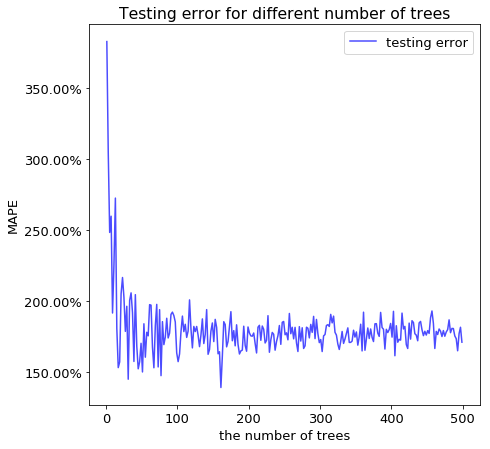

In [2814]:
fig,ax = plt.subplots(figsize=(7,7))

ax.plot(range(1,500,2),mape2,label="testing error",color='blue',alpha=0.7)
ax.set_xlabel("the number of trees")
ax.set_ylabel("MAPE")
ax.legend(loc=0)

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

ax.set_title("Testing error for different number of trees")
# fig.savefig('rf_MAPE_2.png', dpi=300)
# fig.savefig('random_forest_2.png', dpi=300)

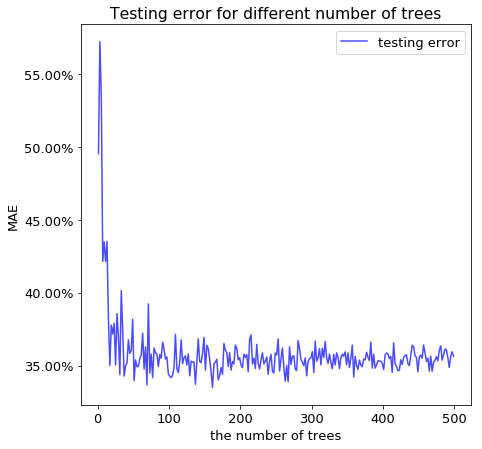

In [2809]:


fig,ax = plt.subplots(figsize=(7,7))

ax.plot(range(1,500,2),maes2,label="testing error",color='blue',alpha=0.7)
ax.set_xlabel("the number of trees")
ax.set_ylabel("MAE")
ax.legend(loc=0)

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

ax.set_title("Testing error for different number of trees")
fig.savefig('rf_MAE_2.png', dpi=300)


In [2323]:
# train_X.rename(columns = {'Female_Male_Weekly':"F-M-Ratio",'Part_Full_Weekly':"Part_Full"},inplace=True)

train_X.rename(columns = {'percent_NVQ3 only':"percent_NVQ3",'percent_NVQ2 only':"percent_NVQ2"},inplace=True)


In [2885]:
t = list(sorted(zip(train_X.columns,regr.feature_importances_),key=lambda x:x[1],reverse=True))
np.array([i[0] for i in t])

array(['job_density', 'percent_NVQ4+', 'population', 'percent_NVQ1',
       'birth_rate', 'F-M-Ratio', 'activity_F', 'Part_Full_Ratio',
       '1_year_survival_number', 'percent_NVQ3', 'death_rate',
       'activity_M', 'qualifications_others', 'Olympic_revenue'],
      dtype='<U22')

In [2883]:
train_X.columns

Index(['population', 'job_density', 'birth_rate', 'death_rate',
       '1_year_survival_number', 'percent_NVQ1', 'percent_NVQ3',
       'percent_NVQ4+', 'qualifications_others', 'activity_F', 'activity_M',
       'F-M-Ratio', 'Part_Full_Ratio', 'Olympic_revenue'],
      dtype='object')

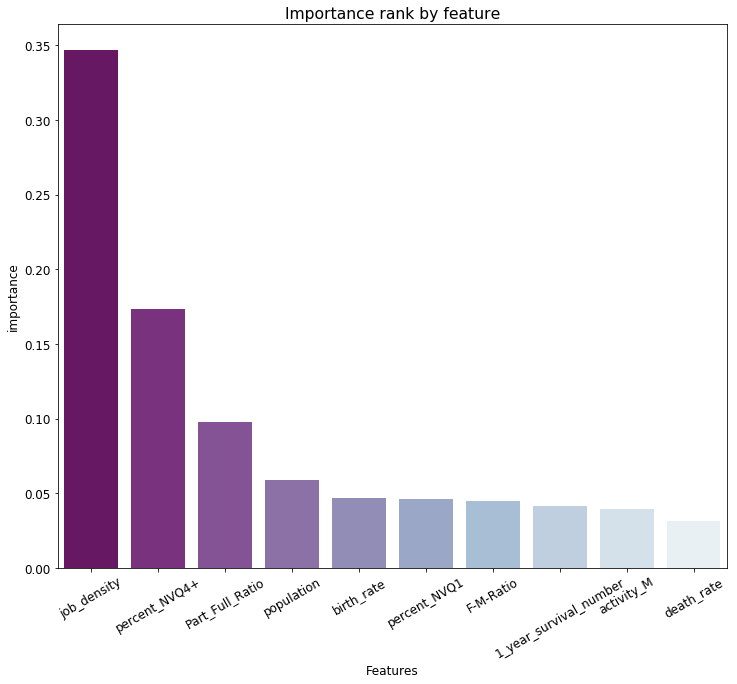

In [2779]:
fig,ax = plt.subplots(figsize=(12,10))

font = {'family' : 'sans-serif',
        'size'   : 13}
plt.rc('font', **font)

x = [i[0] for i in t]
y = [i[1] for i in t]
sns.barplot(x[:10], y[:10], palette="BuPu_r")

# g = sns.factorplot(x[:10], data=y[:10], aspect=1.5, kind="count", color="b")

ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

ax.set_xlabel("Features")
ax.set_ylabel("importance")
ax.set_title("Importance rank by feature")

fig.savefig('feature_importance.png', dpi=300)

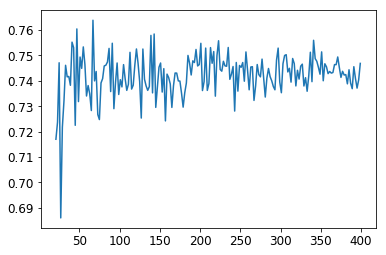

In [2060]:
plt.plot(range(1,400,2)[10:],scores[10:])

In [2505]:
control0

{'00AZ': array([1.        , 0.966233  , 0.99976089, 1.0725322 , 1.09026863,
        1.06151669, 1.04925519]),
 '00AD': array([1.        , 0.9777601 , 0.95020418, 1.01113275, 0.99373229,
        0.97274459, 0.98680957]),
 '00AX': array([1.        , 0.95478318, 0.94172369, 1.00393159, 0.99838597,
        1.06459355, 1.02880413]),
 '00BF': array([1.        , 1.01642858, 1.0146248 , 1.05282894, 1.08499342,
        1.10539158, 1.07630543]),
 '00AH': array([1.        , 1.03791107, 0.98742498, 1.01020616, 1.03784184,
        1.01537722, 1.02475372]),
 '00AF': array([1.        , 1.04687966, 0.9936053 , 1.0338997 , 1.03267844,
        1.00935878, 1.00320191])}

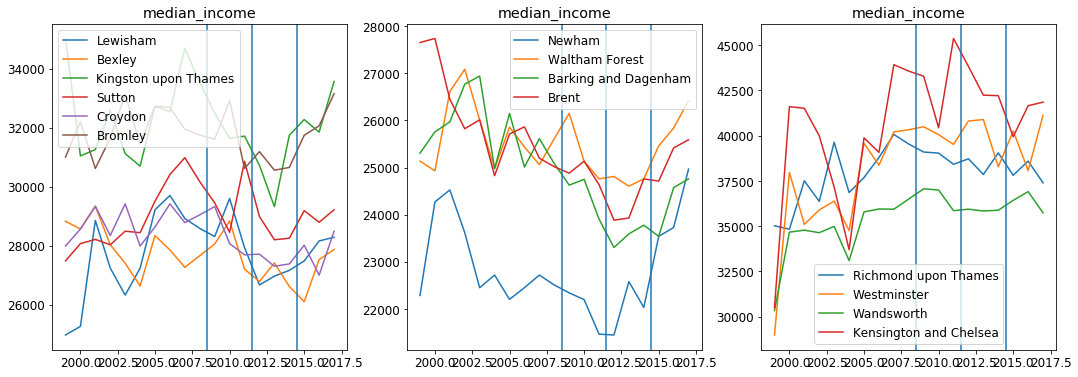

In [2506]:
col = 'median_income'
fig,(ax,ax2,ax3) = plt.subplots(1,3,figsize=(18,6))   
for area_code in control0:
    ax.plot(london_taxpayer[london_taxpayer['area_code']==area_code]['year'],london_taxpayer[london_taxpayer['area_code']==area_code][col],label=areas[area_code])



ax.legend(loc=0)
ax.set_title(col)


ax.axvline(2008.5)

ax.axvline(2011.5)

ax.axvline(2014.5)

for area_code in poor_four:
    ax2.plot(london_taxpayer[london_taxpayer['area_code']==area_code]['year'],london_taxpayer[london_taxpayer['area_code']==area_code][col],label=areas[area_code])

ax2.legend(loc=0)
ax2.set_title(col)


ax2.axvline(2008.5)

ax2.axvline(2011.5)

ax2.axvline(2014.5)

for area_code in rich_four:
    ax3.plot(london_taxpayer[london_taxpayer['area_code']==area_code]['year'],london_taxpayer[london_taxpayer['area_code']==area_code][col],label=areas[area_code])

ax3.legend(loc=0)
ax3.set_title(col)


ax3.axvline(2008.5)

ax3.axvline(2011.5)

ax3.axvline(2014.5)

# fig.savefig('medium_income.png', dpi=fig.dpi)

0.6292631391973564

In [ ]:
metrics.mean_absolute_error(regr.predict(Xtest),Ytest)/

In [1434]:
from sklearn import metrics

In [1416]:
from sklearn.model_selection import cross_val_score

In [1762]:
regr = RandomForestRegressor(n_estimators=100,max_depth=None)
cross_val_score(regr,train_X,train_Y,cv=10)

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.90727651, 0.        ])

In [1401]:
list(sorted(zip(train_X.columns,regr.feature_importances_),key=lambda x:x[1],reverse=True))

[('job_density', 0.21248994715252711),
 ('activity_M', 0.13033441078519709),
 ('working_age_F', 0.12236044449315436),
 ('activity_F', 0.07655863119954745),
 ('number_of_jobs', 0.0629118566258921),
 ('population', 0.062381595436582095),
 ('Part_Full_Weekly', 0.04924186945019833),
 ('deaths', 0.04737752585236251),
 ('Female_Male_Weekly', 0.03796152808141442),
 ('working_age_M', 0.03613965528254607),
 ('death_rate', 0.035980027569109764),
 ('1_year_survival_rate', 0.0359304609799165),
 ('birth_rate', 0.027005536557734935),
 ('active_enterprises', 0.022718177832364565),
 ('1_year_survival_number', 0.022706675807550765),
 ('births_x', 0.01790165689390195)]

In [1217]:
est = sm.OLS(train_Y, train_X)
est2 = est.fit()
est2.pvalues

Female_Hourly             0.003045
Female_Weekly             0.000035
Full-time_Hourly          0.006042
Full-time_Weekly          0.000004
Male_Hourly               0.032806
Male_Weekly               0.000543
Part-time_Hourly          0.001575
Part-time_Weekly          0.575300
population                0.243554
economically_active_F     0.920553
economically_active_M     0.657380
working_age_F             0.990960
working_age_M             0.302424
activity_F                0.704195
activity_M                0.938737
number_of_jobs            0.069366
job_density               0.251980
active_enterprises        0.634233
births_x                  0.131735
birth_rate                0.631502
deaths                    0.702710
death_rate                0.027793
births_y                  0.525675
1_year_survival_number    0.715195
1_year_survival_rate      0.593177
Olympic                   0.112159
mean_median               0.591026
dtype: float64

In [786]:
london_X['area_code'].nunique(),9

32

In [ ]:
2005-2017, 2005-2008, 2009-2017, 9 years

In [782]:
# london_X.to_csv("london_X.csv")

In [559]:
X_construct.area_code.unique()

array(['00AB', '00AC', '00AD', '00AE', '00AF', '00AG', '00AH', '00AJ',
       '00AK', '00AL', '00AM', '00AN', '00AP', '00AQ', '00AR', '00AS',
       '00AT', '00AU', '00AW', '00AX', '00AY', '00AZ', '00BA', '00BB',
       '00BC', '00BD', '00BE', '00BF', '00BG', '00BH', '00BJ', '00BK',
       '922', '923', '924', '926', '941', 'A', 'B', 'D', 'E', 'F', 'G',
       'H', 'J', 'K'], dtype=object)

In [586]:
res_coef = dict()

for area in set(areas_boroughs)-{"00AA"}:
    X_arr = []
    y_arr = []
    m,n = 1,3#3组4期
    # for area in ['00BF','00AH']:
    for area_code in ["922","923","924"]:
    
        for year in range(2005,2018):
            temp = [1]+[0]*(m+m*n+n)
            if year_bin[year]:
                temp[year_bin[year]+1] = 1
            X_arr.append(temp)
#         y_arr+=X_construct[X_construct['area_code'] == area_code]['Y_fun'].tolist()
        y_arr+=london_combine_normalized[london_combine_normalized['area_code'] == area][col].tolist()
    #     y_arr+=np.log10(X_construct[X_construct['area_code'] == area]['median_income']).tolist()[3:]


    for year in range(2005,2018):
        temp = [1]+[0]*(m+m*n+n)
        temp[1] = 1
        if year_bin[year]:
            temp[year_bin[year]+m] = 1
            temp[year_bin[year]+m+n] = 1
        X_arr.append(temp)
#     y_arr+=X_construct[X_construct['area_code'] == area]['Y_fun'].tolist()
    y_arr+=london_combine_normalized[london_combine_normalized['area_code'] == area][col].tolist()
    #     y_arr+=np.log10(X_construct[X_construct['area_code'] == area]['median_income']).tolist()[3:]

    X_arr = np.array(X_arr)
    y_arr = np.array(y_arr)

    X_arr = pd.DataFrame(X_arr)
    y_arr = pd.DataFrame(y_arr)*10
    lr = LR()
    lr.fit(X_arr,y_arr)
    
    t = lr.coef_[0,-3:]
    res_coef[area] = t
#     res_coef[area] = np.array(list(t)+[t[1]-t[0],t[2]-t[1]])
    print(area,areas[area],lr.score(X_arr,y_arr),est2.pvalues[-3:])

00AG Camden 0.42331346159850913 [2.86192313e-03 3.44844842e-05 3.15660822e-04]
00BK Westminster 0.4995963050494041 [2.86192313e-03 3.44844842e-05 3.15660822e-04]
00AD Bexley 0.3829109927532135 [2.86192313e-03 3.44844842e-05 3.15660822e-04]
00AS Hillingdon 0.35864766676556303 [2.86192313e-03 3.44844842e-05 3.15660822e-04]
00AY Lambeth 0.4993658661752276 [2.86192313e-03 3.44844842e-05 3.15660822e-04]
00AW Kensington and Chelsea 0.4051549939378558 [2.86192313e-03 3.44844842e-05 3.15660822e-04]
00BG Tower Hamlets 0.5964727076373517 [2.86192313e-03 3.44844842e-05 3.15660822e-04]
00AQ Harrow 0.42434477757540057 [2.86192313e-03 3.44844842e-05 3.15660822e-04]
00AZ Lewisham 0.4084401906633881 [2.86192313e-03 3.44844842e-05 3.15660822e-04]
00AU Islington 0.5374017521377104 [2.86192313e-03 3.44844842e-05 3.15660822e-04]
00AC Barnet 0.4934898092272084 [2.86192313e-03 3.44844842e-05 3.15660822e-04]
00AM Hackney 0.5003373715789827 [2.86192313e-03 3.44844842e-05 3.15660822e-04]
00AP Haringey 0.497325

In [580]:
X_arr.shape,y_arr.shape

((52, 8), (52, 1))

In [587]:
res_coef

{'00AG': array([-0.13188451, -0.10398598, -0.20959136]),
 '00BK': array([0.083376  , 0.20254529, 0.04962264]),
 '00AD': array([-0.32782409, -0.40088603, -0.27244626]),
 '00AS': array([-0.27660878, -0.4869781 , -0.10974761]),
 '00AY': array([ 0.0071757 , -0.0908268 ,  0.29321428]),
 '00AW': array([-0.34679146, -0.23138154, -0.32694068]),
 '00BG': array([0.11595918, 0.34908993, 0.33926594]),
 '00AQ': array([-0.41417268, -0.27691699, -0.16431444]),
 '00AZ': array([-0.15154731, -0.21931223, -0.03494623]),
 '00AU': array([-0.12618054,  0.05119855,  0.17329826]),
 '00AC': array([-0.43730685,  0.04602061,  0.03752674]),
 '00AM': array([-0.1323019 , -0.04136787,  0.09074394]),
 '00AP': array([ 0.11815691, -0.08390933,  0.09761514]),
 '00BC': array([-0.09219619, -0.14048776,  0.04639678]),
 '00AF': array([-0.31928893, -0.22909549, -0.09961432]),
 '00BH': array([0.07889883, 0.09870396, 0.37685865]),
 '00BE': array([-0.28432102, -0.30690084, -0.14951033]),
 '00BD': array([-0.10298873, -0.17613395

0 ['Westminster', 'Lambeth', 'Tower Hamlets', 'Islington', 'Haringey', 'Waltham Forest', 'Hammersmith and Fulham', 'Hounslow']
1 ['Camden', 'Kensington and Chelsea', 'Harrow', 'Lewisham', 'Bromley', 'Southwark', 'Richmond upon Thames', 'Merton', 'Barking and Dagenham', 'Sutton', 'Newham']
2 ['Bexley', 'Hillingdon', 'Havering', 'Kingston upon Thames']
3 ['Barnet', 'Hackney', 'Redbridge', 'Ealing', 'Croydon', 'Enfield', 'Wandsworth', 'Greenwich', 'Brent']


In [508]:
[areas[i] for i in poor_four]

['Newham', 'Waltham Forest', 'Barking and Dagenham', 'Brent']

In [505]:
for i in zeros:
    print(i,res_coef[areas_boroughs_reverse[i]])

Camden [ 0.04284461  0.03345418  0.05637208 -0.00939042  0.0229179 ]
Tower Hamlets [ 0.0503382   0.03157303  0.06974314 -0.01876517  0.03817011]
Islington [ 0.04472876  0.02248389  0.04293888 -0.02224487  0.02045499]
Hackney [0.03206004 0.05013958 0.08091468 0.01807954 0.0307751 ]
Southwark [ 0.03826171  0.03667097  0.04032304 -0.00159074  0.00365207]
Hammersmith and Fulham [ 0.0526308   0.02677641  0.0500292  -0.02585439  0.02325279]
Wandsworth [ 0.03882567  0.02669545  0.02391484 -0.01213022 -0.00278061]


In [473]:
list(zip([areas[i] for i in res_keys],kmeans.labels_))

[('Camden', 0),
 ('Westminster', 0),
 ('Bexley', 1),
 ('Hillingdon', 2),
 ('Lambeth', 1),
 ('Kensington and Chelsea', 0),
 ('Tower Hamlets', 0),
 ('Harrow', 2),
 ('Lewisham', 1),
 ('Islington', 0),
 ('Barnet', 1),
 ('Hackney', 0),
 ('Haringey', 1),
 ('Redbridge', 1),
 ('Bromley', 1),
 ('Waltham Forest', 1),
 ('Southwark', 0),
 ('Richmond upon Thames', 1),
 ('Hammersmith and Fulham', 0),
 ('Havering', 1),
 ('Ealing', 2),
 ('Croydon', 1),
 ('Enfield', 1),
 ('Wandsworth', 0),
 ('Greenwich', 1),
 ('Brent', 1),
 ('Merton', 1),
 ('Barking and Dagenham', 2),
 ('Kingston upon Thames', 1),
 ('Sutton', 1),
 ('Hounslow', 2),
 ('Newham', 1)]

In [470]:
from sklearn.cluster import KMeans

In [448]:
X_arr.shape,y_arr.shape

((64, 8), (304, 1))

In [434]:
clr = Ridge()
clr.fit(X_arr,y_arr)

Ridge()

In [435]:
lr.coef_.shape

(8,)

In [438]:
lr.score(X_arr,y_arr),lr.coef_

(0.8407770901963281,
 array([ 0.        , -0.05952378,  0.00064553, -0.0089657 ,  0.00744815,
        -0.05158559, -0.07445994, -0.06350094]))

In [437]:
clr.coef_

array([ 0.        , -0.06779519, -0.00378317, -0.01409621,  0.00155535,
       -0.03027775, -0.04690715, -0.03811619])

In [439]:
est = sm.OLS(y_arr, X_arr)
est2 = est.fit()

In [443]:
est2.pvalues

array([1.39104240e-84, 1.76090326e-08, 9.38049490e-01, 2.82864831e-01,
       3.71555266e-01, 2.86192313e-03, 3.44844842e-05, 3.15660822e-04])

In [440]:
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     42.24
Date:                Fri, 17 Jul 2020   Prob (F-statistic):           4.33e-20
Time:                        22:09:38   Log-Likelihood:                 161.46
No. Observations:                  64   AIC:                            -306.9
Df Residuals:                      56   BIC:                            -289.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0230      0.005    225.895      0.0

In [467]:
london_tickets_for_sale.head()

date         time gender                      session medal_ceremony  \
0  03-Aug  10:00–13:45      M        400m Hurdles: round 1            NaN   
1  03-Aug  10:00–13:45      M  3000m Steeplechase: round 1            NaN   
2  03-Aug  10:00–13:45      M           Hammer: qualifying            NaN   
3  03-Aug  10:00–13:45      M         Shot Put: qualifying            NaN   
4  03-Aug  10:00–13:45      W   100m: classification heats            NaN   

    code AA    A   B   C   D   E  limit                           venue  \
0  AT001  –  150  95  65  40  20   20.0  Olympic Park - Olympic Stadium   
1  AT001  –  150  95  65  40  20   20.0  Olympic Park - Olympic Stadium   
2  AT001  –  150  95  65  40  20   20.0  Olympic Park - Olympic Stadium   
3  AT001  –  150  95  65  40  20   20.0  Olympic Park - Olympic Stadium   
4  AT001  –  150  95  65  40  20   20.0  Olympic Park - Olympic Stadium   

       event  
0  Athletics  
1  Athletics  
2  Athletics  
3  Athletics  
4  Athletics

In [468]:
london_ticket_sales.head()

session  price  number_sold  total_public_sold  percent_sold_to_public  \
0   AT001    150        16704              46425               73.155166   
1   AT001     95         7193              46425               73.155166   
2   AT001     65         6721              46425               73.155166   
3   AT001     40         4434              46425               73.155166   
4   AT001     20         5336              46425               73.155166   

          venue    area       revenue  
0  Olympic Park  Newham  34250.486072  
1  Olympic Park  Newham   9340.898747  
2  Olympic Park  Newham   5971.758700  
3  Olympic Park  Newham   2424.435748  
4  Olympic Park  Newham   1458.816999

In [419]:
lr.score(X_arr,y_arr),clr.score(X_arr,y_arr)

(0.686931104413939, 0.6535324294770202)

In [296]:
lr.coef_

array([[ 0.        , -0.00920746,  0.00769432, -0.01865526, -0.00228437,
         0.00095486,  0.03264494, -0.01723683,  0.00095486,  0.        ,
         0.        ,  0.        ]])

In [224]:
clr.coef_

array([[ 0.        , -0.05627173,  0.05844507, -0.00128018,  0.00301875,
         0.02300813, -0.00820379, -0.02732672, -0.02458376,  0.07866912,
         0.07313581,  0.04759189]])

In [200]:
clr = Ridge()
clr.fit(X_arr,y_arr)

In [62]:
import statsmodels.api as sm
from scipy import stats

from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import Ridge

In [449]:
[areas[i] for i in poor_four],[areas[i] for i in rich_four]

(['Newham', 'Waltham Forest', 'Barking and Dagenham', 'Brent'],
 ['Richmond upon Thames',
  'Westminster',
  'Wandsworth',
  'Kensington and Chelsea'])

In [152]:
X_arr.shape,y_arr.shape

((192, 12), (192,))

In [147]:
london_taxpayer[london_taxpayer['area'] == area]['median_income'].tolist()[3:]

[]

In [153]:
[areas[i] for i in control_four]

['Redbridge', 'Sutton', 'Harrow', 'Croydon']

In [155]:
from PIL import Image

img = Image.open("/Users/myzone/Downloads/london-boroughs-map.jpg")   # 读取图片
img = img.convert("L")   # 转化为黑白图片
img.save("/Users/myzone/Downloads/london-boroughs-map444.jpg")

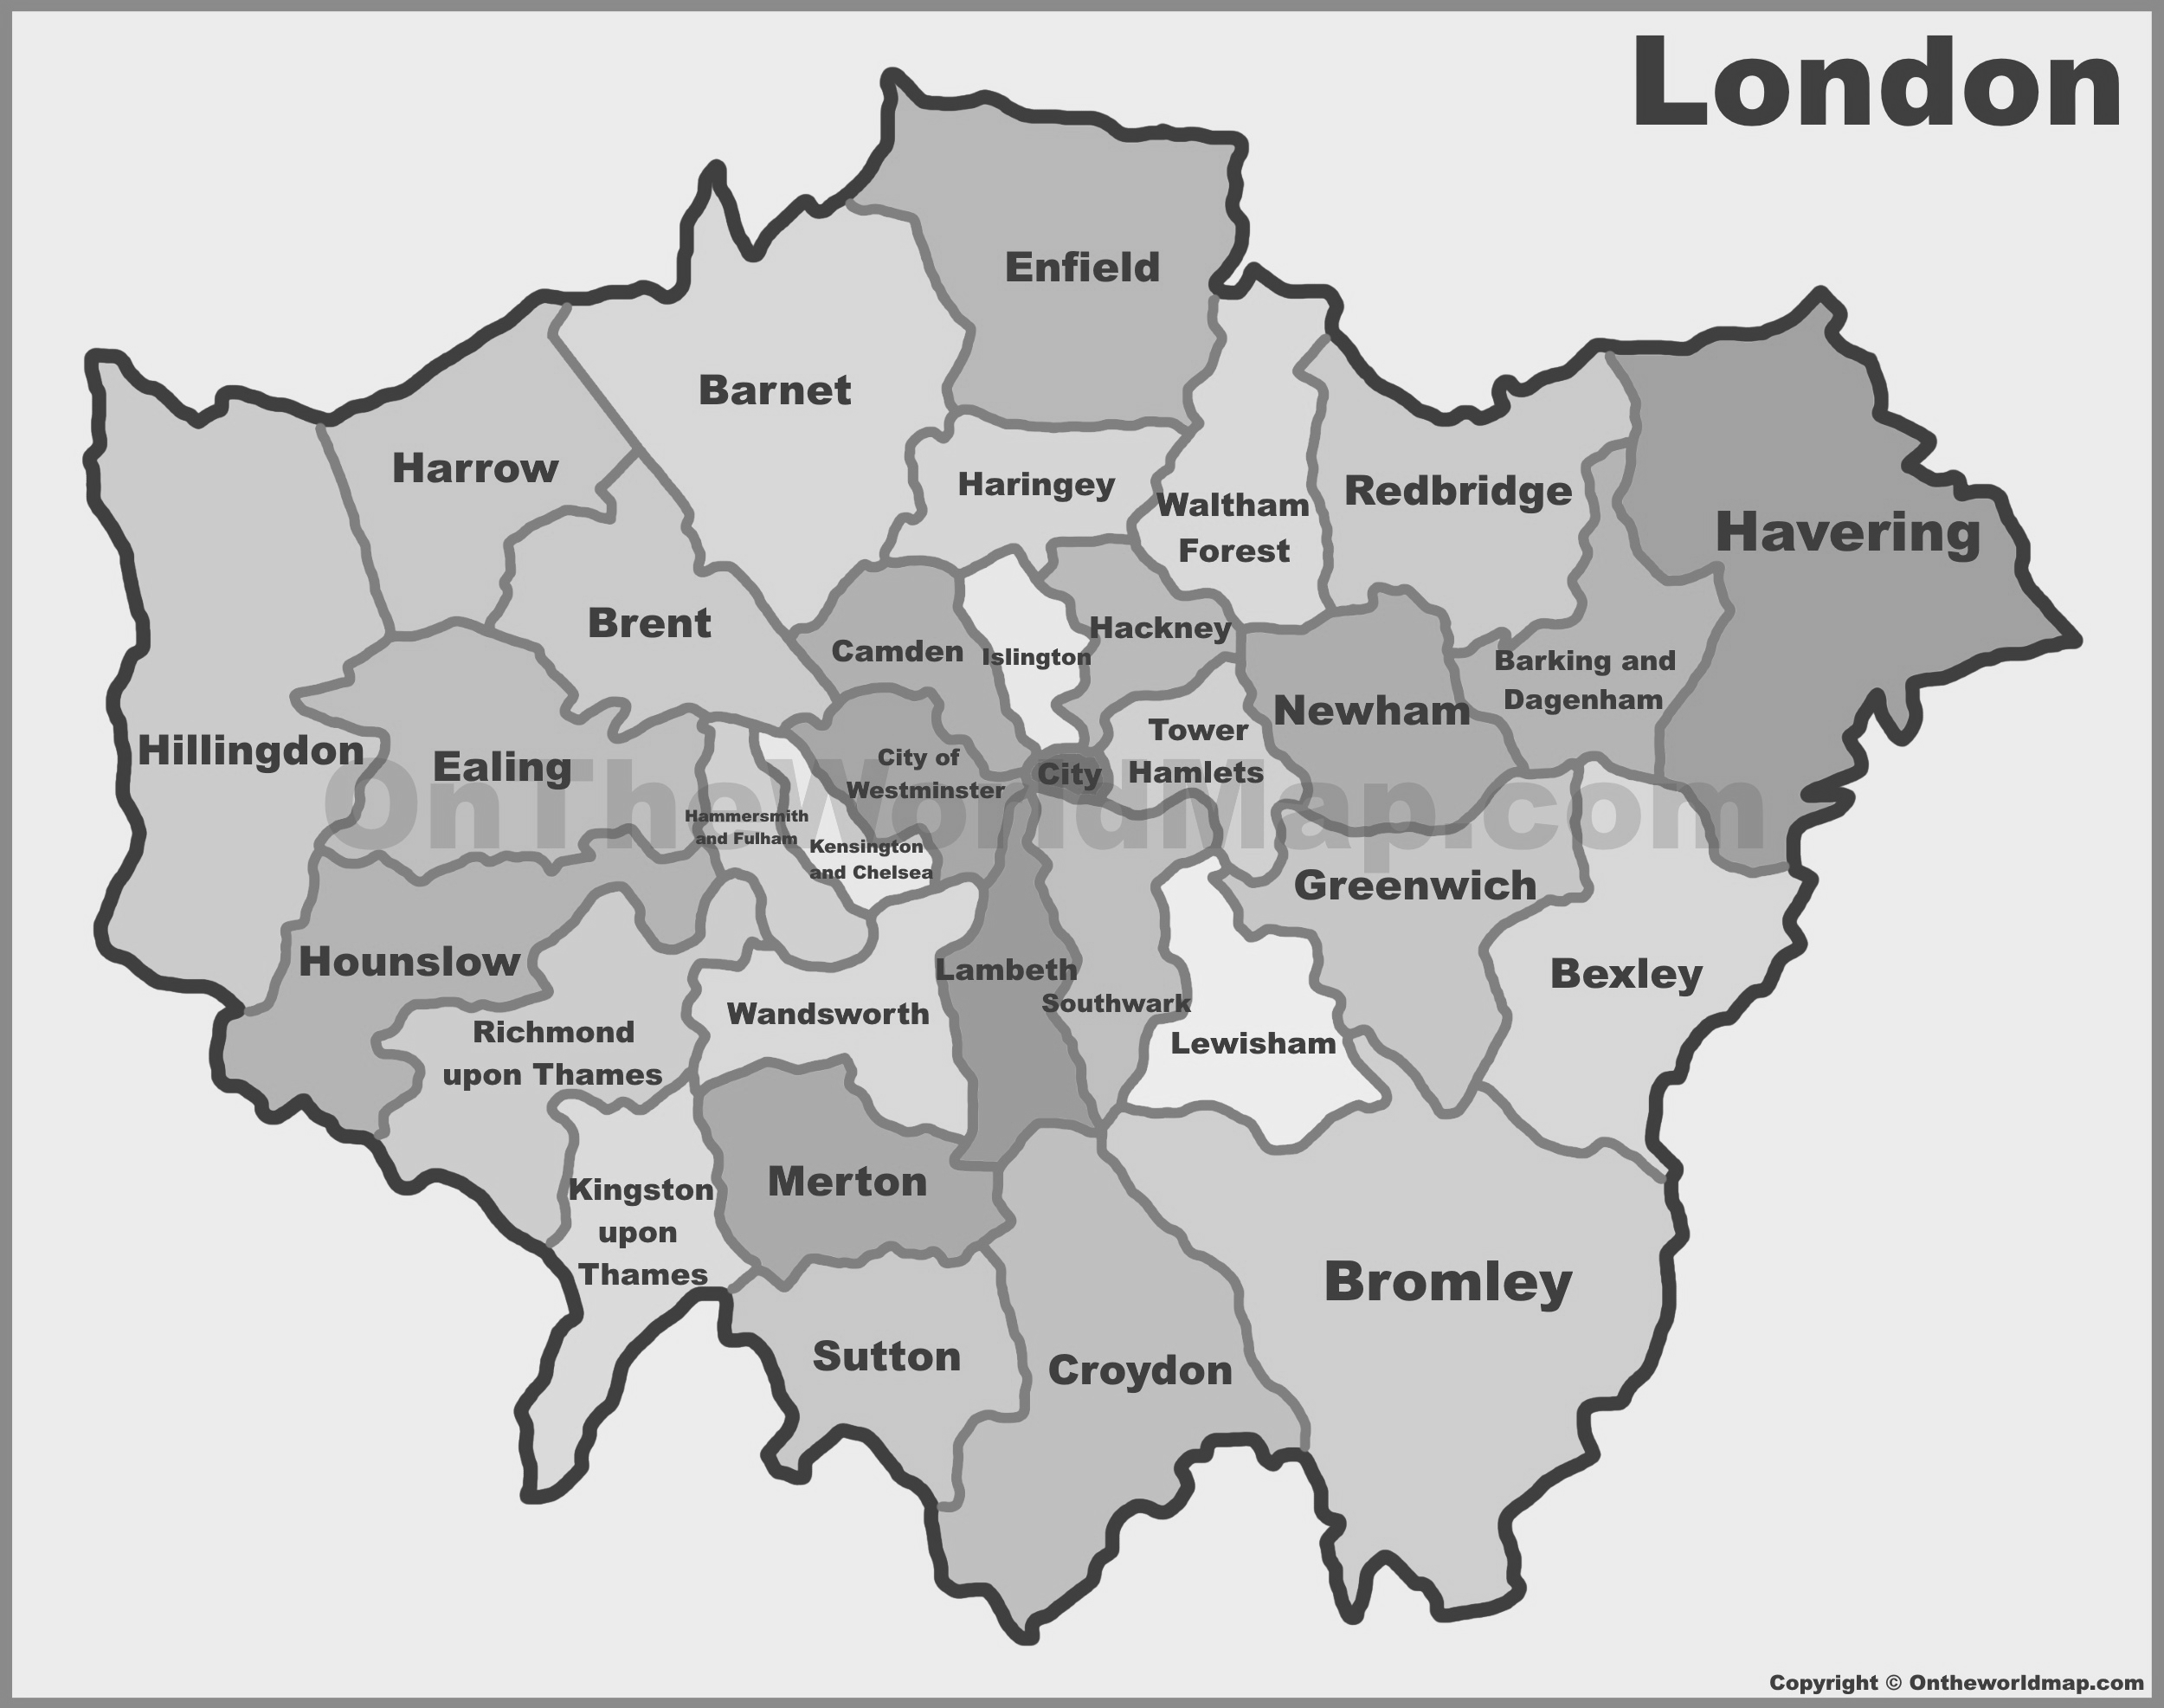

In [447]:
img

In [450]:
df_income

year low1st low2nd low3rd low4th low5th low6th high1st high2nd high3rd  \
0   1999   00BB   00BG   00AM   00BE   00AR   00AZ    00AA    00BD    00AX   
1   2000   00BB   00BH   00AZ   00AY   00BE   00AB    00AA    00AW    00BK   
2   2001   00BB   00AB   00AE   00AT   00BH   00BE    00AA    00AW    00BD   
3   2002   00BB   00AE   00AB   00AL   00AP   00BH    00AA    00AW    00BD   
4   2003   00BB   00AE   00BH   00AZ   00AM   00AB    00AA    00BD    00AW   
5   2004   00BB   00AE   00AB   00BH   00AK   00AL    00AA    00BD    00AG   
6   2005   00BB   00AE   00BH   00AB   00AL   00AP    00AA    00AW    00BK   
7   2006   00BB   00AB   00BH   00AE   00AM   00AP    00AA    00AW    00BD   
8   2007   00BB   00BH   00AE   00AB   00AD   00AP    00AA    00AW    00BK   
9   2008   00BB   00AE   00AB   00BH   00AP   00AD    00AA    00AW    00BK   
10  2009   00BB   00AB   00AE   00BH   00AL   00AJ    00AA    00AW    00BK   
11  2010   00BB   00AB   00AE   00BH   00AJ   00AK    00AA    00AW    00BK   
12  2011   00BB   00AB   00AE   00BH   00AJ   00AL    00AA    00AW    00BK   
13  2012   00BB   00AB   00AE   00BH   00AT   00AL    00AA    00AW    00BK   
14  2013   00BB   00AB   00AE   00BH   00AJ   00AL    00AA    00AW    00BK   
15  2014   00BB   00AB   00AE   00BH   00AD   00AJ    00AA    00AW    00BD   
16  2015   00AB   00BB   00AE   00BH   00AD   00AJ    00AA    00BK    00AW   
17  2016   00BB   00AB   00AE   00BH   00AP   00AK    00AA    00AW    00BD   
18  2017   00AB   00BB   00AE   00BH   00AK   00AT    00AA    00AW    00BK   

   high4th high5th high6th  
0     00AG    00AN    00AU  
1     00BD    00BJ    00AG  
2     00BK    00BJ    00AN  
3     00BK    00BJ    00AG  
4     00BK    00BJ    00AU  
5     00BK    00AW    00BJ  
6     00BD    00BJ    00AG  
7     00BK    00AG    00BJ  
8     00BD    00AG    00BJ  
9     00BD    00AG    00BJ  
10    00BD    00BJ    00AG  
11    00BD    00AG    00BJ  
12    00BD    00AG    00BJ  
13    00BD    00AG    00BJ  
14    00BD    00AG    00BJ  
15    00BK    00AG    00BJ  
16    00BD    00AG    00BJ  
17    00BK    00AG    00BJ  
18    00AG    00BD    00BJ

In [452]:
areas_boroughs_reverse['Bromley']

'00AF'

In [175]:
set(areas_boroughs)-set(london_underground['area_code'].unique())

{'00AD', '00AF', '00AH', '00AX', '00AZ', '00BF'}

In [ ]:
counts.most_common(10)

In [176]:
[areas_boroughs[i] for i in set(areas_boroughs)-set(london_underground['area_code'].unique())]

['Bexley', 'Sutton', 'Lewisham', 'Kingston upon Thames', 'Bromley', 'Croydon']

In [177]:
[areas_boroughs[i] for i in control_four]

['Redbridge', 'Sutton', 'Harrow', 'Croydon']

In [178]:
[areas_boroughs[i] for i in rich_four]

['Richmond upon Thames', 'Westminster', 'Wandsworth', 'Kensington and Chelsea']

0.783146860700268

array([[     0.        , -29016.65052485, -12720.61767627,
          -846.64591834,   -510.74848569,  -5431.94922346,
           846.63578403,    510.72222964,   5431.94535902,
        -15449.1911312 , -15785.08916071, -10863.89458248]])

In [214]:
clr.coef_

array([[     0.        , -26504.15714517, -12664.68456094,
          -973.93463835,   -922.32466265,  -5643.54875051,
          -768.47884126,   -808.02718189,   3565.58547573,
        -13948.73279447, -13833.20471223,  -9209.13422624]])

In [169]:
brazil_gdp = pd.read_csv("datasets/Rio/brazil_gdp.csv")
brazil_monthly_income = pd.read_csv("datasets/Rio/brazil_monthly_income.csv")
brazil_unemployment = pd.read_csv("datasets/Rio/brazil_unemployment.csv")
brazil_tourism_jobs = pd.read_csv("datasets/Rio/brazil_tourism_jobs.csv")
brazil_international_arrivals = pd.read_csv("datasets/Rio/brazil_international_arrivals.csv")

In [162]:
vancouver_turism_indicators = pd.read_csv("datasets/Vancouver/vancouver_turism_indicators.csv")
vancouver_employment_by_industry = pd.read_csv("datasets/Vancouver/vancouver_employment_by_industry.csv")
vancouver_employment_by_industry_legend = pd.read_csv("datasets/Vancouver/vancouver_employment_by_industry_legend.csv")
vancouver_small_business_by_region = pd.read_csv("datasets/Vancouver/vancouver_small_business_by_region.csv")
vancouver_business_size = pd.read_csv("datasets/Vancouver/vancouver_business_size.csv")

In [166]:
vancouver_visits = pd.read_csv("datasets/Vancouver/vancouver_visits.csv")
vancouver_room_revenues_2000_2010 = pd.read_csv("datasets/Vancouver/vancouver_room_revenues_2000_2010.csv")
vancouver_room_revenues_2010_2019 = pd.read_csv("datasets/Vancouver/vancouver_room_revenues_2010_2019.csv")
region_codes = pd.read_csv("datasets/Vancouver/region_codes.csv")

In [233]:
vancouver_room_revenues_2000_2010.head()

year  month region_code acc_type     revenue properties   rooms
0  2000      1        DR01      TOT   7582000.0        345  14,092
1  2000      2        DR01      TOT  10090000.0        374  14,335
2  2000      3        DR01      TOT  13198000.0        401  14,819
3  2000      4        DR01      TOT  15808000.0        423  15,104
4  2000      5        DR01      TOT  21442000.0        468  15,606

In [250]:
vancouver_room_revenues_2000_2010['acc_type'].value_counts()

TOT    11718
H2      4410
FL      4410
H3      4410
VR      4410
H4      4410
HO      4410
MI      4410
H1      4410
MO      4410
Name: acc_type, dtype: int64

In [246]:
vancouver_room_revenues_2010_2019.head()

year  month region_code     region_name  revenue
0  2010.0    1.0        UC39  Campbell River      NaN
1  2010.0    2.0        UC39  Campbell River      NaN
2  2010.0    3.0        UC39  Campbell River      NaN
3  2010.0    4.0        UC39  Campbell River      NaN
4  2010.0    5.0        UC39  Campbell River      NaN

In [225]:
vancouver_business_size['business_type'].value_counts()

Public Administration                            749
Finance & Insurance                              749
Real Estate & Rental & Leasing                   749
Manufacturing                                    749
Health Care & Social Assistance                  749
Retail Trade                                     749
Arts, Entertainment & Recreation                 749
Wholesale Trade                                  749
Utilities                                        749
Educational Services                             749
Construction                                     749
Other Services (excl. Public Administration)     605
Accommodation & Food Services                    605
Agriculture, Forestry, Fishing & Hunting         605
Admin. & Support, Waste Mgmt. & Remedtn.         605
Management of Companies & Enterprises            605
Professional, Scientific & Technical Services    605
Transportation & Warehousing (48-49)             605
Information & Cultural Industries             

In [230]:
vancouver_business_size['region_code'].value_counts()

RD09    426
RD21    426
RD35    426
RD53    426
RD47    426
RD43    426
RD05    426
RD19    426
DR08    426
RD29    426
DR04    426
RD59    426
RD07    426
RD01    426
RD39    426
DR07    426
RD03    426
DR03    426
DR01    426
RD15    426
DR02    426
RD17    426
RD27    426
RD57    426
RD33    426
RD55    426
RD41    426
RD31    426
RD45    426
RD37    426
RD51    426
DR05    426
RD49    426
RD23    426
DR06    426
RD25    280
Name: region_code, dtype: int64

In [220]:
vancouver_business_size['region_code'].nunique()

36